Download and unzip the zipped folder. Open this folder in VSCode (File - Machine_learning_based_seismic_classification_for_facies_prediction - press Select Folder)

Installing the following packages (remove #). Use Python stable version 3.9.7

In [1]:
#!pip install pylops
#!pip install segysak
# pip install hyperopt
# pip install imblearn
# pip install joblib

In [2]:
import segyio
from segysak.segy import segy_header_scan
from IPython.display import display

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from pylab import figure, cm
from matplotlib import colors
import plotly as px
import plotly.graph_objects as go
import plotly.express as px

In [4]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from itertools import product
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [5]:

from sklearn.linear_model import LogisticRegression

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import scipy as sp
import segyio
import pylops
import re
from IPython.display import display
from mpl_toolkits.axes_grid1 import make_axes_locatable


## I. Import custom functions

Append the folder with functions 

In [9]:
import sys
sys.path.append('../Machine_learning_based_seismic_classification_for_facies_prediction/functions')

Import necessary py.files with functions

In [10]:
from segy_file_read_plot import segy_file
from plot_2D_sections import plot_2D_section, difference_map
from data_processing import replace_nonexisting_data_with_NaN, take_data_that_exist, df_wells_from_section, standartization
from machine_learning import predict_2d_RelAI_Seis_SeisInv, accuracy_score_cv, confusion_matrix_prediction, feature_importance_plot

## I. Read segy files

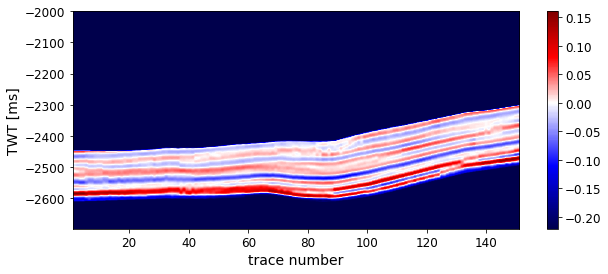

[1, 151, -2699.0, -2000.0]

In [12]:
seismic, extent_seismic = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_1_files/Synth_seismic_1.segy', color_map='seismic')
extent_seismic

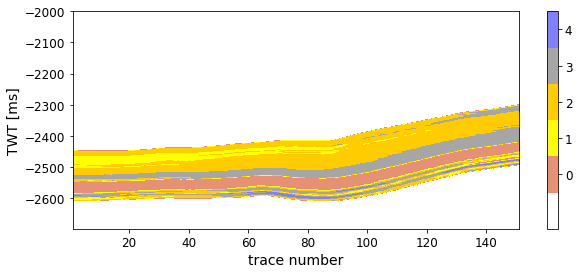

[1, 151, -2699.0, -2000.0]

In [13]:
facies, extent_facies = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_1_files/Facies.segy', color_map='facies')
extent_facies

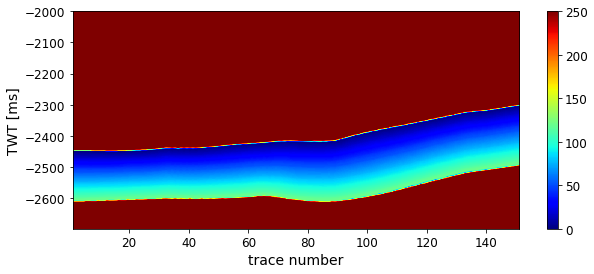

[1, 151, -2699.0, -2000.0]

In [14]:
depths, extent_depths = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_1_files/Depths.segy', color_map='depths')
extent_depths

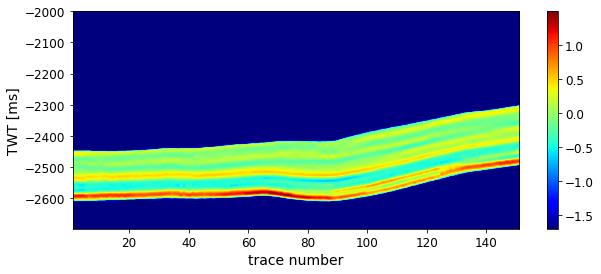

[1, 151, -2699.0, -2000.0]

In [16]:
rel_ai, extent_rel_ai = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_1_files/Rel_AcImp.segy', color_map='relai')
extent_rel_ai

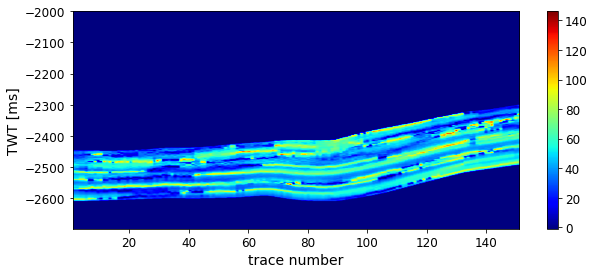

In [18]:
Inst_freq, extent_inst_freq = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_1_files/InstFs_Ormsby_10_60.segy', color_map='any')

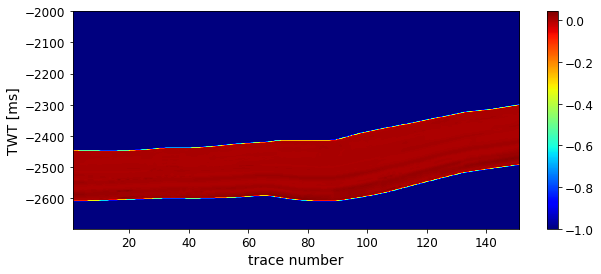

In [19]:
Envelope, extent_sweet = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_1_files/Envelope_Ormsby_10_60.segy', color_map='any')

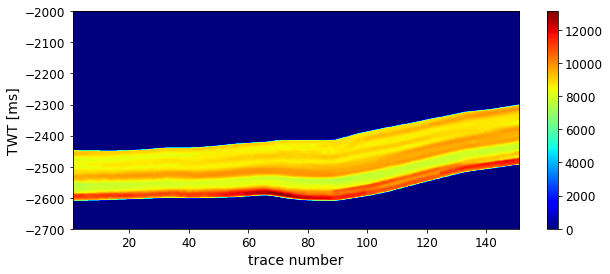

In [20]:
Seis_inv, extent_seis_inv = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_1_files/Seis_Inv.segy', color_map='any')

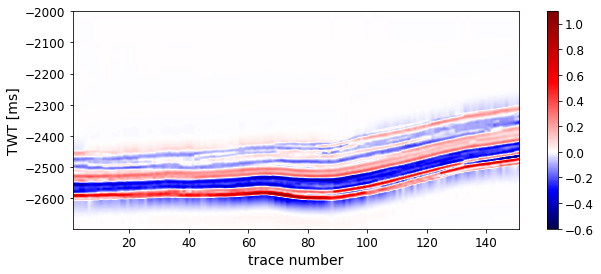

In [21]:
Seis_ormsby_6_10_60_80_RelAI, extent_r_10_60 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_1_files/Seismic_Ormsby_10_60_RelAI.segy', color_map='seismic')

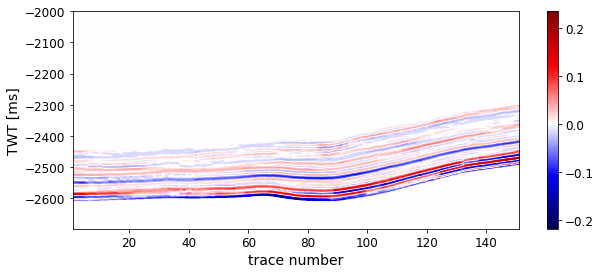

In [22]:
Seis_ormsby_6_10_60_80, extent_s_10_60 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_1_files/Seismic_Ormsby_10_60.segy', color_map='seismic')

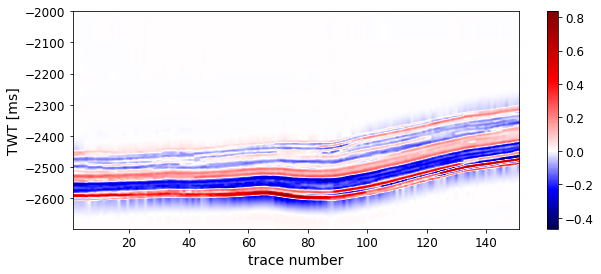

In [23]:
Seis_ormsby_6_10_80_100_RelAI, extent_r_10_80 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_1_files/Seismic_Ormsby_10_80_RelAI.segy', color_map='seismic')

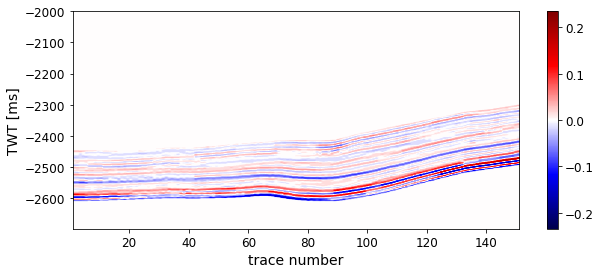

In [24]:
Seis_ormsby_6_10_80_100, extent_s_10_80 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_1_files/Seismic_Ormsby_10_80.segy', color_map='seismic')

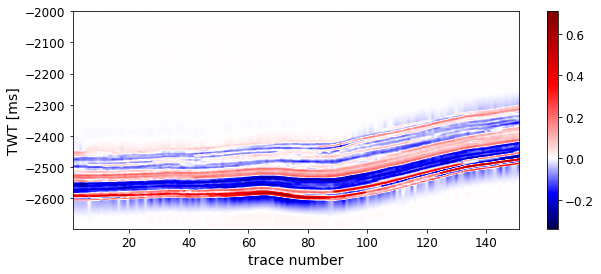

In [25]:
Seis_ormsby_6_10_100_120_RelAI, extent_r_10_100 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_1_files/Seismic_Ormsby_10_100_RelAI.segy', color_map='seismic')

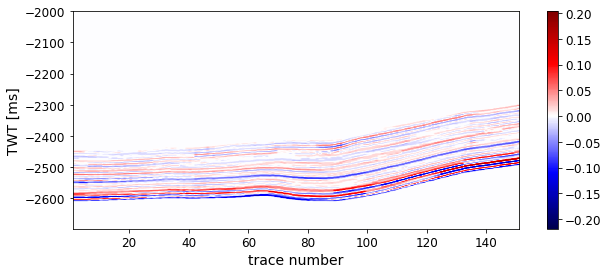

In [26]:
Seis_ormsby_6_10_100_120, extent_s_10_100 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_1_files/Seismic_Ormsby_10_100.segy', color_map='seismic')

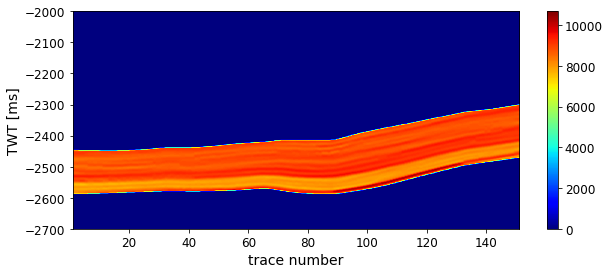

In [27]:
seis_inv_10_60, extent_si_10_60 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_1_files/Inversion_Ormsby_10-60.segy', color_map='any')

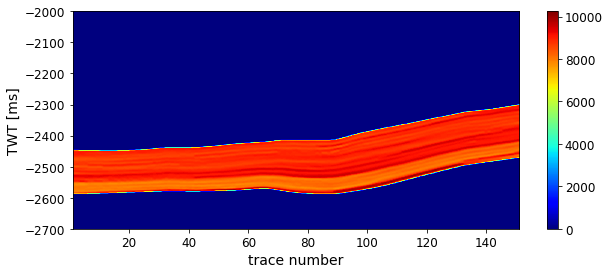

In [28]:
seis_inv_10_80, extent_si_10_80 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_1_files/Inversion_Ormsby_10-80.segy', color_map='any')

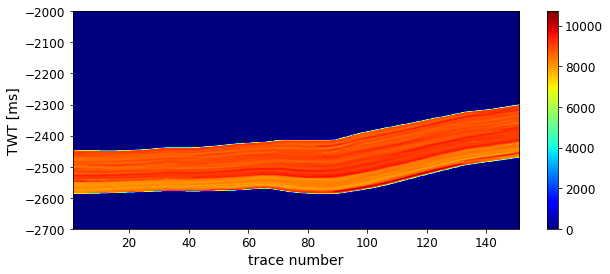

In [29]:
seis_inv_10_100, extent_si_10_100 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_1_files/Inversion_Ormsby_10-100.segy', color_map='any')

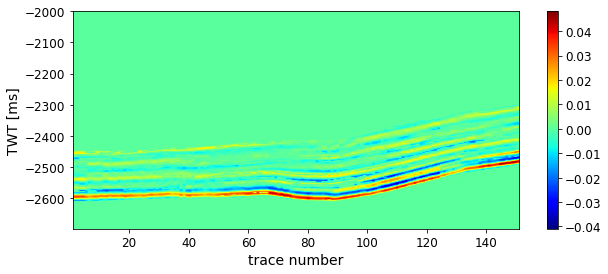

In [30]:
spec_dec_30, extent_sd_30 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_1_files/Spectral_Decomposition_Filter_30Hz.segy', color_map='any')

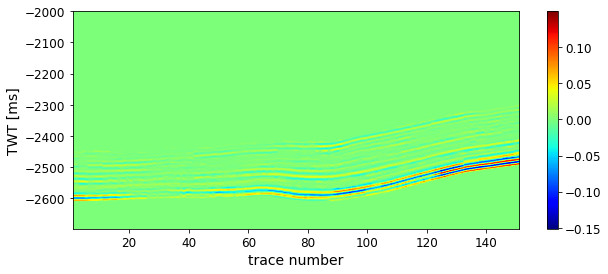

In [31]:
spec_dec_60, extent_sd_60 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_1_files/Spectral_Decomposition_Filter_60Hz.segy', color_map='any')

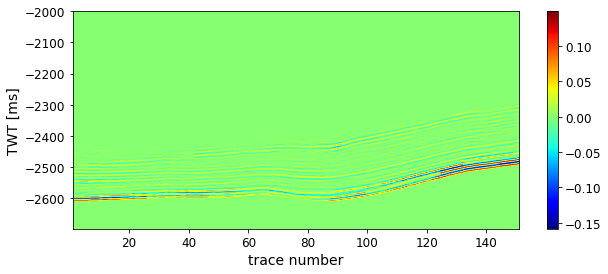

In [32]:
spec_dec_90, extent_sd_90 = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_1_files/Spectral_Decomposition_Filter_90Hz.segy', color_map='any')

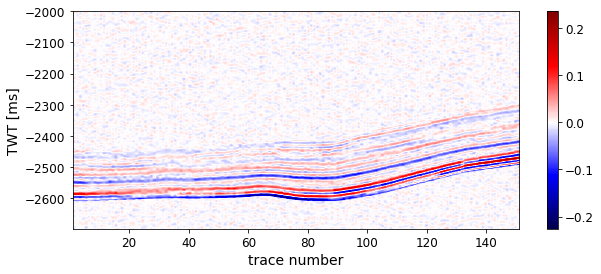

In [33]:
seis_noise, extent_seis_noise = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_1_files/Seismic_10_60_Noise.segy', color_map='seismic')

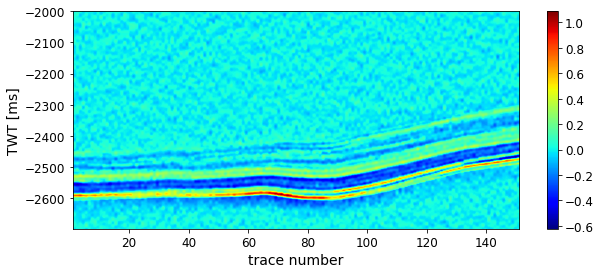

In [34]:
relai_noise, extent_relai_noise = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_1_files/Seismic_10_60_Noise_RelAi.segy', color_map='any')

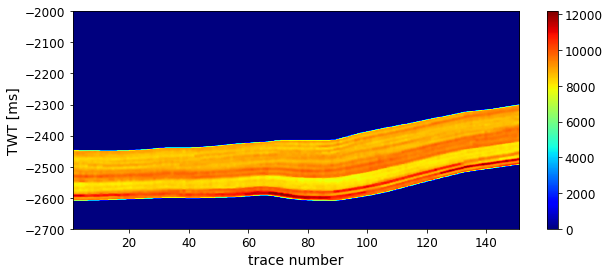

In [35]:
seis_inv_noise, extent_seis_inv_noise = segy_file(file_name='../Machine_learning_based_seismic_classification_for_facies_prediction/case_1_files/Impedance_10_60_Noise.segy', color_map='any')

# Data processing

### Extract all data from SEGy to DataFrame

In [37]:
df_inst_freq = pd.DataFrame(Inst_freq.T)
df_envel = pd.DataFrame(Envelope.T)
df_depth = pd.DataFrame(depths.T)
df_facies = pd.DataFrame(facies.T)
df_seis = pd.DataFrame(seismic.T)
df_relai = pd.DataFrame(rel_ai.T)

df_inst_freq = df_inst_freq.iloc[0:700]
df_envel = df_envel.iloc[0:700]
df_depth = df_depth.iloc[0:700]
df_facies = df_facies.iloc[0:700]
df_seis = df_seis.iloc[0:700]
df_relai = df_relai.iloc[0:700]

In [38]:
df_seis_inv = pd.DataFrame(Seis_inv.T)
# Cut the last row in seis inve since it has 701 rows
df_seis_inv = df_seis_inv.iloc[0:700]

df_relai_10_60 = pd.DataFrame(Seis_ormsby_6_10_60_80_RelAI.T)
df_seis_10_60 = pd.DataFrame(Seis_ormsby_6_10_60_80.T)
df_relai_10_60 = df_relai_10_60.iloc[0:700]
df_seis_10_60 = df_seis_10_60.iloc[0:700]

df_relai_10_80 = pd.DataFrame(Seis_ormsby_6_10_80_100_RelAI.T)
df_seis_10_80 = pd.DataFrame(Seis_ormsby_6_10_80_100.T)
df_relai_10_80 = df_relai_10_80.iloc[0:700]
df_seis_10_80 = df_seis_10_80.iloc[0:700]

df_relai_10_100 = pd.DataFrame(Seis_ormsby_6_10_100_120_RelAI.T)
df_seis_10_100 = pd.DataFrame(Seis_ormsby_6_10_100_120.T)
df_relai_10_100 = df_relai_10_100.iloc[0:700]
df_seis_10_100 = df_seis_10_100.iloc[0:700]

In [39]:
df_seis_inv_10_60 = pd.DataFrame(seis_inv_10_60.T)
df_seis_inv_10_60 = df_seis_inv_10_60.iloc[0:700]

df_seis_inv_10_80 = pd.DataFrame(seis_inv_10_80.T)
df_seis_inv_10_80 = df_seis_inv_10_80.iloc[0:700]

df_seis_inv_10_100 = pd.DataFrame(seis_inv_10_100.T)
df_seis_inv_10_100 = df_seis_inv_10_100.iloc[0:700]

In [40]:
df_spec_dec_30 = pd.DataFrame(spec_dec_30.T)
df_spec_dec_60 = pd.DataFrame(spec_dec_60.T)
df_spec_dec_90 = pd.DataFrame(spec_dec_90.T)

df_spec_dec_30 = df_spec_dec_30.iloc[0:700]
df_spec_dec_60 = df_spec_dec_60.iloc[0:700]
df_spec_dec_90 = df_spec_dec_90.iloc[0:700]

In [41]:
df_seis_noise = pd.DataFrame(seis_noise.T)
df_relai_noise = pd.DataFrame(relai_noise.T)
df_seis_inv_noise = pd.DataFrame(seis_inv_noise.T)

df_seis_noise = df_seis_noise.iloc[0:700]
df_relai_noise = df_relai_noise.iloc[0:700]
df_seis_inv_noise = df_seis_inv_noise.iloc[0:700]

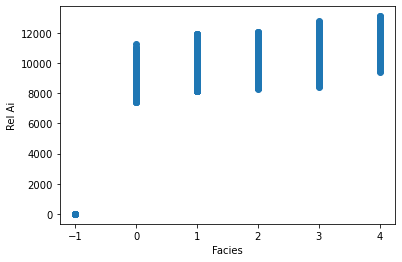

In [43]:
# Plot Facies VS Seis Inv
plt.scatter(df_facies, df_seis_inv)
plt.xlabel('Facies')
plt.ylabel('Rel Ai')
plt.show()

### Remove data that are out of reservoir (for Geol.Time it is data that =250, for facies =-1, seis_inv =0, etc.)

In [44]:
df_depth.head()

0      1      2      3      4      5      6      7      8      9    ...  \
0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  ...   
1  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  ...   
2  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  ...   
3  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  ...   
4  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  ...   

     141    142    143    144    145    146    147    148    149    150  
0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  
1  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  
2  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  
3  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  
4  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  250.0  

[5 rows x 151 columns]

In [45]:
df_facies.head()

0    1    2    3    4    5    6    7    8    9    ...  141  142  143  144  \
0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0 -1.0   
1 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0 -1.0   
2 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0 -1.0   
3 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0 -1.0   
4 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0 -1.0   

   145  146  147  148  149  150  
0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
1 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
2 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
3 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
4 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  

[5 rows x 151 columns]

In [46]:
df_depth = replace_nonexisting_data_with_NaN(df_depth, df_depth.iloc[0,0])
df_relai = replace_nonexisting_data_with_NaN(df_relai, df_relai.iloc[0,0])
df_facies = replace_nonexisting_data_with_NaN(df_facies, df_facies.iloc[0,0])
df_inst_freq = replace_nonexisting_data_with_NaN(df_inst_freq, df_inst_freq.iloc[0,0])
df_envel = replace_nonexisting_data_with_NaN(df_envel, df_envel.iloc[0,0])
df_seis = replace_nonexisting_data_with_NaN(df_seis, df_seis.iloc[0,0])

df_seis_inv = replace_nonexisting_data_with_NaN(df_seis_inv, df_seis_inv.iloc[0,0])

In [47]:
df_seis_inv_10_60 = replace_nonexisting_data_with_NaN(df_seis_inv_10_60, df_seis_inv_10_60.iloc[0,0])
df_seis_inv_10_80 = replace_nonexisting_data_with_NaN(df_seis_inv_10_80, df_seis_inv_10_80.iloc[0,0])
df_seis_inv_10_100 = replace_nonexisting_data_with_NaN(df_seis_inv_10_100, df_seis_inv_10_100.iloc[0,0])

### Remove data that are out of reservoir by filtering by another df

In [48]:
# take only data that are in reservoir
df_relai_10_60 = take_data_that_exist(df_relai_10_60, df_seis)
df_seis_10_60 = take_data_that_exist(df_seis_10_60, df_seis)

df_relai_10_80 = take_data_that_exist(df_relai_10_80, df_seis)
df_seis_10_80 = take_data_that_exist(df_seis_10_80, df_seis)

df_relai_10_100 = take_data_that_exist(df_relai_10_100, df_seis)
df_seis_10_100 = take_data_that_exist(df_seis_10_100, df_seis)

In [49]:
df_spec_dec_30 = take_data_that_exist(df_spec_dec_30, df_seis)
df_spec_dec_60 = take_data_that_exist(df_spec_dec_60, df_seis)
df_spec_dec_90 = take_data_that_exist(df_spec_dec_90, df_seis)

In [50]:
df_seis_noise = take_data_that_exist(df_seis_noise, df_seis)
df_relai_noise = take_data_that_exist(df_relai_noise, df_seis)


df_seis_inv_noise = replace_nonexisting_data_with_NaN(df_seis_inv_noise, df_seis_inv_noise.iloc[0,0])

Plot 2D sections to check

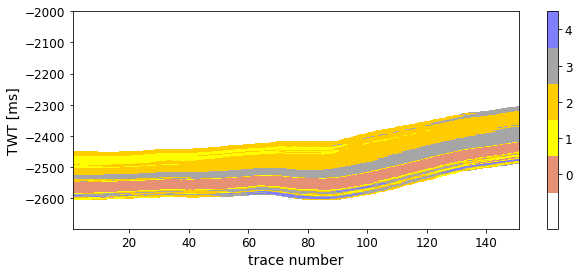

In [51]:
plot_2D_section(data_file=df_facies.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=None)

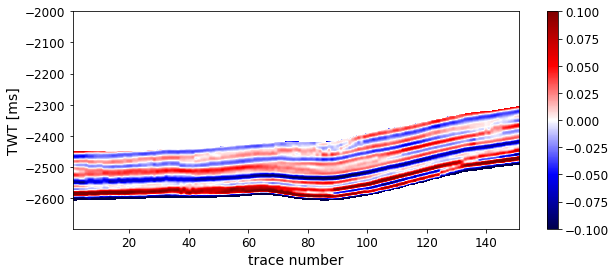

In [52]:
plot_2D_section(data_file=df_seis.T, extent_plot=extent_seismic, color_map='seismic', number_of_facies=5, list_of_wells=None)

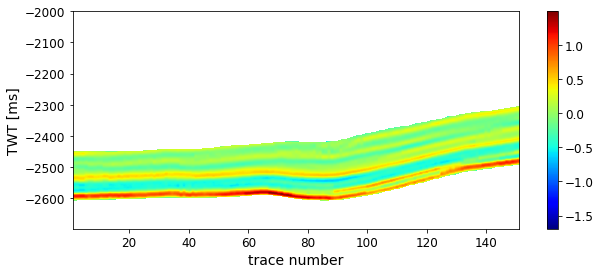

In [53]:
plot_2D_section(data_file=df_relai, extent_plot=extent_seismic, color_map='any', number_of_facies=5, list_of_wells=None)

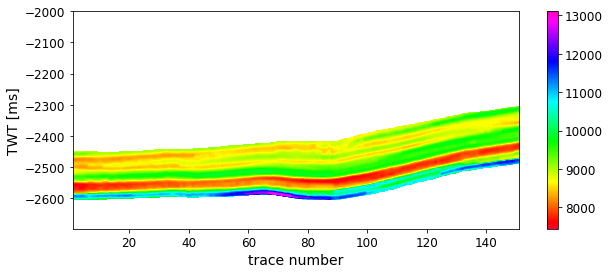

In [54]:
plot_2D_section(data_file=df_seis_inv, extent_plot=extent_seismic, color_map='seis_inv', number_of_facies=5, list_of_wells=None)

In [57]:
df_facies.describe()

0           1           2           3           4           5    \
count  163.000000  163.000000  162.000000  162.000000  162.000000  161.000000   
mean     1.435583    1.435583    1.456790    1.462963    1.475309    1.434783   
std      1.111315    1.111316    1.115107    1.092827    1.087481    1.071113   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.500000    1.000000   
75%      2.000000    2.000000    2.000000    2.000000    2.000000    2.000000   
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   

              6           7           8           9    ...         141  \
count  161.000000  161.000000  161.000000  159.000000  ...  191.000000   
mean     1.459627    1.472050    1.472050    1.440252  ...    1.973822   
std      1.089689    1.078553    1.061026    1.034783  ...    1.153642   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      1.000000    1.000000    1.000000    1.000000  ...    1.500000   
50%      1.000000    2.000000    1.000000    1.000000  ...    2.000000   
75%      2.000000    2.000000    2.000000    2.000000  ...    3.000000   
max      4.000000    4.000000    4.000000    4.000000  ...    4.000000   

              142         143         144         145         146         147  \
count  191.000000  191.000000  192.000000  191.000000  192.000000  192.000000   
mean     1.984293    1.968586    2.031250    2.010471    2.031250    2.015625   
std      1.162920    1.164862    1.210366    1.209565    1.218987    1.199811   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
50%      2.000000    2.000000    2.000000    2.000000    2.000000    2.000000   
75%      3.000000    3.000000    3.000000    3.000000    3.000000    3.000000   
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   

              148         149         150  
count  192.000000  192.000000  193.000000  
mean     2.026042    2.041667    2.046632  
std      1.203985    1.192618    1.164985  
min      0.000000    0.000000    0.000000  
25%      1.000000    1.000000    1.000000  
50%      2.000000    2.000000    2.000000  
75%      3.000000    3.000000    3.000000  
max      4.000000    4.000000    4.000000  

[8 rows x 151 columns]

In [58]:
df_relai.describe()

0           1           2           3           4           5    \
count  164.000000  164.000000  164.000000  164.000000  163.000000  163.000000   
mean     0.049335    0.049046    0.048878    0.049199    0.049237    0.043822   
std      0.422863    0.424248    0.435236    0.434890    0.400591    0.375946   
min     -1.651672   -1.687134   -1.672729   -1.631958   -1.582825   -1.539246   
25%     -0.191315   -0.194748   -0.190125   -0.194382   -0.192383   -0.191803   
50%     -0.025604   -0.001862   -0.006866   -0.008026    0.003601    0.001831   
75%      0.317337    0.316925    0.325531    0.329346    0.296021    0.268097   
max      1.151123    1.151489    1.160095    1.162781    1.061890    0.942993   

              6           7           8           9    ...         141  \
count  163.000000  162.000000  161.000000  161.000000  ...  193.000000   
mean     0.035486    0.043907    0.046087    0.041068  ...    0.039935   
std      0.411205    0.393670    0.392590    0.381865  ...    0.348305   
min     -1.495544   -1.447510   -1.404358   -1.359741  ...   -1.463135   
25%     -0.195557   -0.170013   -0.167542   -0.168274  ...   -0.156555   
50%     -0.003357    0.000244   -0.001709   -0.002014  ...    0.020630   
75%      0.266815    0.247787    0.226807    0.230713  ...    0.196228   
max      1.033508    1.063599    1.053345    1.023010  ...    0.963867   

              142         143         144         145         146         147  \
count  193.000000  193.000000  192.000000  193.000000  193.000000  194.000000   
mean     0.039746    0.038245    0.051325    0.048129    0.049283    0.043857   
std      0.343634    0.356811    0.356683    0.364210    0.366200    0.376939   
min     -1.031006   -1.408691   -1.470520   -1.052368   -1.352539   -1.540100   
25%     -0.162720   -0.148987   -0.166000   -0.196289   -0.197937   -0.197708   
50%      0.032593    0.028931    0.043549    0.020630    0.005554    0.009674   
75%      0.206482    0.193298    0.184631    0.240234    0.234680    0.241577   
max      0.979431    1.027710    1.123901    1.098389    1.142578    1.080139   

              148         149         150  
count  194.000000  194.000000  194.000000  
mean     0.044095    0.045591    0.041668  
std      0.377822    0.376298    0.378077  
min     -1.095337   -1.316589   -1.585815  
25%     -0.204330   -0.188431   -0.173676  
50%      0.015686    0.018829    0.027527  
75%      0.234344    0.243073    0.241867  
max      1.146545    1.064026    1.016785  

[8 rows x 151 columns]

As we can see, the size of facies and features is different.

It means that when applying ML models usinf features, the predicted facies in reservoir can have different number of values

and it can be difficult to compare the actual facies with predicted.

To tackle this problem, I used a 'filter' when predicting 2D - so it will be possible to compare facies 

## Statistics


In [55]:
fig = px.histogram(df_facies.stack(), width=600, height=400, histnorm='percent', text_auto='.1f')
fig.update_layout(yaxis_title="Facies' percentage, %")
fig.update_layout(xaxis_title="Facies code")
fig.update_layout(bargap=0.2)
fig.show()

In [56]:
fig = px.histogram(df_facies.stack(), width=600, height=400,  text_auto=True)
fig.update_layout(yaxis_title="Facies' count for Zone 2")
fig.update_layout(xaxis_title="Facies code")
fig.show()

### Plots

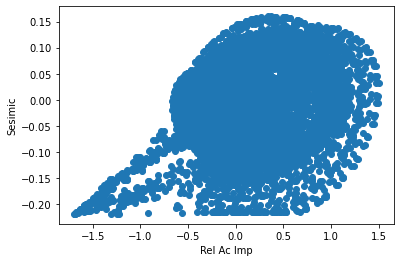

In [57]:
# Plot Rel AI VS seismic

plt.figure(figsize=(6, 4))
plt.scatter(df_relai.iloc[:,:], df_seis.iloc[:,:])
plt.xlabel('Rel Ac Imp')
plt.ylabel('Sesimic')
plt.show()

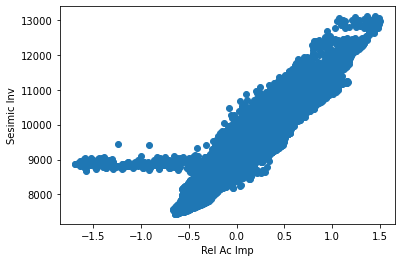

In [58]:
# Plot Rel AI VS seismic inv

plt.figure(figsize=(6, 4))
plt.scatter(df_relai.iloc[:,:], df_seis_inv.iloc[:,:])
plt.xlabel('Rel Ac Imp')
plt.ylabel('Sesimic Inv')
plt.show()

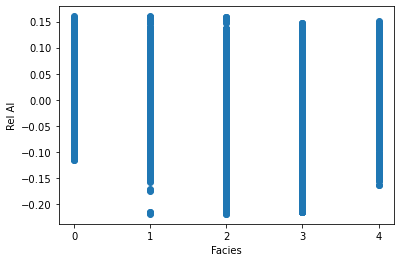

In [59]:
# Plot Facies VS Seismic
plt.scatter(df_facies, df_seis)
plt.xlabel('Facies')
plt.ylabel('Rel AI')
plt.xticks(np.arange(0, 5, 1))
plt.show()

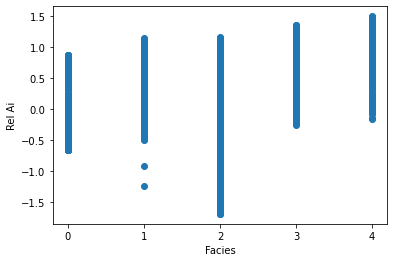

In [60]:
# Plot Facies VS Rel AI
plt.scatter(df_facies, df_relai)
plt.xlabel('Facies')
plt.ylabel('Rel Ai')
plt.xticks(np.arange(0, 5, 1))
plt.show()

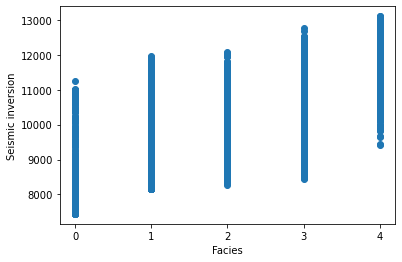

In [61]:
# Plot Facies VS Seis Inv
plt.scatter(df_facies, df_seis_inv)
plt.xlabel('Facies')
plt.ylabel('Seismic inversion')
plt.xticks(np.arange(0, 5, 1))
plt.show()

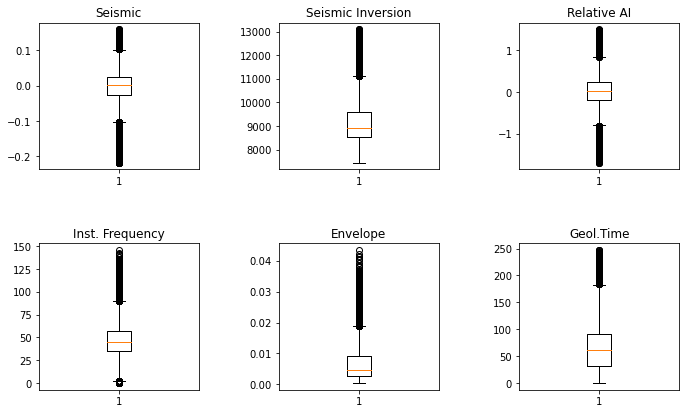

In [62]:
# Box plots


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
# fig, ax = plt.subplots(2, 3)

# Seismic
ax[0, 0].boxplot(df_seis.stack())
ax[0, 0].set_title('Seismic')

# Seismic Inv
ax[0, 1].boxplot(df_seis_inv.stack())
ax[0, 1].set_title('Seismic Inversion')

# Rel AI
ax[0, 2].boxplot(df_relai.stack())
ax[0, 2].set_title('Relative AI')

# Inst Freq
ax[1, 0].boxplot(df_inst_freq.stack())
ax[1, 0].set_title('Inst. Frequency')

# Envelope
ax[1, 1].boxplot(df_envel.stack())
ax[1, 1].set_title('Envelope')

# Geol.Time
ax[1, 2].boxplot(df_depth.stack())
ax[1, 2].set_title('Geol.Time')


fig.subplots_adjust(left=0.1, right=0.99, bottom=0.05, top=0.9,
                    hspace=0.5, wspace=0.5)



plt.show()

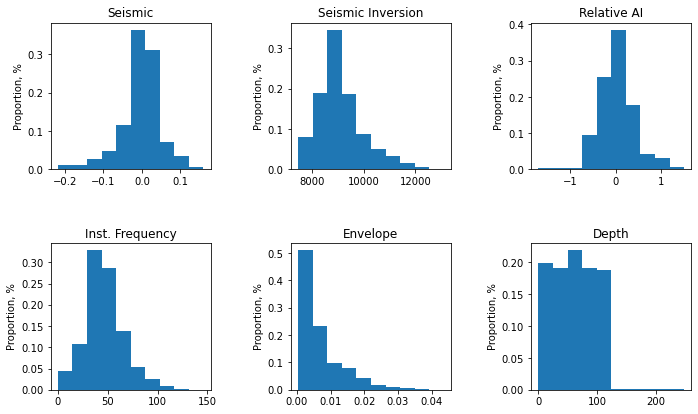

In [63]:
# Histograms


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
# fig, ax = plt.subplots(2, 3)

# Seismic
ax[0, 0].hist(df_seis.stack(), weights=np.ones(len(df_seis.stack())) / len(df_seis.stack()))
ax[0, 0].set_title('Seismic')

# Seismic Inv
ax[0, 1].hist(df_seis_inv.stack(), weights=np.ones(len(df_seis_inv.stack())) / len(df_seis_inv.stack()))
ax[0, 1].set_title('Seismic Inversion')
#ax.flatten()[1].set_ylabel('Seismic Inv data, %')

# Rel AI
ax[0, 2].hist(df_relai.stack(), weights=np.ones(len(df_relai.stack())) / len(df_relai.stack()))
ax[0, 2].set_title('Relative AI')
#ax.flatten()[2].set_ylabel('Relative Ac Imp, %')

# Inst Freq
ax[1, 0].hist(df_inst_freq.stack(), weights=np.ones(len(df_inst_freq.stack())) / len(df_inst_freq.stack()))
ax[1, 0].set_title('Inst. Frequency')
#ax.flatten()[3].set_ylabel('Inst Frequency, %')

# Envelope
ax[1, 1].hist(df_envel.stack(), weights=np.ones(len(df_envel.stack())) / len(df_envel.stack()))
ax[1, 1].set_title('Envelope')
ax.flatten()[4].set_ylabel('Envelope, %')

# Depth
ax[1, 2].hist(df_depth.stack(), weights=np.ones(len(df_depth.stack())) / len(df_depth.stack()))
ax[1, 2].set_title('Depth')
##ax.flatten()[5].set_ylabel('Depth, %')

for i in range(6):
    ax.flatten()[i].set_ylabel('Proportion, %')

fig.subplots_adjust(left=0.1, right=0.99, bottom=0.05, top=0.9,
                    hspace=0.5, wspace=0.5)


# plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.show()

Standartization

In [64]:
# Standartize with value_to_drop:
df_depth_std = standartization(df_depth, value_to_drop=False)
df_depth_std

df_relai_std = standartization(df_relai, value_to_drop=False)
df_relai_std

df_seis_std = standartization(df_seis, value_to_drop=False)
df_seis_std

df_inst_freq_std = standartization(df_inst_freq, value_to_drop=False)
df_inst_freq_std

df_envel_std = standartization(df_envel, value_to_drop=False)
df_envel_std

df_seis_inv_std = standartization(df_seis_inv, value_to_drop=False)

df_relai_10_60_std = standartization(df_relai_10_60, value_to_drop=False)
df_seis_10_60_std = standartization(df_seis_10_60, value_to_drop=False)

df_relai_10_80_std = standartization(df_relai_10_80, value_to_drop=False)
df_seis_10_80_std = standartization(df_seis_10_80, value_to_drop=False)

df_relai_10_100_std = standartization(df_relai_10_100, value_to_drop=False)
df_seis_10_100_std = standartization(df_seis_10_100, value_to_drop=False)

In [65]:
df_seis_inv_10_60_std = standartization(df_seis_inv_10_60, value_to_drop=False)
df_seis_inv_10_80_std = standartization(df_seis_inv_10_80, value_to_drop=False)
df_seis_inv_10_100_std = standartization(df_seis_inv_10_100, value_to_drop=False)

In [66]:
df_spec_dec_30_std = standartization(df_spec_dec_30, value_to_drop=False)
df_spec_dec_60_std = standartization(df_spec_dec_60, value_to_drop=False)
df_spec_dec_90_std = standartization(df_spec_dec_90, value_to_drop=False)

In [67]:
df_seis_noise_std = standartization(df_seis_noise, value_to_drop=False)
df_relai_noise_std = standartization(df_relai_noise, value_to_drop=False)
df_seis_inv_noise_std = standartization(df_seis_inv_noise, value_to_drop=False)

## Defining the best baseline ML model (use random number of wells, for example 7 wells) for features defined with Ricker wavelet

### Using 7 random wells

In [70]:
# Create a list with 2% of traces (30 wells)
col = np.linspace(0, len(df_facies.columns)-1, int(len(df_facies.columns)*0.2), dtype='int')
col = col.tolist()
print(len(col))

# Create a list of 7 random wells
col_7 = [24, 44, 64, 84, 104, 124, 144]

30


In [71]:
col_7

[24, 44, 64, 84, 104, 124, 144]

In [72]:
col_30 = col


In [73]:
# Check if in this wells all facies are presented
df_facies[col_7].apply(pd.Series.value_counts)

24   44   64   84   104  124  144
0.0   31   34   32   37   38   33   39
1.0   39   26   24   26    9   17   11
2.0   66   78   73   90  103   81   56
3.0   20   24   37   36   54   62   77
4.0    2    3    6    6    4    3    9

Taking traces (well-logs) from 2D section to train ML model 

In [74]:
df_facies_wells = df_wells_from_section(df_facies, col_7)

# features
depth_std_wells = df_wells_from_section(df_depth_std, col_7)
relai_std_wells = df_wells_from_section(df_relai_std, col_7)
seismic_std_wells = df_wells_from_section(df_seis_std, col_7)
envel_std_wells = df_wells_from_section(df_envel_std, col_7)
inst_freq_std_wells = df_wells_from_section(df_inst_freq_std, col_7)

df_seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_7)

relai_10_60_wells =  df_wells_from_section(df_relai_10_60_std, col_7)
seis_10_60_wells =  df_wells_from_section(df_seis_10_60_std, col_7)

relai_10_80_wells = df_wells_from_section(df_relai_10_80_std, col_7)
seis_10_80_wells = df_wells_from_section(df_seis_10_80_std, col_7)

relai_10_100_wells = df_wells_from_section(df_relai_10_100_std, col_7)
seis_10_100_wells = df_wells_from_section(df_seis_10_100_std, col_7)

In [75]:
seis_inv_10_60_wells = df_wells_from_section(df_seis_inv_10_60_std, col_7)
seis_inv_10_80_wells = df_wells_from_section(df_seis_inv_10_80_std, col_7)
seis_inv_10_100_wells = df_wells_from_section(df_seis_inv_10_100_std, col_7)

In [76]:
spec_dec_30_wells = df_wells_from_section(df_spec_dec_30_std, col_7)
spec_dec_60_wells = df_wells_from_section(df_spec_dec_60_std, col_7)
spec_dec_90_wells = df_wells_from_section(df_spec_dec_90_std, col_7)

In [77]:
seis_noise_wells = df_wells_from_section(df_seis_noise_std, col_7)
seis_relai_noise_wells = df_wells_from_section(df_relai_noise_std, col_7)
seis_inv_noise_wells = df_wells_from_section(df_seis_inv_noise_std, col_7)

In [78]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, df_seis_inv_std_wells]

Concatenate facies and features

In [79]:
facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies     relai      seis  seis_inv
445     2.0 -1.825721 -1.280796 -0.255143
446     2.0 -1.769514 -1.392308 -0.200535
447     2.0  0.419804  0.614907 -0.158709
448     2.0  0.479596  0.429054 -0.130284
449     2.0  0.514135  0.280371 -0.115286
..      ...       ...       ...       ...
497     3.0  1.216483 -2.507427  2.137385
498     4.0  0.839812 -2.693280  2.092458
499     4.0  0.445872 -2.841963  2.062308
500     4.0  0.043622 -2.879134  1.473288
501     2.0 -0.356835 -2.879134  0.930187

[1278 rows x 4 columns]

# ML models 7 wells

## Use RelAI, Seismic, Seis_Inv

### Logistic Regression

In [572]:
# Logistic Regression
facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

# facies_and_features = concat_facies_features(df_facies_wells, feature_list_all)
facies_and_features = facies_features_3.copy()
facies_and_features


facies     relai      seis  seis_inv
448     2.0  0.500994  0.456696 -0.137647
449     2.0  0.585500  0.387368 -0.041928
450     2.0  0.655947  0.314294  0.030223
451     2.0  0.642442 -0.116442  0.073145
452     2.0  0.615864 -0.184275  0.084116
..      ...       ...       ...       ...
571     2.0  0.655599 -0.651135  1.035295
572     2.0  0.461504 -0.987905  1.101078
573     3.0  0.131561 -1.686039  1.096654
574     2.0 -0.265416 -2.031726  1.000959
575     1.0 -0.800122 -2.739053  0.813618

[537 rows x 4 columns]

In [573]:
facies_and_features['facies'].value_counts()

2.0    215
3.0    129
0.0    105
1.0     82
4.0      6
Name: facies, dtype: int64

In [574]:
# Divide on train and validation set
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [575]:
# train LR model
model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)

LogisticRegression()

In [84]:
test_predict = model_LR.predict(x_test)

# Validation set
print(pd.crosstab(y_test.values.flatten(), test_predict))
print(classification_report(y_test.values.flatten(), test_predict))

col_0  0.0  1.0  2.0  3.0  4.0
row_0                         
0.0     34    0   12    0    0
1.0      0    1   18    9    0
2.0      0    0  106   10    0
3.0      0    0   24   33    0
4.0      0    0    0    8    1
              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85        46
         1.0       1.00      0.04      0.07        28
         2.0       0.66      0.91      0.77       116
         3.0       0.55      0.58      0.56        57
         4.0       1.00      0.11      0.20         9

    accuracy                           0.68       256
   macro avg       0.84      0.48      0.49       256
weighted avg       0.75      0.68      0.64       256



In [85]:
# Predict 2D facies from features
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                            relai=df_relai_std, 
                                            seis=df_seis_std, 
                                            seis_inv=df_seis_inv_std, 
                                            model=model_LR)
facies_pred

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [86]:
# accuracy with cross-val 10
accuracy_score_LR_7_val_train = accuracy_score_cv(estimator=model_LR, X=x_train, y=y_train, cv=10)
accuracy_score_LR_7_val_train

accuracy:  0.664410812868837


0.664410812868837

In [87]:
accuracy_score_LR_7_val_test = accuracy_score_cv(estimator=model_LR, X=x_test, y=y_test, cv=10)
accuracy_score_LR_7_val_test

accuracy:  0.6559999999999999


0.6559999999999999

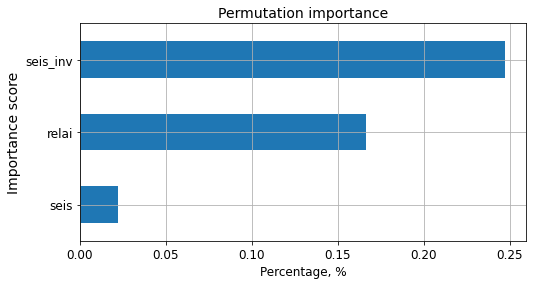

In [89]:
# Importance of features
from machine_learning import feature_importance_plot
feature_importance_plot(model_LR, x_train, y_train, random_state=50)

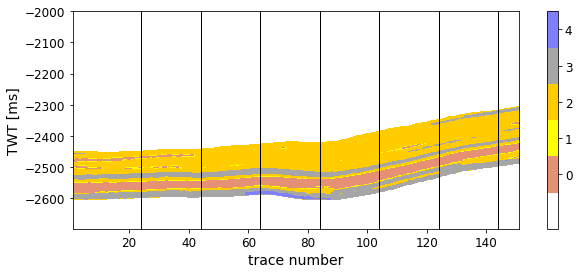

In [90]:
# Plot 2D facies prediction with wells
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies,  color_map='facies', number_of_facies=5, list_of_wells=col_7)

In [91]:
# Facies in lower zone of the reservoir
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale', 'Carbonate']

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      5032
         1.0       0.46      0.01      0.01      3359
         2.0       0.63      0.88      0.74     10916
         3.0       0.65      0.59      0.62      6209
         4.0       0.70      0.29      0.41       599

    accuracy                           0.68     26115
   macro avg       0.66      0.52      0.52     26115
weighted avg       0.66      0.68      0.63     26115



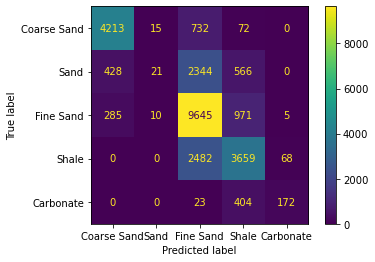

In [92]:
# Confusion matrix of 2D section (wells that were used for training are removed)
report_print_LR_7, f1_score_per_class_LR_7, count_facies, accuracy_test_LR_7  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                   facies_pred, 
                                                                                                   col_number=col_7, 
                                                                                                   facies_class=facies_class)

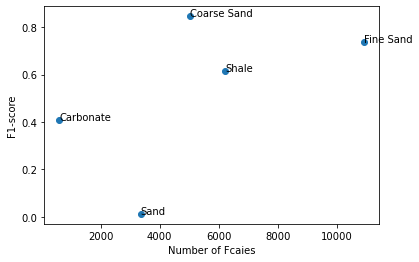

In [93]:
# Plot number of facies VS F1_score
facies_class = ['Coarse Sand', 'Sand', 'Fine Sand', 'Shale', 'Carbonate']
fig, ax = plt.subplots()
ax.scatter(count_facies, f1_score_per_class_LR_7)

for i, txt in enumerate(facies_class):
    ax.annotate(txt, (count_facies[i], f1_score_per_class_LR_7[i]))
    
plt.ylabel('F1-score')
plt.xlabel('Number of Fcaies')
plt.show()

In [94]:
f1_score_per_class_LR_ = f1_score_per_class_LR_7.tolist()
f1_score_per_class_LR_

[0.846153846153846,
 0.012334801762114538,
 0.7378930456736287,
 0.6159414190724687,
 0.40758293838862564]

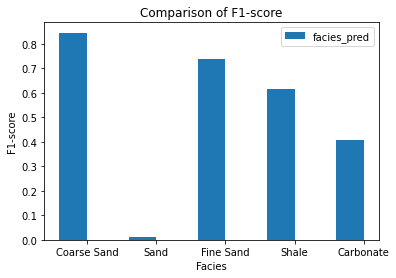

In [95]:
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale', 'Carbonate']
facies_pred = f1_score_per_class_LR_
#facies_actual = fg
  
X_axis = np.arange(len(facies_class))
  
plt.bar(X_axis - 0.2, facies_pred, 0.4, label = 'facies_pred')
#plt.bar(X_axis + 0.2, facies_actual, 0.4, label = 'facies_actual')
  
plt.xticks(X_axis, facies_class)
plt.xlabel("Facies")
plt.ylabel("F1-score")
plt.title("Comparison of F1-score")
plt.legend()
plt.show()

The same training is performed for other ML models (KNN, SVM, RF, NN)

### K-Nearest Neighbor, KNN

In [100]:
# K-Nearest Neighbor, KNN

model_KNN = neighbors.KNeighborsClassifier()
model_KNN.fit(x_train, y_train)

test_predict = model_KNN.predict(x_test)

In [101]:
# Validation set
metrics.confusion_matrix(y_test.values.flatten(), test_predict)

print(pd.crosstab(y_test.values.flatten(), test_predict))

print(classification_report(y_test.values.flatten(), test_predict))

col_0  0.0  1.0  2.0  3.0  4.0
row_0                         
0.0     44    1    1    0    0
1.0      1   15    9    3    0
2.0      1    8  101    6    0
3.0      0    0    7   50    0
4.0      0    1    1    5    2
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        46
         1.0       0.60      0.54      0.57        28
         2.0       0.85      0.87      0.86       116
         3.0       0.78      0.88      0.83        57
         4.0       1.00      0.22      0.36         9

    accuracy                           0.83       256
   macro avg       0.84      0.69      0.71       256
weighted avg       0.83      0.83      0.82       256



In [102]:
accuracy_score_KNN_7_train = accuracy_score_cv(estimator=model_KNN, X=x_train, y=y_train, cv=10)
accuracy_score_KNN_7_train

accuracy:  0.8150295069484104


0.8150295069484104

In [103]:
accuracy_score_KNN_7_test = accuracy_score_cv(estimator=model_KNN, X=x_test, y=y_test, cv=10)
accuracy_score_KNN_7_test

accuracy:  0.7467692307692307


0.7467692307692307

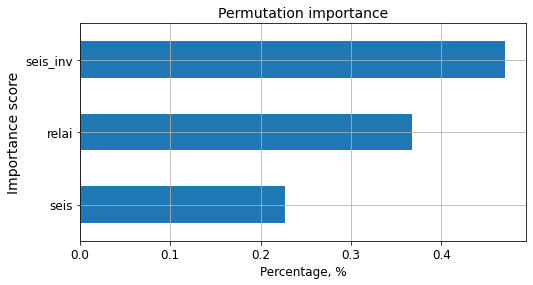

In [104]:
feature_importance_plot(model_KNN, x_train, y_train, random_state=50)

In [105]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=model_KNN)

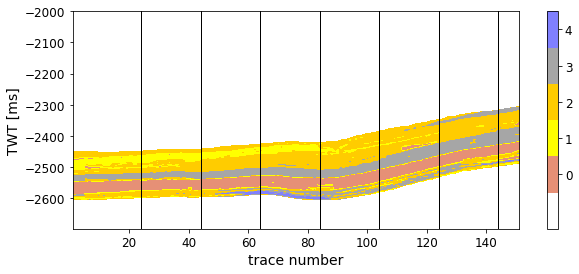

In [106]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_7)

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      5032
         1.0       0.60      0.60      0.60      3359
         2.0       0.82      0.84      0.83     10916
         3.0       0.83      0.79      0.81      6209
         4.0       0.66      0.44      0.53       599

    accuracy                           0.81     26115
   macro avg       0.76      0.72      0.74     26115
weighted avg       0.81      0.81      0.81     26115



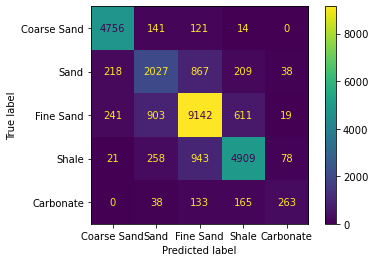

In [107]:
report_print_KNN_7, f1_score_per_class_KNN_7, count_facies, accuracy_test_KNN_7  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_7, 
                                                                                                         facies_class=facies_class)

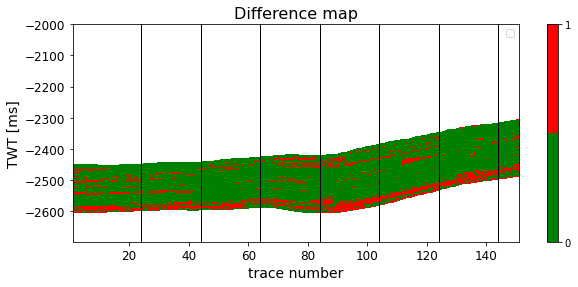

In [108]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_7)

### Support Vector Machines

In [109]:
model_SVM = SVC()
model_SVM.fit(x_train, y_train)
test_predict = model_SVM.predict(x_test)

In [110]:
metrics.confusion_matrix(y_test.values.flatten(), test_predict)
# x=y2_test, y=facies_predict,

print(pd.crosstab(y_test.values.flatten(), test_predict))

print(classification_report(y_test.values.flatten(), test_predict))

col_0  0.0  1.0  2.0  3.0  4.0
row_0                         
0.0     43    1    2    0    0
1.0      1    5   15    6    1
2.0      0    0  102   14    0
3.0      0    0    6   49    2
4.0      0    0    4    2    3
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96        46
         1.0       0.83      0.18      0.29        28
         2.0       0.79      0.88      0.83       116
         3.0       0.69      0.86      0.77        57
         4.0       0.50      0.33      0.40         9

    accuracy                           0.79       256
   macro avg       0.76      0.64      0.65       256
weighted avg       0.80      0.79      0.77       256



In [111]:
accuracy_score_SVM_7_train = accuracy_score_cv(estimator=model_SVM, X=x_train, y=y_train, cv=10)
accuracy_score_SVM_7_train

accuracy:  0.7730059013896821


0.7730059013896821

In [112]:
accuracy_score_SVM_7_test = accuracy_score_cv(estimator=model_SVM, X=x_test, y=y_test, cv=10)
accuracy_score_SVM_7_test

accuracy:  0.7272307692307691


0.7272307692307691

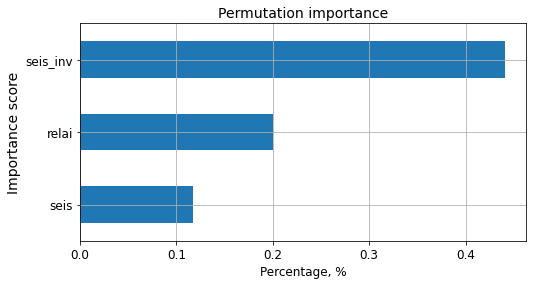

In [113]:
feature_importance_plot(model_SVM, x_train, y_train, random_state=50)

In [114]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=model_SVM)

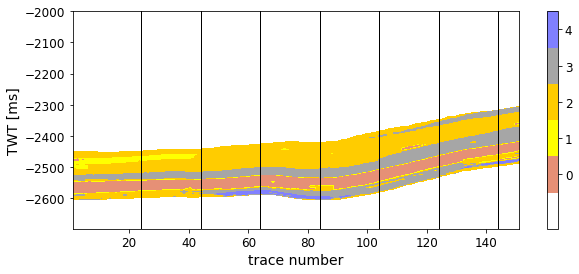

In [115]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_7)

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      5032
         1.0       0.80      0.26      0.40      3359
         2.0       0.76      0.90      0.82     10916
         3.0       0.79      0.84      0.81      6209
         4.0       0.56      0.50      0.53       599

    accuracy                           0.80     26115
   macro avg       0.77      0.69      0.70     26115
weighted avg       0.80      0.80      0.78     26115



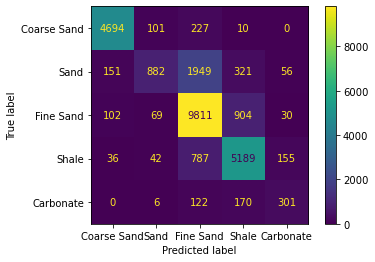

In [116]:
report_print_SVM_7, f1_score_per_class_SVM_7, count_facies, accuracy_test_SVM_7  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_7, 
                                                                                                         facies_class=facies_class)

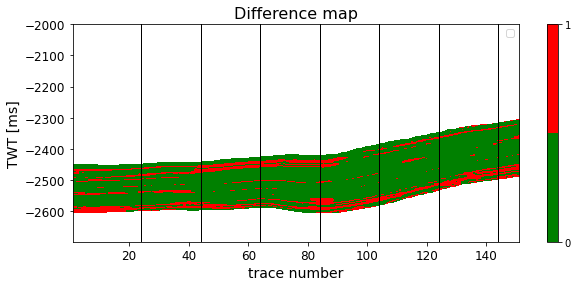

In [117]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_7)

### Random Forest classification

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [119]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [120]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [121]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[ 43   1   2   0   0]
 [  0  11  11   5   1]
 [  1   6 102   7   0]
 [  0   1   6  50   0]
 [  0   2   1   3   3]]
0.81640625
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96        46
         1.0       0.52      0.39      0.45        28
         2.0       0.84      0.88      0.86       116
         3.0       0.77      0.88      0.82        57
         4.0       0.75      0.33      0.46         9

    accuracy                           0.82       256
   macro avg       0.77      0.68      0.71       256
weighted avg       0.81      0.82      0.81       256



In [122]:
accuracy_score_RF_7_train = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF_7_train

accuracy:  0.8141062250142775


0.8141062250142775

In [123]:
accuracy_score_RF_7_test = accuracy_score_cv(estimator=RF_Classifier_model, X=x_test, y=y_test, cv=10)
accuracy_score_RF_7_test

accuracy:  0.7778461538461537


0.7778461538461537

In [124]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

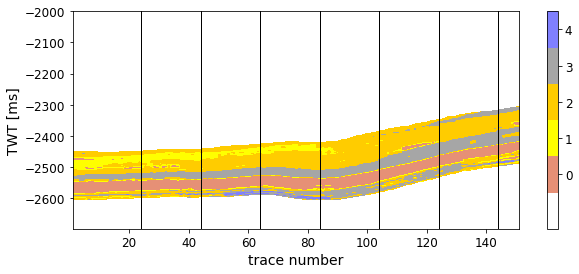

In [125]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_7)

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93      5032
         1.0       0.68      0.54      0.60      3359
         2.0       0.82      0.86      0.84     10916
         3.0       0.81      0.82      0.82      6209
         4.0       0.50      0.36      0.42       599

    accuracy                           0.81     26115
   macro avg       0.74      0.70      0.72     26115
weighted avg       0.81      0.81      0.81     26115



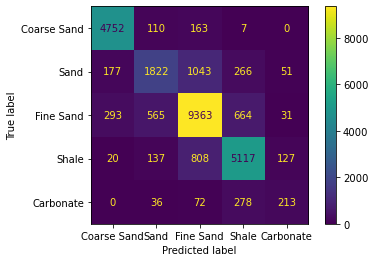

In [126]:
report_print_RF_7, f1_score_per_class_RF_7, count_facies, accuracy_test_RF_7  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_7, 
                                                                                                         facies_class=facies_class)

#### Difference map

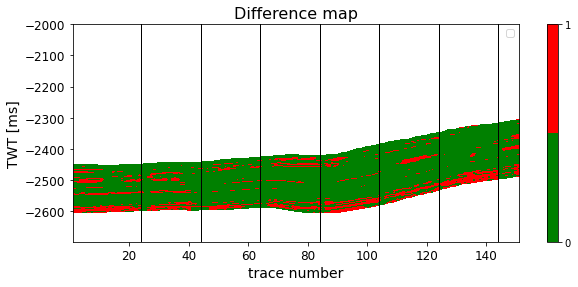

In [127]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_7)

### Neural Network

Import libraries for the NN

In [130]:
# # Import libraries

# %pip install tensorflow
# # version is tensorflow-2.11.0

In [131]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

In [133]:
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [134]:
from tensorflow.keras.layers import InputLayer

In [135]:
facies_and_features_NN = facies_and_features[['facies', 'relai', 'seis', 'seis_inv']]
facies_and_features_NN

facies     relai      seis  seis_inv
445     2.0 -1.825721 -1.280796 -0.255143
446     2.0 -1.769514 -1.392308 -0.200535
447     2.0  0.419804  0.614907 -0.158709
448     2.0  0.479596  0.429054 -0.130284
449     2.0  0.514135  0.280371 -0.115286
..      ...       ...       ...       ...
497     3.0  1.216483 -2.507427  2.137385
498     4.0  0.839812 -2.693280  2.092458
499     4.0  0.445872 -2.841963  2.062308
500     4.0  0.043622 -2.879134  1.473288
501     2.0 -0.356835 -2.879134  0.930187

[1278 rows x 4 columns]

In [136]:
tf.random.set_seed(123) 
tf.debugging.set_log_device_placement(False)

#### Split the data on train, test and validation

In [137]:
facies_and_features_mixed = facies_and_features_NN.sample(frac=1) # shuffle the rows
facies_and_features_mixed.head(5)

facies     relai      seis  seis_inv
487     3.0  0.473405  0.391883  0.507118
508     3.0  0.831666 -0.202847  1.239697
473     0.0 -1.238884 -0.091335 -1.389541
313     3.0  0.003218  1.321149  0.071079
438     2.0 -1.675183 -1.540990 -0.082054

In [138]:
train_set, test_val_set = train_test_split(facies_and_features_mixed, test_size=0.4)

print(train_set.shape)
print(test_val_set.shape)

(766, 4)
(512, 4)


In [139]:
train_set

facies     relai      seis  seis_inv
341     2.0 -0.420700 -0.240018 -0.328271
461     0.0  0.072296  0.429054 -0.337869
468     2.0 -0.672737 -1.132113 -0.076669
482     4.0  1.536295  2.845145  2.674184
400     2.0  0.605859 -0.016994  0.257808
..      ...       ...       ...       ...
348     2.0  0.007291  0.837931 -0.031652
446     3.0  0.508270  0.800760  0.480436
536     3.0  0.634207 -0.834748  0.280743
460     1.0 -0.264134  0.206030 -0.623641
580     2.0  1.310162  1.283978  1.291054

[766 rows x 4 columns]

In [140]:
# Split test_val_set on test and validation sets
test_set, val_set = train_test_split(test_val_set, test_size=0.5)
print(test_set.shape)
print(val_set.shape)

(256, 4)
(256, 4)


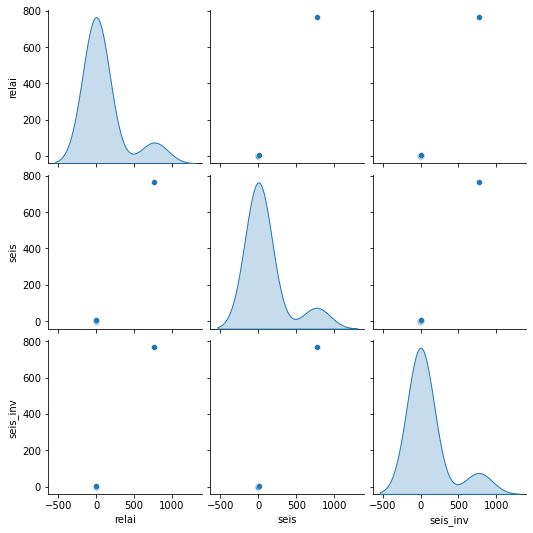

In [143]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = train_set.describe()
train_stats.pop('facies')
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") 

In [144]:
# Statistics on the train dataset to make sure it is in a good shape
train_stats = train_set.describe()
train_stats.pop("facies")
train_stats = train_stats.transpose()
train_stats

count      mean       std       min       25%       50%       75%  \
relai     766.0  0.020240  0.936251 -2.995975 -0.574252 -0.064149  0.523788   
seis      766.0  0.037258  0.927493 -4.031424 -0.388701  0.131689  0.540566   
seis_inv  766.0  0.019294  0.965671 -1.685154 -0.585188 -0.204459  0.527088   

               max  
relai     3.449952  
seis      2.956657  
seis_inv  3.693596

In [145]:
# Delete facies column
train_labels1 = train_set.pop('facies')
test_labels1 = test_set.pop('facies')
valid_labels1 = val_set.pop('facies')

In [146]:
val_set

relai      seis  seis_inv
504 -0.807960  0.391883 -0.645377
486  2.665982  1.507002  2.920478
532 -1.497926 -0.054165 -1.482179
509 -0.680068 -1.355137 -0.919506
487  2.805930  1.060955  2.890364
..        ...       ...       ...
543  0.158318  2.361927 -0.587483
313  0.003218  1.321149  0.071079
477 -0.409132 -0.537383 -0.354187
499  0.445872 -2.841963  2.062308
465 -0.100236  0.577736 -0.003312

[256 rows x 3 columns]

In [147]:
train_labels2 = train_labels1.astype(np.uint8)
train_labels2

valid_labels2 = valid_labels1.astype(np.uint8)
test_labels2 = test_labels1.astype(np.uint8)

In [148]:
# Encode the labeles
train_labels = pd.get_dummies(train_labels1, prefix='Label')
val_labels = pd.get_dummies(valid_labels1, prefix='Label')
test_labels = pd.get_dummies(test_labels1, prefix='Label')



In [149]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 766 entries, 341 to 580
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Label_0.0  766 non-null    uint8
 1   Label_1.0  766 non-null    uint8
 2   Label_2.0  766 non-null    uint8
 3   Label_3.0  766 non-null    uint8
 4   Label_4.0  766 non-null    uint8
dtypes: uint8(5)
memory usage: 9.7 KB


The data is already standartized

Build NN

In [150]:
def NN_model():
    model=Sequential()
    model.add(Dense(36, input_shape=(train_set.shape[1],)))   
    model.add(Dense(72, activation='sigmoid'))                  #input layer
    # model.add(Dense(5, activation='softmax'))                 # hidden layer 2
    model.add(Dense(5, activation='softmax'))                   # output layer
    
    learning_rate = 0.001
    optimizer = optimizers.Adam(learning_rate)

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model
    
Epochs = 500
Batch_size = 240

model = NN_model()
print('Here is a summary of this model: ')
model.summary()

with tf.device('/CPU:0'):
    history = model.fit(
        train_set,
        train_labels,
        batch_size=Batch_size,
        epochs=Epochs,
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(train_set.shape[0]/Batch_size),
        validation_data = (val_set, val_labels))



Here is a summary of this model: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                144       
                                                                 
 dense_1 (Dense)             (None, 72)                2664      
                                                                 
 dense_2 (Dense)             (None, 5)                 365       
                                                                 
Total params: 3,173
Trainable params: 3,173
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
3/3 [==============================] - 1s 114ms/step - loss: 1.7250 - accuracy: 0.1181 - val_loss: 1.6793 - val_accuracy: 0.1250
Epoch 2/500
3/3 [==============================] - 0s 15ms/step - loss: 1.6378 - accuracy: 0.1122 - val_loss: 1.5952 - val_accuracy: 0.1562
Epo

In [151]:
from keras.wrappers.scikit_learn import KerasClassifier

In [152]:
neural_network = KerasClassifier(build_fn=NN_model, epochs=5, batch_size=10,
                                     verbose=0)

In [153]:
cros_val_NN_7 = cross_val_score(neural_network, X=val_set, y=valid_labels2, cv=10, scoring='accuracy')
accuracy_score_NN_7_val_test = np.average(cros_val_NN_7)
accuracy_score_NN_7_val_test

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 45ms/step


0.5623076923076923

In [154]:
print('summary of the results after each epoch: ')
hist_res = pd.DataFrame(history.history)
hist_res['epoch'] = history.epoch
hist_res.tail(10)

summary of the results after each epoch: 


loss  accuracy  val_loss  val_accuracy  epoch
490  0.540786  0.830799  0.648129      0.742188    490
491  0.536862  0.813688  0.648521      0.738281    491
492  0.553234  0.813889  0.648576      0.738281    492
493  0.510902  0.819392  0.649251      0.738281    493
494  0.565210  0.809886  0.648802      0.738281    494
495  0.532010  0.819392  0.647974      0.734375    495
496  0.541820  0.808333  0.648086      0.730469    496
497  0.544296  0.798479  0.646229      0.738281    497
498  0.556239  0.809886  0.646338      0.738281    498
499  0.515435  0.811787  0.646679      0.742188    499

#### Accuracy for the training-validation set

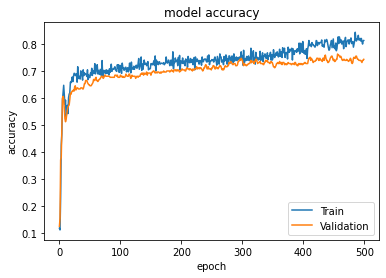

In [155]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

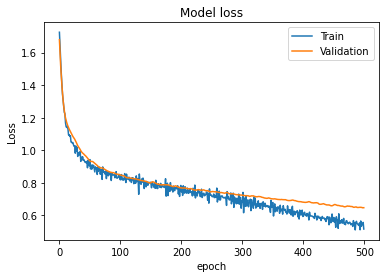

In [156]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

**Activation:**
Use Sigmoid: it didn't improve the results at all compared with Softmax. 

Relu and Tanh showed bad results

**Optimizer**
Using Adam optimizer is better that SGD

In [157]:
nn_test_prob = model.predict(test_set)
nn_test_prob.shape

8/8 [==============================] - 0s 1ms/step


(256, 5)

In [158]:
test_nn2 = np.array(pd.DataFrame(nn_test_prob).idxmax(axis=1))
test_nn2.shape

(256,)

In [159]:
# Confusion matrix of validation set (test)
print(confusion_matrix(test_labels1, test_nn2))
print(accuracy_score(test_labels1, test_nn2))
print(classification_report(test_labels1, test_nn2))

[[46  0  2  0  0]
 [ 0 13 12  5  1]
 [ 0  6 81 18  0]
 [ 0  0  5 58  3]
 [ 0  0  2  2  2]]
0.78125
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        48
         1.0       0.68      0.42      0.52        31
         2.0       0.79      0.77      0.78       105
         3.0       0.70      0.88      0.78        66
         4.0       0.33      0.33      0.33         6

    accuracy                           0.78       256
   macro avg       0.70      0.67      0.68       256
weighted avg       0.78      0.78      0.78       256



#### Facies section prediction by NN

In [160]:
r, c = np.shape(df_facies)
map_facies = np.zeros((r, c))
df_f_comparison = map_facies.copy()
df_f_comparison[:] = np.NaN
map_facies_1 = map_facies.copy()
map_facies_1[:] = np.NaN
empty_list = []

map_facies_2 = np.zeros((r, c))
map_facies_2[:] = np.NaN

map_facies_encoded = np.zeros((r, 5))
map_facies_encoded[:] = np.NaN


facies_encoded = map_facies_encoded.copy()

map_facies.shape

# for every trace (column)
for every_col in range(len(df_facies.columns)):
    new_df = pd.concat([df_relai_std.iloc[:,every_col], 
                        df_seis_std.iloc[:,every_col],
                        df_seis_inv_std.iloc[:,every_col]]
                        , axis=1)
    
    
    new_df_1 = new_df.dropna(axis=0)
    non_empty_facies = df_facies.iloc[:,every_col].dropna(axis=0)
    facies_encoded[new_df_1.index, :] = model.predict(new_df_1)
    
    facies_encoded_nn = np.array(pd.DataFrame(facies_encoded).idxmax(axis=1))
    # empty_list.append(facies_encoded_nn)
    facies_encoded_nn_1 = facies_encoded_nn.reshape(facies_encoded_nn.shape[0], -1)
    
    # Filter 
    map_facies_1[new_df_1.index, every_col] = facies_encoded_nn_1[new_df_1.index, 0]
    df_f_comparison[new_df_1.index, every_col] = df_facies.iloc[new_df_1.index, every_col]
    
    
        # Filter 
    map_facies_2[non_empty_facies.index, every_col] = map_facies_1[non_empty_facies.index, every_col]
    #df_f_comparison[new_df_1.index, every_col] = df_f_copy.iloc[new_df_1.index, every_col]
    

df_f_comparison


6/6 [==============================] - 0s 1ms/step


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

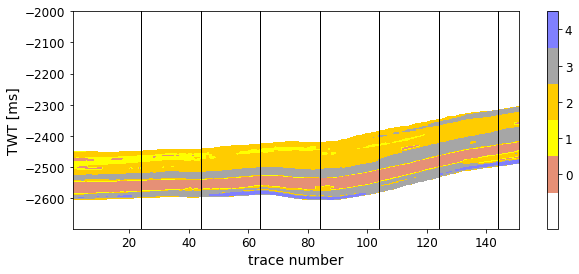

In [161]:
# Plot 2D section with facies prediction
plot_2D_section(data_file=map_facies_2.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_7)

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      5032
         1.0       0.75      0.38      0.50      3359
         2.0       0.80      0.84      0.82     10916
         3.0       0.74      0.84      0.79      6209
         4.0       0.44      0.58      0.50       599

    accuracy                           0.79     26115
   macro avg       0.73      0.72      0.71     26115
weighted avg       0.79      0.79      0.79     26115



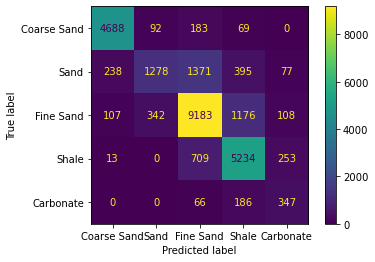

In [162]:
# Confusion matrix if 2D facies prediction and deleting wells-traces that were used for traing 
report_print_NN_7, f1_score_per_class_NN_7, count_facies, accuracy_test_NN_7  = confusion_matrix_prediction(df_f_comparison, 
                                                                                                         map_facies_2, 
                                                                                                         col_number=col_7, 
                                                                                                         facies_class=facies_class)

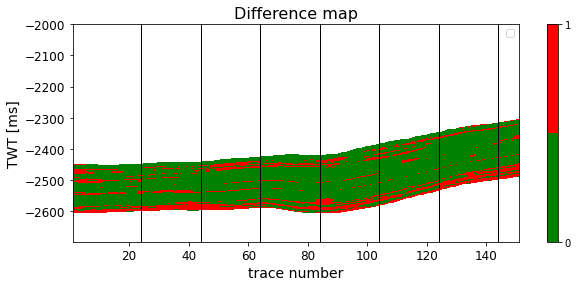

In [163]:
difference_map(df_facies_comparison=df_f_comparison, facies_predicted=map_facies_2, extent=extent_facies, list_of_wells=col_7)

In [164]:
# Compare accuracies
list_of_accuracies = [accuracy_test_LR_7, accuracy_test_KNN_7, accuracy_test_SVM_7, accuracy_test_RF_7, accuracy_test_NN_7]
list_of_accuracies_100 = [i*100 for i in list_of_accuracies]

## Compare results

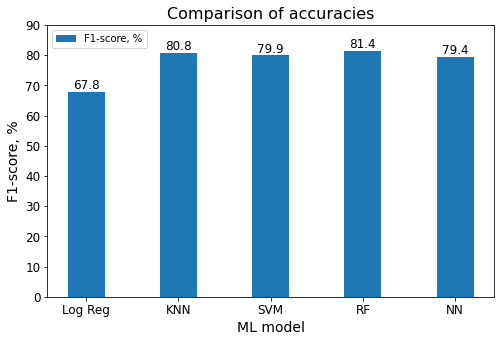

In [165]:
models_used = ['Log Reg','KNN','SVM','RF', 'NN']
fig, ax = plt.subplots(figsize=(8, 5))

  
X_axis = np.arange(len(models_used))
  
abc = plt.bar(X_axis, list_of_accuracies_100, 0.4, label = 'F1-score, %')
#plt.bar(X_axis + 0.2, facies_actual, 0.4, label = 'facies_actual')
ax.bar_label(abc, fmt='%.1f', fontsize=12)
plt.ylim(0, 90)
plt.xticks(X_axis, models_used, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("ML model", fontsize=14)
plt.ylabel("F1-score, %", fontsize=14)
plt.title("Comparison of accuracies", fontsize=16)
plt.legend(loc='upper left')
plt.show()

The best accuracy achieved for Random Forest Classifier model. 
So, this model is used for evaluating the role of the number of wells

Compare f1-score for every facies

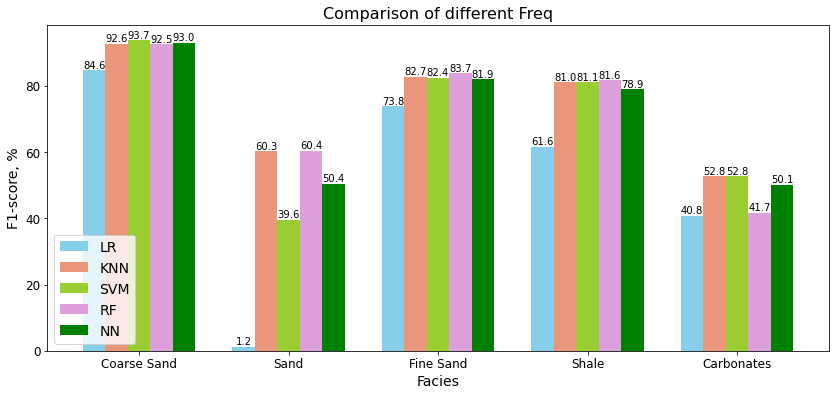

In [166]:
# freq_class = ['Ricker','Ormsby_10_60','Ormsby_10_80','Ormsby_10_100']
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale', 'Carbonates']
X_axis = np.arange(len(facies_class))
fig, ax = plt.subplots(figsize=(14,6))
  
bar1 = plt.bar(X_axis-0.3, f1_score_per_class_LR_7*100, 0.15, label = 'LR', color='skyblue')
bar2 = plt.bar(X_axis-0.15, f1_score_per_class_KNN_7*100, 0.15, label = 'KNN', color='darksalmon')
bar3 = plt.bar(X_axis, f1_score_per_class_SVM_7*100, 0.15, label = 'SVM', color='yellowgreen')
bar4 = plt.bar(X_axis+0.15, f1_score_per_class_RF_7*100, 0.15, label = 'RF', color='plum')
bar5 = plt.bar(X_axis+0.3, f1_score_per_class_NN_7*100, 0.15, label = 'NN', color='green')
#plt.bar(X_axis + 0.2, facies_actual, 0.4, label = 'facies_actual')

ax.bar_label(bar1, fmt='%.1f', fontsize=10)  
ax.bar_label(bar2, fmt='%.1f', fontsize=10)  
ax.bar_label(bar3, fmt='%.1f', fontsize=10)  
ax.bar_label(bar4, fmt='%.1f', fontsize=10)  
ax.bar_label(bar5, fmt='%.1f', fontsize=10)  
  
plt.xticks(X_axis, facies_class, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Facies", fontsize=14)
plt.ylabel("F1-score, %", fontsize=14)
plt.title("Comparison of different Freq", fontsize=16)
plt.legend(fontsize=14, loc='lower left')
plt.show()

# Exploring the role of the number of wells

Here we will play with the number of wells. 

We start from 30 wells that is 2% of the number of traces. 

We will show how the number of wells affect the prediction of the model.

We will see if there are any number of wells after which the threshold predictability of 75%.


We will start with N=30, then 15, 10, 8, 6, 5, 4, 3, 2, and 1 wells. We will use RF Classifier, since for 7 random wells it showed the best accuracy in prediction. We will not use hyperparameter tuning, but we will use Cross-validation. However, the comparison is based on prediction of 2D facies (not validation)

In [168]:
# Choose 2% of traces
col = np.linspace(0, len(df_facies.columns)-1, int(len(df_facies.columns)*0.2), dtype='int')
col = col.tolist()
len(col)


30

In [169]:
# Create an empty list and add acuracies of model
accuracy_score_number_of_wells = []

### Number of wells - 30

In [170]:
col_30 = col.copy()
len(col_30)

30

In [171]:
# Take well-logs from traces for training ML model
df_facies_wells = df_wells_from_section(df_facies, col_30)

# features
relai_std_wells = df_wells_from_section(df_relai_std, col_30)
seismic_std_wells = df_wells_from_section(df_seis_std, col_30)
seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_30)

In [172]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, seis_inv_std_wells]

# Concatenate facies and features logs
facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies     relai      seis  seis_inv
448     1.0 -0.125326  1.395490 -0.511350
449     1.0  0.060892  1.358320 -0.411719
450     2.0  0.237334  1.283978 -0.313562
451     2.0  0.399439  1.172467 -0.219108
452     2.0  0.543624  1.060955 -0.130696
..      ...       ...       ...       ...
489     3.0  1.392599 -2.024209  2.005714
490     3.0  1.080445 -2.247233  1.920986
491     4.0  0.738802 -2.470257  1.846121
492     4.0  0.374024 -2.656110  1.783819
493     4.0 -0.005091 -2.730451  1.739179

[5435 rows x 4 columns]

In [173]:
facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
448     1.0 -0.125326  1.395490 -0.511350
449     1.0  0.060892  1.358320 -0.411719
450     2.0  0.237334  1.283978 -0.313562
451     2.0  0.399439  1.172467 -0.219108
452     2.0  0.543624  1.060955 -0.130696
..      ...       ...       ...       ...
489     3.0  1.392599 -2.024209  2.005714
490     3.0  1.080445 -2.247233  1.920986
491     4.0  0.738802 -2.470257  1.846121
492     4.0  0.374024 -2.656110  1.783819
493     4.0 -0.005091 -2.730451  1.739179

[5435 rows x 4 columns]

In [174]:
# Split on train and validation set (here it is called test)
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [175]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [176]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [177]:
# Confusion matrix of the Validation set
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[203   7  15   3   0]
 [  6 102  39   8   1]
 [  4  30 374  33   1]
 [  1   9  28 196   1]
 [  0   1   3  10  12]]
0.8160073597056118
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       228
         1.0       0.68      0.65      0.67       156
         2.0       0.81      0.85      0.83       442
         3.0       0.78      0.83      0.81       235
         4.0       0.80      0.46      0.59        26

    accuracy                           0.82      1087
   macro avg       0.81      0.74      0.76      1087
weighted avg       0.82      0.82      0.81      1087



In [178]:
# Cross-validation
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.8383134699931141


0.8383134699931141

In [179]:
# Predict 2D facies from features
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

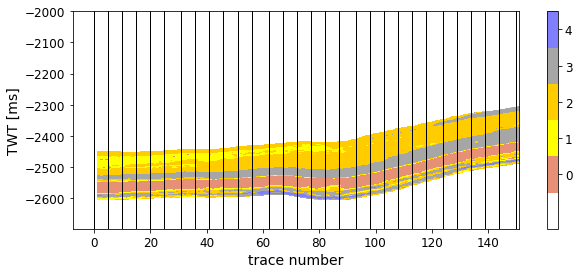

In [180]:
# Plot prediction
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_30)

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      4235
         1.0       0.73      0.64      0.68      2796
         2.0       0.85      0.89      0.87      9202
         3.0       0.85      0.88      0.87      5218
         4.0       0.72      0.61      0.66       507

    accuracy                           0.86     21958
   macro avg       0.82      0.79      0.81     21958
weighted avg       0.86      0.86      0.86     21958



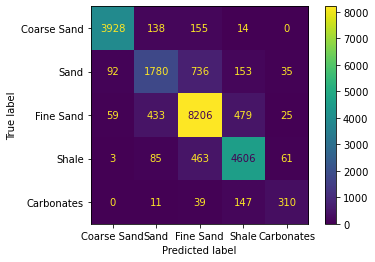

In [181]:
# Confusion matrix of 2D facies prediction (wells that were used for training are removed)
report_print_RF_30, f1_score_per_class_RF_30, count_facies, accuracy_test_RF_30  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_30, 
                                                                                                         facies_class=facies_class)

In [182]:
accuracy_test_RF_30

0.8575462246106202

#### Difference map

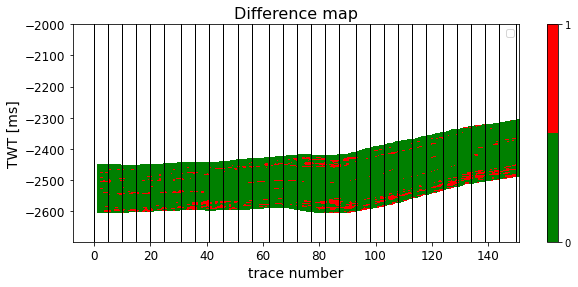

In [183]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_30)

The same algorithm is applied for 15, 10, 8, 6, 5, 4, 3, 2, and 1 wells

### Number of wells - 15

We need to remove 15 wells from the col. We will remove every 2nd well from the initial list

In [184]:
col_30 = col.copy()
col_30

# I will delete the first well that is equal to trace 0
col_15 = col_30[1::2]
len(col_15)

15

In [185]:
df_facies_wells = df_wells_from_section(df_facies, col_15)

# features
relai_std_wells = df_wells_from_section(df_relai_std, col_15)
seismic_std_wells = df_wells_from_section(df_seis_std, col_15)
seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_15)


In [186]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, seis_inv_std_wells]

facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies     relai      seis  seis_inv
448     2.0  0.067571  1.172467 -0.338762
449     2.0  0.214199  1.060955 -0.257138
450     2.0  0.342906  0.949443 -0.185448
451     2.0  0.451574  0.800760 -0.125082
452     2.0  0.538573  0.652078 -0.076728
..      ...       ...       ...       ...
489     3.0  1.392599 -2.024209  2.005714
490     3.0  1.080445 -2.247233  1.920986
491     4.0  0.738802 -2.470257  1.846121
492     4.0  0.374024 -2.656110  1.783819
493     4.0 -0.005091 -2.730451  1.739179

[2721 rows x 4 columns]

In [187]:
facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
448     2.0  0.067571  1.172467 -0.338762
449     2.0  0.214199  1.060955 -0.257138
450     2.0  0.342906  0.949443 -0.185448
451     2.0  0.451574  0.800760 -0.125082
452     2.0  0.538573  0.652078 -0.076728
..      ...       ...       ...       ...
489     3.0  1.392599 -2.024209  2.005714
490     3.0  1.080445 -2.247233  1.920986
491     4.0  0.738802 -2.470257  1.846121
492     4.0  0.374024 -2.656110  1.783819
493     4.0 -0.005091 -2.730451  1.739179

[2721 rows x 4 columns]

In [188]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [189]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [190]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [191]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[ 95   2   6   1   0]
 [  4  44  25   2   0]
 [  1   7 198  14   1]
 [  1   3  19 110   3]
 [  0   0   2   2   5]]
0.8293577981651377
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93       104
         1.0       0.79      0.59      0.67        75
         2.0       0.79      0.90      0.84       221
         3.0       0.85      0.81      0.83       136
         4.0       0.56      0.56      0.56         9

    accuracy                           0.83       545
   macro avg       0.79      0.75      0.77       545
weighted avg       0.83      0.83      0.83       545



In [192]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.8318056906100706


0.8318056906100706

In [193]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

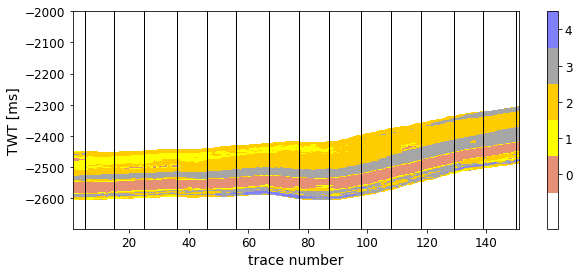

In [194]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_15)

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93      4760
         1.0       0.72      0.59      0.65      3158
         2.0       0.84      0.87      0.86     10327
         3.0       0.82      0.87      0.85      5853
         4.0       0.66      0.50      0.57       574

    accuracy                           0.84     24672
   macro avg       0.80      0.75      0.77     24672
weighted avg       0.84      0.84      0.84     24672



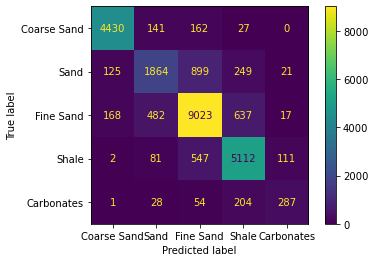

In [195]:
report_print_RF_15, f1_score_per_class_RF_15, count_facies, accuracy_test_RF_15  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_15, 
                                                                                                         facies_class=facies_class)

In [196]:
accuracy_test_RF_15

0.8396562905317769

#### Difference map

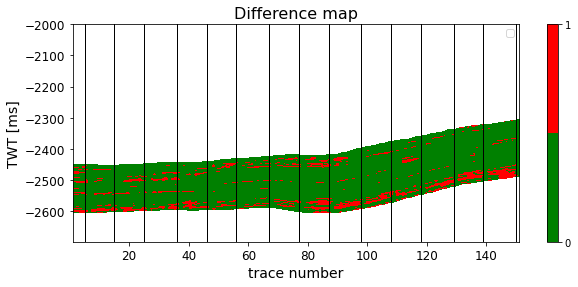

In [197]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_15)

In [198]:
accuracy_test_RF_15

0.8396562905317769

### Number of wells - 10

In [199]:
col_10 = col_30[1::3]
len(col_10)

10

In [200]:
df_facies_wells = df_wells_from_section(df_facies, col_10)
# features
relai_std_wells = df_wells_from_section(df_relai_std, col_10)
seismic_std_wells = df_wells_from_section(df_seis_std, col_10)
seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_10)


In [201]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, seis_inv_std_wells]

facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies     relai      seis  seis_inv
448     2.0  0.067571  1.172467 -0.338762
449     2.0  0.214199  1.060955 -0.257138
450     2.0  0.342906  0.949443 -0.185448
451     2.0  0.451574  0.800760 -0.125082
452     2.0  0.538573  0.652078 -0.076728
..      ...       ...       ...       ...
497     3.0  1.216483 -2.507427  2.137385
498     4.0  0.839812 -2.693280  2.092458
499     4.0  0.445872 -2.841963  2.062308
500     4.0  0.043622 -2.879134  1.473288
501     2.0 -0.356835 -2.879134  0.930187

[1812 rows x 4 columns]

In [202]:
facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
448     2.0  0.067571  1.172467 -0.338762
449     2.0  0.214199  1.060955 -0.257138
450     2.0  0.342906  0.949443 -0.185448
451     2.0  0.451574  0.800760 -0.125082
452     2.0  0.538573  0.652078 -0.076728
..      ...       ...       ...       ...
497     3.0  1.216483 -2.507427  2.137385
498     4.0  0.839812 -2.693280  2.092458
499     4.0  0.445872 -2.841963  2.062308
500     4.0  0.043622 -2.879134  1.473288
501     2.0 -0.356835 -2.879134  0.930187

[1812 rows x 4 columns]

In [203]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [204]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [205]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [206]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[ 59   1   2   1   0]
 [  1  23  17   6   1]
 [  6   9 126  16   1]
 [  0   0   9  73   1]
 [  0   0   0   4   7]]
0.7933884297520661
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91        63
         1.0       0.70      0.48      0.57        48
         2.0       0.82      0.80      0.81       158
         3.0       0.73      0.88      0.80        83
         4.0       0.70      0.64      0.67        11

    accuracy                           0.79       363
   macro avg       0.77      0.75      0.75       363
weighted avg       0.79      0.79      0.79       363



In [207]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.8205411877394637


0.8205411877394637

In [208]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

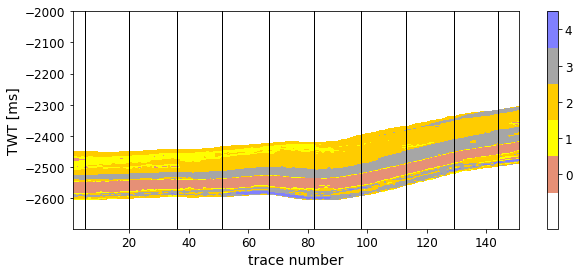

In [209]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_10)

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      4924
         1.0       0.71      0.55      0.62      3283
         2.0       0.82      0.87      0.85     10700
         3.0       0.82      0.85      0.83      6083
         4.0       0.60      0.51      0.56       591

    accuracy                           0.83     25581
   macro avg       0.78      0.74      0.76     25581
weighted avg       0.82      0.83      0.82     25581



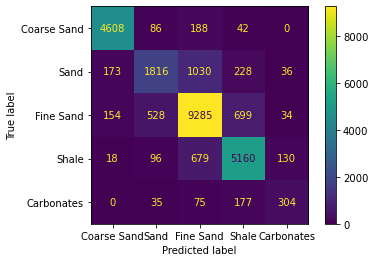

In [210]:
report_print_RF_10, f1_score_per_class_RF_10, count_facies, accuracy_test_RF_10  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_10, 
                                                                                                         facies_class=facies_class)

In [211]:
accuracy_test_RF_10

0.8276846096712404

#### Difference map

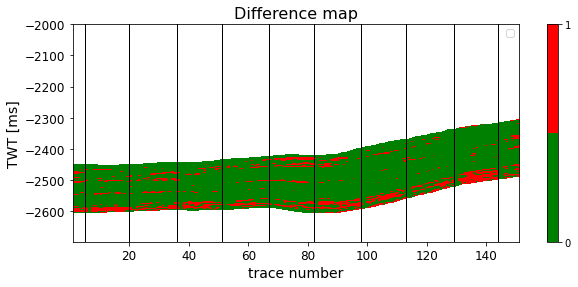

In [212]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_10)

In [213]:
accuracy_test_RF_10

0.8276846096712404

### Number of wells - 8

In [214]:
col_8 = col_30[1::4]
len(col_8)

8

In [215]:
df_facies_wells = df_wells_from_section(df_facies, col_8)
# features
relai_std_wells = df_wells_from_section(df_relai_std, col_8)
seismic_std_wells = df_wells_from_section(df_seis_std, col_8)
seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_8)


In [216]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, seis_inv_std_wells]

facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies     relai      seis  seis_inv
448     2.0  0.067571  1.172467 -0.338762
449     2.0  0.214199  1.060955 -0.257138
450     2.0  0.342906  0.949443 -0.185448
451     2.0  0.451574  0.800760 -0.125082
452     2.0  0.538573  0.652078 -0.076728
..      ...       ...       ...       ...
489     3.0  1.392599 -2.024209  2.005714
490     3.0  1.080445 -2.247233  1.920986
491     4.0  0.738802 -2.470257  1.846121
492     4.0  0.374024 -2.656110  1.783819
493     4.0 -0.005091 -2.730451  1.739179

[1447 rows x 4 columns]

In [217]:
facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
448     2.0  0.067571  1.172467 -0.338762
449     2.0  0.214199  1.060955 -0.257138
450     2.0  0.342906  0.949443 -0.185448
451     2.0  0.451574  0.800760 -0.125082
452     2.0  0.538573  0.652078 -0.076728
..      ...       ...       ...       ...
489     3.0  1.392599 -2.024209  2.005714
490     3.0  1.080445 -2.247233  1.920986
491     4.0  0.738802 -2.470257  1.846121
492     4.0  0.374024 -2.656110  1.783819
493     4.0 -0.005091 -2.730451  1.739179

[1447 rows x 4 columns]

In [218]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [219]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [220]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [221]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[54  1  4  0  0]
 [ 3 27 11  8  0]
 [ 1 10 75 13  2]
 [ 0  3 13 58  1]
 [ 0  0  0  2  4]]
0.7517241379310344
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92        59
         1.0       0.66      0.55      0.60        49
         2.0       0.73      0.74      0.74       101
         3.0       0.72      0.77      0.74        75
         4.0       0.57      0.67      0.62         6

    accuracy                           0.75       290
   macro avg       0.72      0.73      0.72       290
weighted avg       0.75      0.75      0.75       290



In [222]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.813343328335832


0.813343328335832

In [223]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

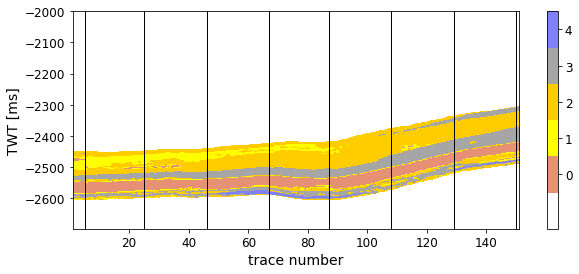

In [224]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_8)

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93      5001
         1.0       0.68      0.55      0.61      3307
         2.0       0.83      0.86      0.84     10877
         3.0       0.79      0.84      0.82      6160
         4.0       0.61      0.53      0.57       601

    accuracy                           0.82     25946
   macro avg       0.77      0.74      0.75     25946
weighted avg       0.82      0.82      0.82     25946



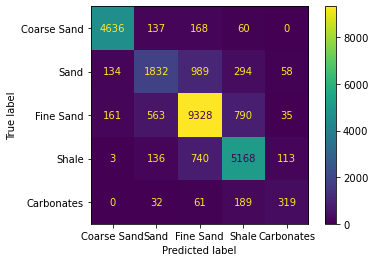

In [225]:
report_print_RF_8, f1_score_per_class_RF_8, count_facies, accuracy_test_RF_8  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_8, 
                                                                                                         facies_class=facies_class)

In [226]:
accuracy_test_RF_8

0.8202805827487859

#### Difference map

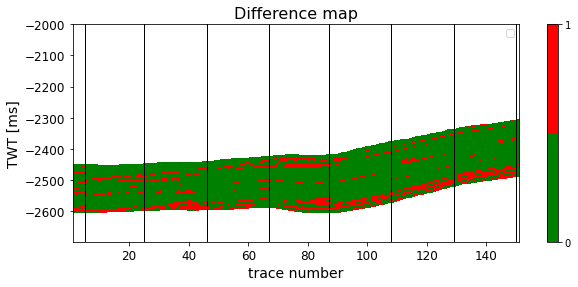

In [227]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_8)

### Number of wells - 6

In [228]:
col_6 = col_30[1::5]
len(col_6)

6

In [229]:
df_facies_wells = df_wells_from_section(df_facies, col_6)
# features

relai_std_wells = df_wells_from_section(df_relai_std, col_6)
seismic_std_wells = df_wells_from_section(df_seis_std, col_6)
seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_6)


In [230]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, seis_inv_std_wells]

facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies     relai      seis  seis_inv
448     2.0  0.067571  1.172467 -0.338762
449     2.0  0.214199  1.060955 -0.257138
450     2.0  0.342906  0.949443 -0.185448
451     2.0  0.451574  0.800760 -0.125082
452     2.0  0.538573  0.652078 -0.076728
..      ...       ...       ...       ...
510     2.0  0.710616 -2.061379  1.239041
511     2.0  0.412147 -2.172891  1.042958
512     4.0  0.103740 -2.247233  0.835316
513     4.0 -0.210044 -2.284403  0.614301
514     4.0 -0.522850 -2.284403  0.380288

[1085 rows x 4 columns]

In [231]:
facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
448     2.0  0.067571  1.172467 -0.338762
449     2.0  0.214199  1.060955 -0.257138
450     2.0  0.342906  0.949443 -0.185448
451     2.0  0.451574  0.800760 -0.125082
452     2.0  0.538573  0.652078 -0.076728
..      ...       ...       ...       ...
510     2.0  0.710616 -2.061379  1.239041
511     2.0  0.412147 -2.172891  1.042958
512     4.0  0.103740 -2.247233  0.835316
513     4.0 -0.210044 -2.284403  0.614301
514     4.0 -0.522850 -2.284403  0.380288

[1085 rows x 4 columns]

In [232]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [233]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [234]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [235]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[34  0  4  0  0]
 [ 2 16 11  5  1]
 [ 3  2 83  5  0]
 [ 1  0 11 33  1]
 [ 0  0  2  0  3]]
0.7788018433179723
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87        38
         1.0       0.89      0.46      0.60        35
         2.0       0.75      0.89      0.81        93
         3.0       0.77      0.72      0.74        46
         4.0       0.60      0.60      0.60         5

    accuracy                           0.78       217
   macro avg       0.77      0.71      0.73       217
weighted avg       0.79      0.78      0.77       217



In [236]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.7926089280940924


0.7926089280940924

In [237]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

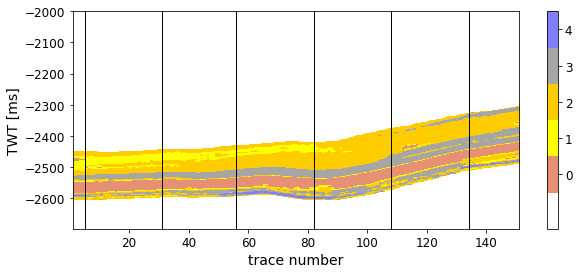

In [238]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_6)

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      5067
         1.0       0.69      0.56      0.62      3356
         2.0       0.80      0.87      0.83     11005
         3.0       0.81      0.80      0.80      6271
         4.0       0.63      0.46      0.53       609

    accuracy                           0.81     26308
   macro avg       0.77      0.72      0.74     26308
weighted avg       0.81      0.81      0.81     26308



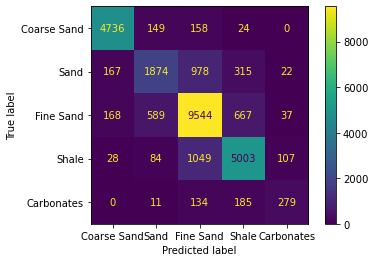

In [239]:
report_print_RF_6, f1_score_per_class_RF_6, count_facies, accuracy_test_RF_6  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_6, 
                                                                                                         facies_class=facies_class)

In [240]:
accuracy_test_RF_6

0.8148091835183214

#### Difference map

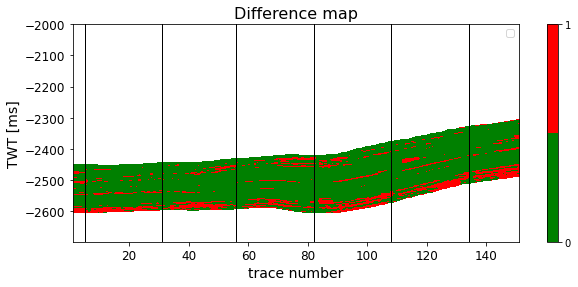

In [241]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_6)

In [242]:
accuracy_test_RF_6

0.8148091835183214

### Number of wells - 5

In [243]:
col_5 = col_30[1::6]
len(col_5)

5

In [244]:
df_facies_wells = df_wells_from_section(df_facies, col_5)
# features
relai_std_wells = df_wells_from_section(df_relai_std, col_5)
seismic_std_wells = df_wells_from_section(df_seis_std, col_5)
seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_5)


In [245]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, seis_inv_std_wells]

facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies     relai      seis  seis_inv
448     2.0  0.067571  1.172467 -0.338762
449     2.0  0.214199  1.060955 -0.257138
450     2.0  0.342906  0.949443 -0.185448
451     2.0  0.451574  0.800760 -0.125082
452     2.0  0.538573  0.652078 -0.076728
..      ...       ...       ...       ...
520     1.0  0.399928 -1.912697  0.910466
521     2.0  0.124105 -2.024209  0.714408
522     2.0 -0.162309 -2.098550  0.518217
523     1.0 -0.453609 -2.135721  0.322496
524     1.0 -0.743444 -2.135721  0.128748

[900 rows x 4 columns]

In [246]:
facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
448     2.0  0.067571  1.172467 -0.338762
449     2.0  0.214199  1.060955 -0.257138
450     2.0  0.342906  0.949443 -0.185448
451     2.0  0.451574  0.800760 -0.125082
452     2.0  0.538573  0.652078 -0.076728
..      ...       ...       ...       ...
520     1.0  0.399928 -1.912697  0.910466
521     2.0  0.124105 -2.024209  0.714408
522     2.0 -0.162309 -2.098550  0.518217
523     1.0 -0.453609 -2.135721  0.322496
524     1.0 -0.743444 -2.135721  0.128748

[900 rows x 4 columns]

In [247]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [248]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [249]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [250]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[34  1  1  0  0]
 [ 2 18  3  2  0]
 [ 0  4 64  7  0]
 [ 0  0  6 35  0]
 [ 0  0  0  2  1]]
0.8444444444444444
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        36
         1.0       0.78      0.72      0.75        25
         2.0       0.86      0.85      0.86        75
         3.0       0.76      0.85      0.80        41
         4.0       1.00      0.33      0.50         3

    accuracy                           0.84       180
   macro avg       0.87      0.74      0.77       180
weighted avg       0.85      0.84      0.84       180



In [251]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.8166666666666667


0.8166666666666667

In [252]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

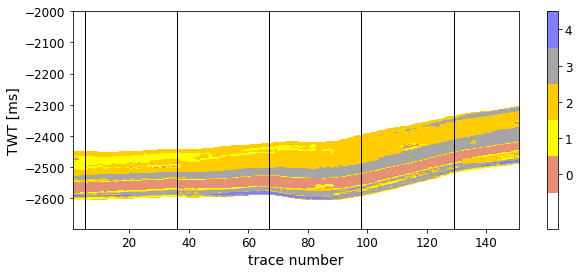

In [253]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_5)

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92      5101
         1.0       0.63      0.50      0.56      3383
         2.0       0.82      0.84      0.83     11081
         3.0       0.78      0.86      0.82      6319
         4.0       0.54      0.54      0.54       609

    accuracy                           0.81     26493
   macro avg       0.74      0.73      0.73     26493
weighted avg       0.80      0.81      0.80     26493



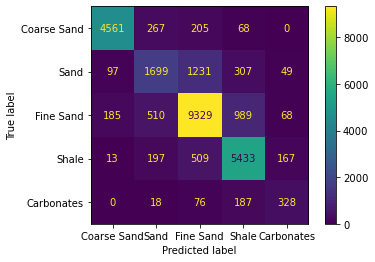

In [254]:
report_print_RF_5, f1_score_per_class_RF_5, count_facies, accuracy_test_RF_5  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_5, 
                                                                                                         facies_class=facies_class)

In [255]:
accuracy_test_RF_5

0.8058732495376137

#### Difference map

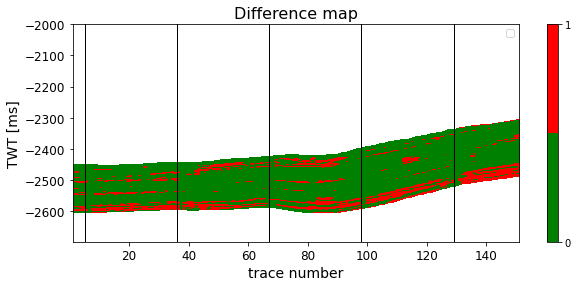

In [256]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_5)

### Number of wells - 4

In [257]:
col_4 = col_30[1::8]
len(col_4)

4

In [258]:
df_facies_wells = df_wells_from_section(df_facies, col_4)
# features
relai_std_wells = df_wells_from_section(df_relai_std, col_4)
seismic_std_wells = df_wells_from_section(df_seis_std, col_4)
seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_4)


In [259]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, seis_inv_std_wells]

facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies     relai      seis  seis_inv
448     2.0  0.067571  1.172467 -0.338762
449     2.0  0.214199  1.060955 -0.257138
450     2.0  0.342906  0.949443 -0.185448
451     2.0  0.451574  0.800760 -0.125082
452     2.0  0.538573  0.652078 -0.076728
..      ...       ...       ...       ...
520     1.0  0.399928 -1.912697  0.910466
521     2.0  0.124105 -2.024209  0.714408
522     2.0 -0.162309 -2.098550  0.518217
523     1.0 -0.453609 -2.135721  0.322496
524     1.0 -0.743444 -2.135721  0.128748

[715 rows x 4 columns]

In [260]:
facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
448     2.0  0.067571  1.172467 -0.338762
449     2.0  0.214199  1.060955 -0.257138
450     2.0  0.342906  0.949443 -0.185448
451     2.0  0.451574  0.800760 -0.125082
452     2.0  0.538573  0.652078 -0.076728
..      ...       ...       ...       ...
520     1.0  0.399928 -1.912697  0.910466
521     2.0  0.124105 -2.024209  0.714408
522     2.0 -0.162309 -2.098550  0.518217
523     1.0 -0.453609 -2.135721  0.322496
524     1.0 -0.743444 -2.135721  0.128748

[715 rows x 4 columns]

In [261]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [262]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [263]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [264]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[27  2  0  2  0]
 [ 0 15  3  2  0]
 [ 0  3 50  6  0]
 [ 0  0  3 27  1]
 [ 0  0  0  2  0]]
0.8321678321678322
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        31
         1.0       0.75      0.75      0.75        20
         2.0       0.89      0.85      0.87        59
         3.0       0.69      0.87      0.77        31
         4.0       0.00      0.00      0.00         2

    accuracy                           0.83       143
   macro avg       0.67      0.67      0.66       143
weighted avg       0.84      0.83      0.83       143



In [265]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.8235632183908047


0.8235632183908047

In [266]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

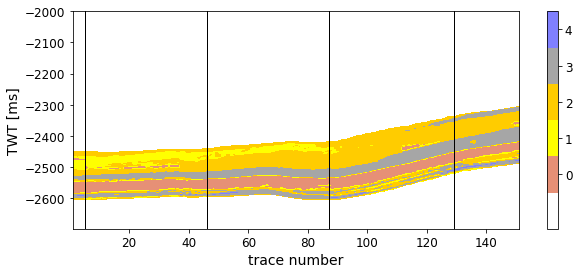

In [267]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_4)

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      5133
         1.0       0.58      0.54      0.56      3400
         2.0       0.82      0.83      0.82     11172
         3.0       0.77      0.82      0.79      6354
         4.0       0.60      0.21      0.31       619

    accuracy                           0.79     26678
   macro avg       0.74      0.66      0.68     26678
weighted avg       0.79      0.79      0.79     26678



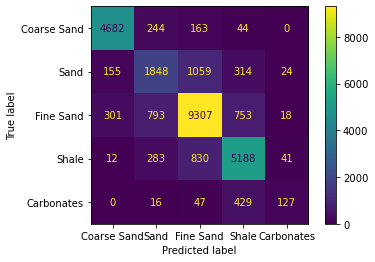

In [268]:
report_print_RF_4, f1_score_per_class_RF_4, count_facies, accuracy_test_RF_4  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_4, 
                                                                                                         facies_class=facies_class)

In [269]:
accuracy_test_RF_4

0.7928630332108854

#### Difference map

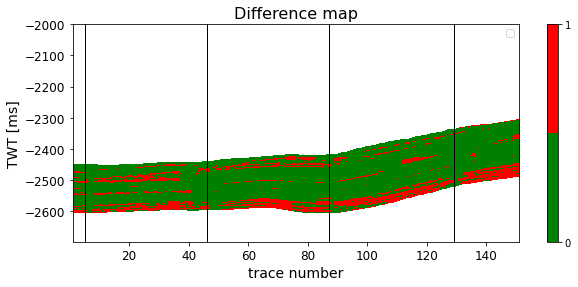

In [270]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_4)

### Number of wells - 3

In [271]:
col_3 = col_30[1::10]
len(col_3)

3

In [272]:
df_facies_wells = df_wells_from_section(df_facies, col_3)
# features
relai_std_wells = df_wells_from_section(df_relai_std, col_3)
seismic_std_wells = df_wells_from_section(df_seis_std, col_3)
seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_3)


In [273]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, seis_inv_std_wells]

facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies     relai      seis  seis_inv
448     2.0  0.067571  1.172467 -0.338762
449     2.0  0.214199  1.060955 -0.257138
450     2.0  0.342906  0.949443 -0.185448
451     2.0  0.451574  0.800760 -0.125082
452     2.0  0.538573  0.652078 -0.076728
..      ...       ...       ...       ...
571     2.0  1.006153 -1.764014  1.382892
572     2.0  0.721043 -2.061379  1.193970
573     3.0  0.404490 -2.321574  0.986958
574     2.0  0.068060 -2.470257  0.768348
575     1.0 -0.275212 -2.470257  0.544943

[537 rows x 4 columns]

In [274]:
facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
448     2.0  0.067571  1.172467 -0.338762
449     2.0  0.214199  1.060955 -0.257138
450     2.0  0.342906  0.949443 -0.185448
451     2.0  0.451574  0.800760 -0.125082
452     2.0  0.538573  0.652078 -0.076728
..      ...       ...       ...       ...
571     2.0  1.006153 -1.764014  1.382892
572     2.0  0.721043 -2.061379  1.193970
573     3.0  0.404490 -2.321574  0.986958
574     2.0  0.068060 -2.470257  0.768348
575     1.0 -0.275212 -2.470257  0.544943

[537 rows x 4 columns]

In [275]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [276]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [277]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [278]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[22  0  1  0]
 [ 0  8  2  2]
 [ 0  1 45  3]
 [ 0  0  3 21]]
0.8888888888888888
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        23
         1.0       0.89      0.67      0.76        12
         2.0       0.88      0.92      0.90        49
         3.0       0.81      0.88      0.84        24

    accuracy                           0.89       108
   macro avg       0.89      0.85      0.87       108
weighted avg       0.89      0.89      0.89       108



In [279]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.8365448504983387


0.8365448504983387

In [280]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

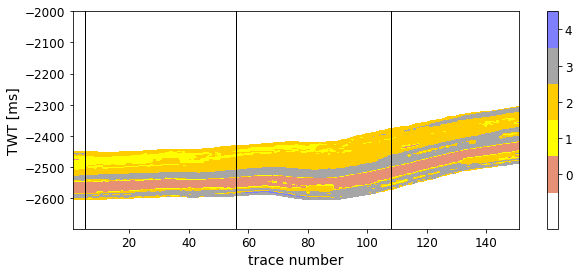

In [281]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      5171
         1.0       0.58      0.53      0.55      3429
         2.0       0.81      0.82      0.81     11240
         3.0       0.72      0.85      0.78      6390
         4.0       0.63      0.16      0.26       626

    accuracy                           0.78     26856
   macro avg       0.74      0.65      0.67     26856
weighted avg       0.78      0.78      0.78     26856



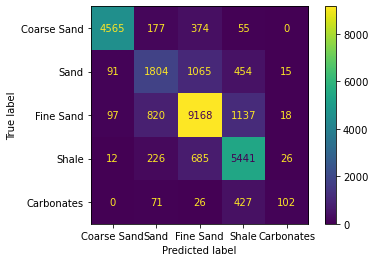

In [282]:
report_print_RF_3, f1_score_per_class_RF_3, count_facies, accuracy_test_RF_3  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

In [283]:
accuracy_test_RF_3

0.784927018170986

#### Difference map

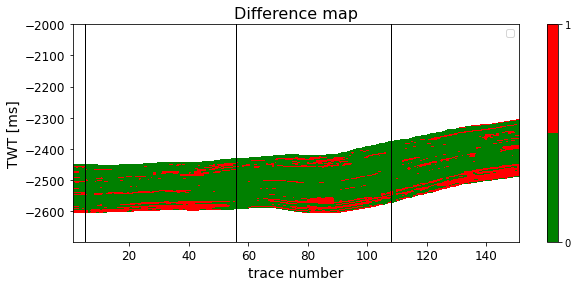

In [284]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

### Number of wells - 2

In [285]:
col_2 = col_30[1::15]
len(col_2)

2

In [286]:
col_2

[5, 82]

In [287]:
df_facies_wells = df_wells_from_section(df_facies, col_2)
# features
relai_std_wells = df_wells_from_section(df_relai_std, col_2)
seismic_std_wells = df_wells_from_section(df_seis_std, col_2)
seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_2)


In [288]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, seis_inv_std_wells]

facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies     relai      seis  seis_inv
448     2.0  0.067571  1.172467 -0.338762
449     2.0  0.214199  1.060955 -0.257138
450     2.0  0.342906  0.949443 -0.185448
451     2.0  0.451574  0.800760 -0.125082
452     2.0  0.538573  0.652078 -0.076728
..      ...       ...       ...       ...
605     2.0  1.400257 -3.325181  2.418063
606     2.0  0.900255 -3.622547  1.829903
607     2.0  0.378260 -3.771229  1.251363
608     2.0 -0.145691 -3.808400  0.698133
609     2.0 -0.652046 -3.659717  0.173630

[354 rows x 4 columns]

In [289]:
facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
448     2.0  0.067571  1.172467 -0.338762
449     2.0  0.214199  1.060955 -0.257138
450     2.0  0.342906  0.949443 -0.185448
451     2.0  0.451574  0.800760 -0.125082
452     2.0  0.538573  0.652078 -0.076728
..      ...       ...       ...       ...
605     2.0  1.400257 -3.325181  2.418063
606     2.0  0.900255 -3.622547  1.829903
607     2.0  0.378260 -3.771229  1.251363
608     2.0 -0.145691 -3.808400  0.698133
609     2.0 -0.652046 -3.659717  0.173630

[354 rows x 4 columns]

In [290]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [291]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [292]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [293]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[13  0  1  0  0]
 [ 0 11  4  3  0]
 [ 0  0 27  1  0]
 [ 0  0  1  7  0]
 [ 0  0  0  1  2]]
0.8450704225352113
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        14
         1.0       1.00      0.61      0.76        18
         2.0       0.82      0.96      0.89        28
         3.0       0.58      0.88      0.70         8
         4.0       1.00      0.67      0.80         3

    accuracy                           0.85        71
   macro avg       0.88      0.81      0.82        71
weighted avg       0.88      0.85      0.84        71



In [294]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.7950738916256157


0.7950738916256157

In [295]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

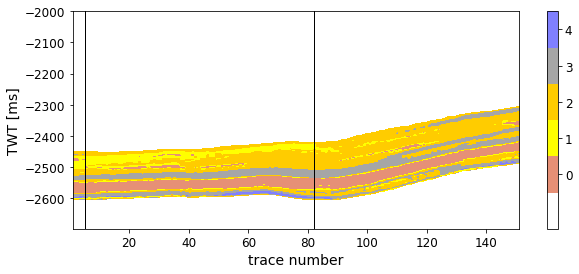

In [296]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_2)

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      5201
         1.0       0.58      0.48      0.53      3444
         2.0       0.75      0.81      0.78     11314
         3.0       0.76      0.70      0.73      6456
         4.0       0.42      0.32      0.37       624

    accuracy                           0.75     27039
   macro avg       0.67      0.64      0.66     27039
weighted avg       0.74      0.75      0.74     27039



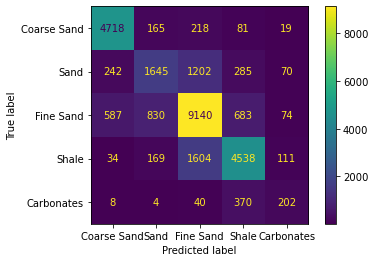

In [297]:
report_print_RF_2, f1_score_per_class_RF_2, count_facies, accuracy_test_RF_2  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_2, 
                                                                                                         facies_class=facies_class)

In [298]:
accuracy_test_RF_2

0.7486593439106476

#### Difference map

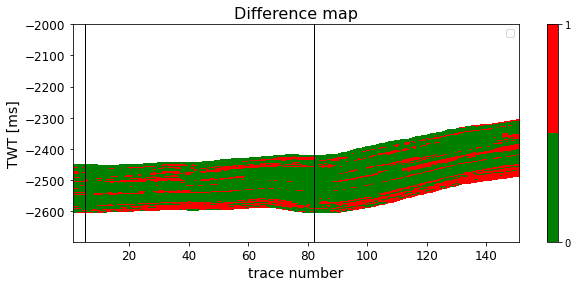

In [299]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_2)

### Number of wells - 1

In [300]:
col_1= col_30[1::60]
len(col_1)

1

In [301]:
# col_1 = [82]
col_1

[5]

In [302]:
df_facies_wells = df_wells_from_section(df_facies, col_1)
# features

relai_std_wells = df_wells_from_section(df_relai_std, col_1)
seismic_std_wells = df_wells_from_section(df_seis_std, col_1)
seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_1)


In [303]:
# Rename columns
relai_std_wells = relai_std_wells.rename(columns={5:'relai'})
seismic_std_wells = seismic_std_wells.rename(columns={5:'seis'})
seis_inv_std_wells = seis_inv_std_wells.rename(columns={5:'seis_inv'})
df_facies_wells = df_facies_wells.rename(columns={5:'facies'})

In [304]:
# create a list with features you want to add
feature_and_facies_1 = [ df_facies_wells,
                        relai_std_wells, 
                        seismic_std_wells,
                        seis_inv_std_wells
                        ]
len(feature_and_facies_1)

4

In [305]:
# Concatenate facies and features
feature_and_facies_1 = pd.concat(feature_and_facies_1, axis=1)
feature_and_facies_1 = feature_and_facies_1.dropna(axis=0)



In [306]:
feature_and_facies_1

facies     relai      seis  seis_inv
448     2.0  0.067571  1.172467 -0.338762
449     2.0  0.214199  1.060955 -0.257138
450     2.0  0.342906  0.949443 -0.185448
451     2.0  0.451574  0.800760 -0.125082
452     2.0  0.538573  0.652078 -0.076728
..      ...       ...       ...       ...
604     1.0  0.742549 -1.578161  1.017220
605     1.0  0.509899 -1.652502  0.843304
606     1.0  0.270244 -1.726844  0.660499
607     3.0  0.025538 -1.764014  0.470320
608     3.0 -0.221449 -1.764014  0.274854

[161 rows x 4 columns]

In [307]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

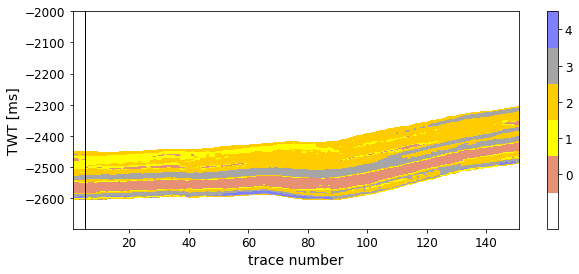

In [308]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_1)

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      5237
         1.0       0.59      0.48      0.53      3467
         2.0       0.75      0.81      0.78     11406
         3.0       0.76      0.70      0.73      6492
         4.0       0.43      0.33      0.37       630

    accuracy                           0.75     27232
   macro avg       0.68      0.65      0.66     27232
weighted avg       0.74      0.75      0.75     27232



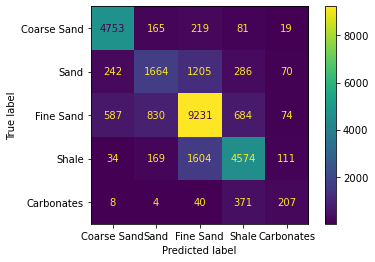

In [309]:
report_print_RF_1, f1_score_per_class_RF_1, count_facies, accuracy_test_RF_1  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_1, 
                                                                                                         facies_class=facies_class)

In [310]:
accuracy_test_RF_1

0.750183607520564

#### Difference map

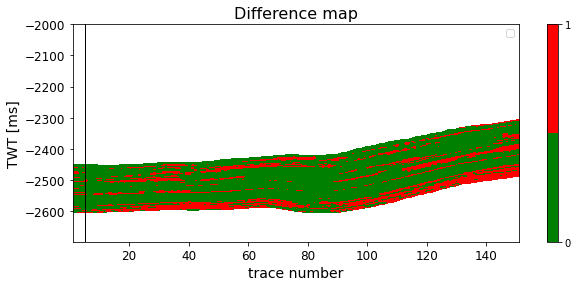

In [311]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_1)

### Compare accuracies (global f1-score)

In [312]:
accuracy_score_all = [accuracy_test_RF_30, 
                      accuracy_test_RF_15, 
                      accuracy_test_RF_10, 
                      accuracy_test_RF_8, 
                      accuracy_test_RF_6,  
                      accuracy_test_RF_5, 
                      accuracy_test_RF_3, 
                      accuracy_test_RF_2,
                      accuracy_test_RF_1
                      ]


In [313]:
accuracy_score_all_100 = [i*100 for i in accuracy_score_all]

In [314]:
accuracy_score_all_100

[85.75462246106203,
 83.9656290531777,
 82.76846096712404,
 82.02805827487859,
 81.48091835183214,
 80.58732495376137,
 78.49270181709859,
 74.86593439106476,
 75.0183607520564]

Choose the number of wells

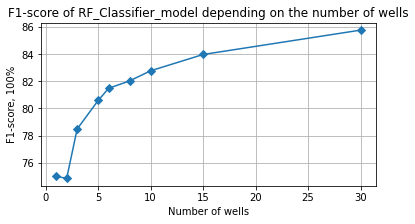

In [315]:
number_of_wells = [30, 15, 10, 8, 6, 5, 3, 2, 1]
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(number_of_wells, accuracy_score_all_100, marker='D')
ax.set_title('F1-score of RF_Classifier_model depending on the number of wells')
ax.set_xlabel('Number of wells')
ax.set_ylabel('F1-score, 100%')
plt.grid()
plt.show()

#### So, we can use 3 wells, since the accuracy is higher 75%. However, even when we use 1 well, the f1-score is almost 75%.

# ML models 3 wells

Here we will test five ML models for facies prediction for 3 wells

In [316]:
col_3 = col_30[1::10]
len(col_3)
col_3


[5, 56, 108]

## Use RelAI, Seismic, Seis_Inv

### Logistic Regression

In [317]:
df_facies_wells = df_wells_from_section(df_facies, col_3)
# features
relai_std_wells = df_wells_from_section(df_relai_std, col_3)
seismic_std_wells = df_wells_from_section(df_seis_std, col_3)
seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_3)


In [318]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, seis_inv_std_wells]

In [319]:
# Logistic Regression
facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

# facies_and_features = concat_facies_features(df_facies_wells, feature_list_all)
facies_and_features = facies_features_3.copy()
facies_and_features


facies     relai      seis  seis_inv
448     2.0  0.067571  1.172467 -0.338762
449     2.0  0.214199  1.060955 -0.257138
450     2.0  0.342906  0.949443 -0.185448
451     2.0  0.451574  0.800760 -0.125082
452     2.0  0.538573  0.652078 -0.076728
..      ...       ...       ...       ...
571     2.0  1.006153 -1.764014  1.382892
572     2.0  0.721043 -2.061379  1.193970
573     3.0  0.404490 -2.321574  0.986958
574     2.0  0.068060 -2.470257  0.768348
575     1.0 -0.275212 -2.470257  0.544943

[537 rows x 4 columns]

In [320]:
facies_and_features['facies'].value_counts()

2.0    215
3.0    129
0.0    105
1.0     82
4.0      6
Name: facies, dtype: int64

In [321]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [322]:
model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)

LogisticRegression()

In [323]:
test_predict = model_LR.predict(x_test)

# metrics.confusion_matrix(y_test.values.flatten(), test_predict)
print(pd.crosstab(y_test.values.flatten(), test_predict))
print(classification_report(y_test.values.flatten(), test_predict))

col_0  0.0  2.0  3.0
row_0               
0.0     18    4    1
1.0      0   10    2
2.0      0   46    3
3.0      0   13   11
              precision    recall  f1-score   support

         0.0       1.00      0.78      0.88        23
         1.0       0.00      0.00      0.00        12
         2.0       0.63      0.94      0.75        49
         3.0       0.65      0.46      0.54        24

    accuracy                           0.69       108
   macro avg       0.57      0.54      0.54       108
weighted avg       0.64      0.69      0.65       108



In [324]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                            relai=df_relai_std, 
                                            seis=df_seis_std, 
                                            seis_inv=df_seis_inv_std, 
                                            model=model_LR)
facies_pred

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [325]:
accuracy_score_LR_validation = accuracy_score_cv(estimator=model_LR, X=x_train, y=y_train, cv=10)
accuracy_score_LR_validation

accuracy:  0.6760797342192693


0.6760797342192693

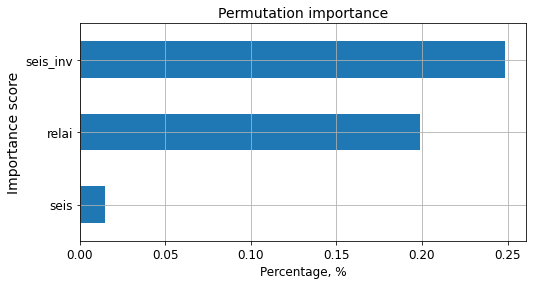

In [326]:
from machine_learning import feature_importance_plot
feature_importance_plot(model_LR, x_train, y_train, random_state=50)

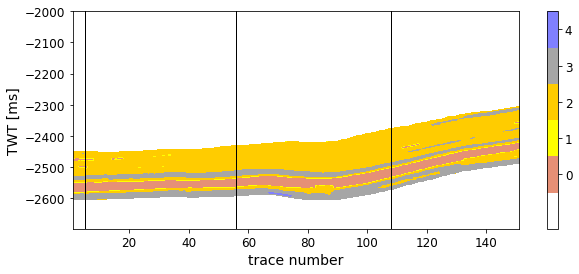

In [327]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies,  color_map='facies', number_of_facies=5, list_of_wells=col_3)

In [328]:
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale', 'Carbonate']

              precision    recall  f1-score   support

         0.0       0.93      0.79      0.86      5171
         1.0       0.00      0.00      0.00      3429
         2.0       0.61      0.89      0.72     11240
         3.0       0.62      0.58      0.60      6390
         4.0       0.98      0.07      0.13       626

    accuracy                           0.66     26856
   macro avg       0.63      0.47      0.46     26856
weighted avg       0.60      0.66      0.61     26856



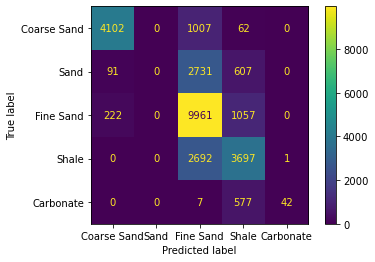

In [329]:
report_print_LR, f1_score_per_class_LR, count_facies, accuracy_test_LR  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                   facies_pred, 
                                                                                                   col_number=col_3, 
                                                                                                   facies_class=facies_class)

report_print_LR_3, f1_score_per_class_LR_3, count_facies, accuracy_test_LR_3 = report_print_LR, f1_score_per_class_LR, count_facies, accuracy_test_LR

In [330]:
accuracy_test_LR

0.6628686327077749

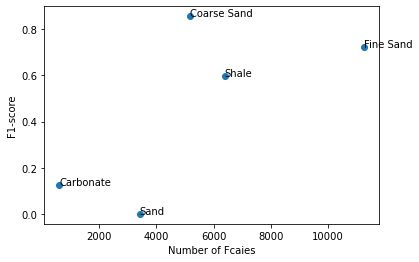

In [331]:
# Plot number of facies VS F1_score
facies_class = ['Coarse Sand', 'Sand', 'Fine Sand', 'Shale', 'Carbonate']
fig, ax = plt.subplots()
ax.scatter(count_facies, f1_score_per_class_LR)

for i, txt in enumerate(facies_class):
    ax.annotate(txt, (count_facies[i], f1_score_per_class_LR[i]))
    
plt.ylabel('F1-score')
plt.xlabel('Number of Fcaies')
plt.show()

In [332]:
f1_score_per_class_LR_ = f1_score_per_class_LR.tolist()
f1_score_per_class_LR_

[0.8558314208220321,
 0.0,
 0.7208191620233013,
 0.5967715899919289,
 0.1255605381165919]

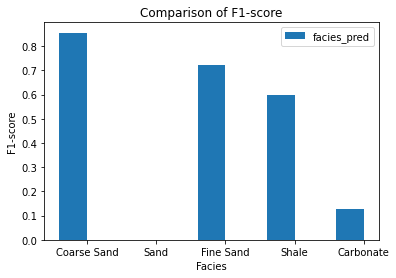

In [333]:
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale', 'Carbonate']
facies_pred = f1_score_per_class_LR_
#facies_actual = fg
  
X_axis = np.arange(len(facies_class))
  
plt.bar(X_axis - 0.2, facies_pred, 0.4, label = 'facies_pred')
#plt.bar(X_axis + 0.2, facies_actual, 0.4, label = 'facies_actual')
  
plt.xticks(X_axis, facies_class)
plt.xlabel("Facies")
plt.ylabel("F1-score")
plt.title("Comparison of F1-score")
plt.legend()
plt.show()

The Logistic Regression failed to predict Sand facies

### K-Nearest Neighbor, KNN

In [334]:
# K-Nearest Neighbor, KNN

model_KNN = neighbors.KNeighborsClassifier()
model_KNN.fit(x_train, y_train)

test_predict = model_KNN.predict(x_test)

In [335]:
metrics.confusion_matrix(y_test.values.flatten(), test_predict)
# x=y2_test, y=facies_predict,

print(pd.crosstab(y_test.values.flatten(), test_predict))

print(classification_report(y_test.values.flatten(), test_predict))

col_0  0.0  1.0  2.0  3.0
row_0                    
0.0     23    0    0    0
1.0      0    9    3    0
2.0      0    4   42    3
3.0      1    0    4   19
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        23
         1.0       0.69      0.75      0.72        12
         2.0       0.86      0.86      0.86        49
         3.0       0.86      0.79      0.83        24

    accuracy                           0.86       108
   macro avg       0.84      0.85      0.85       108
weighted avg       0.86      0.86      0.86       108



In [336]:
accuracy_score_KNN = accuracy_score_cv(estimator=model_KNN, X=x_train, y=y_train, cv=10)
accuracy_score_KNN

accuracy:  0.8389811738648948


0.8389811738648948

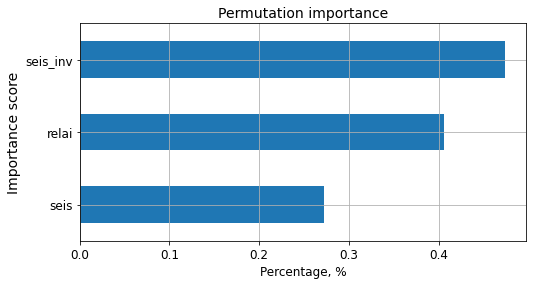

In [337]:
feature_importance_plot(model_KNN, x_train, y_train, random_state=50)

In [338]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=model_KNN)

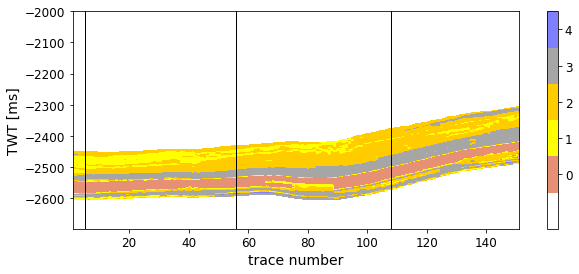

In [339]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.92      0.87      0.90      5171
         1.0       0.49      0.60      0.54      3429
         2.0       0.82      0.76      0.79     11240
         3.0       0.77      0.86      0.81      6390
         4.0       0.56      0.15      0.23       626

    accuracy                           0.77     26856
   macro avg       0.71      0.65      0.65     26856
weighted avg       0.78      0.77      0.77     26856



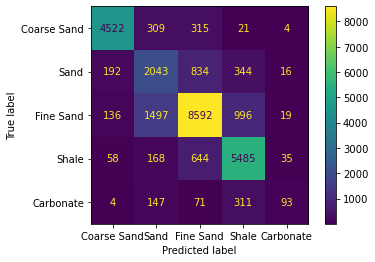

In [340]:
report_print_KNN, f1_score_per_class_KNN, count_facies, accuracy_test_KNN  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

report_print_KNN_3, f1_score_per_class_KNN_3, count_facies, accuracy_test_KNN_3 = report_print_KNN, f1_score_per_class_KNN, count_facies, accuracy_test_KNN

In [341]:
accuracy_test_KNN

0.77208072683944

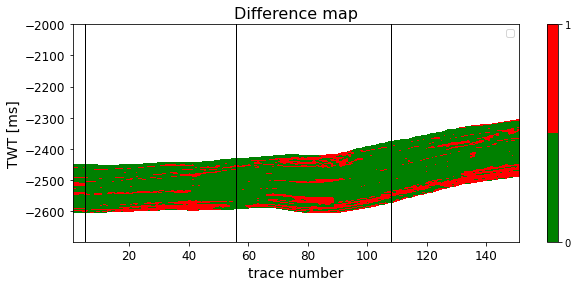

In [342]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

### Support Vector Machines

In [343]:
model_SVM = SVC()
model_SVM.fit(x_train, y_train)
test_predict = model_SVM.predict(x_test)

In [344]:
metrics.confusion_matrix(y_test.values.flatten(), test_predict)
# x=y2_test, y=facies_predict,

print(pd.crosstab(y_test.values.flatten(), test_predict))

print(classification_report(y_test.values.flatten(), test_predict))

col_0  0.0  1.0  2.0  3.0
row_0                    
0.0     21    1    0    1
1.0      0    6    4    2
2.0      0    0   45    4
3.0      0    1    0   23
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        23
         1.0       0.75      0.50      0.60        12
         2.0       0.92      0.92      0.92        49
         3.0       0.77      0.96      0.85        24

    accuracy                           0.88       108
   macro avg       0.86      0.82      0.83       108
weighted avg       0.88      0.88      0.88       108



In [345]:
accuracy_score_SVM = accuracy_score_cv(estimator=model_SVM, X=x_train, y=y_train, cv=10)
accuracy_score_SVM

accuracy:  0.771483942414175


0.771483942414175

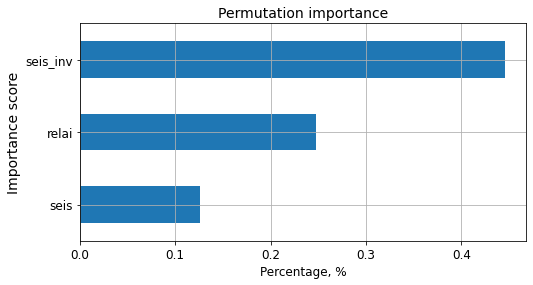

In [346]:
feature_importance_plot(model_SVM, x_train, y_train, random_state=50)

In [347]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=model_SVM)

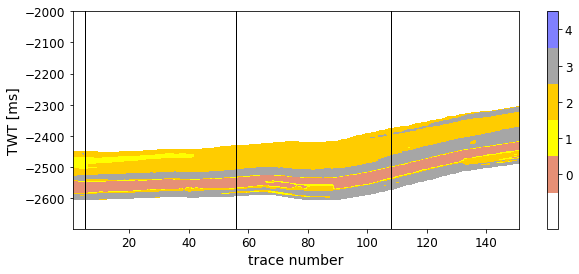

In [348]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92      5171
         1.0       0.55      0.24      0.34      3429
         2.0       0.78      0.84      0.81     11240
         3.0       0.68      0.91      0.78      6390
         4.0       0.82      0.04      0.08       626

    accuracy                           0.77     26856
   macro avg       0.76      0.58      0.59     26856
weighted avg       0.76      0.77      0.75     26856



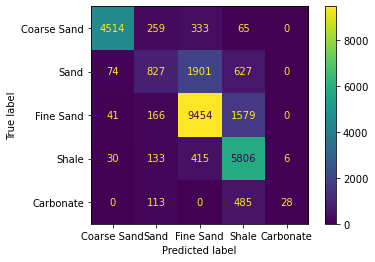

In [349]:
report_print_SVM, f1_score_per_class_SVM, count_facies, accuracy_test_SVM  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

report_print_SVM_3, f1_score_per_class_SVM_3, count_facies, accuracy_test_SVM_3 = report_print_SVM, f1_score_per_class_SVM, count_facies, accuracy_test_SVM

In [350]:
accuracy_test_SVM

0.7681337503723563

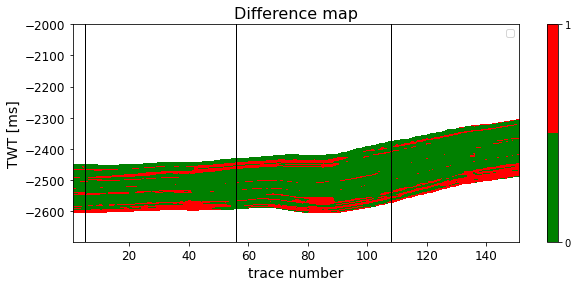

In [351]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

### Random Forest classification

In [352]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [353]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [354]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [355]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[23  0  0  0]
 [ 0  8  2  2]
 [ 0  1 46  2]
 [ 1  0  2 21]]
0.9074074074074074
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        23
         1.0       0.89      0.67      0.76        12
         2.0       0.92      0.94      0.93        49
         3.0       0.84      0.88      0.86        24

    accuracy                           0.91       108
   macro avg       0.90      0.87      0.88       108
weighted avg       0.91      0.91      0.91       108



In [356]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.831893687707641


0.831893687707641

In [357]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std, 
                                                                  model=RF_Classifier_model)

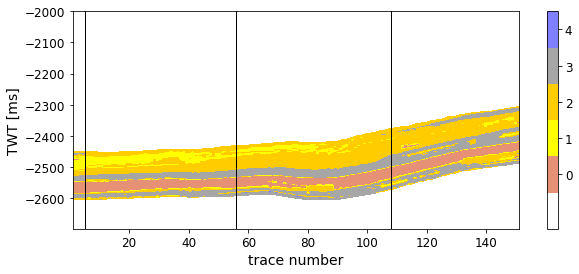

In [358]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92      5171
         1.0       0.59      0.54      0.56      3429
         2.0       0.81      0.82      0.81     11240
         3.0       0.73      0.84      0.78      6390
         4.0       0.57      0.14      0.22       626

    accuracy                           0.79     26856
   macro avg       0.73      0.65      0.66     26856
weighted avg       0.78      0.79      0.78     26856



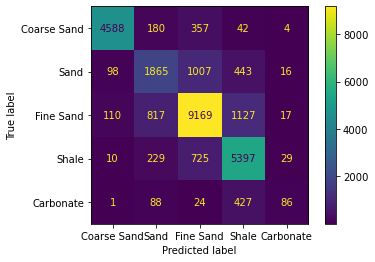

In [359]:
report_print_RF, f1_score_per_class_RF, count_facies, accuracy_test_RF  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

report_print_RF_3, f1_score_per_class_RF_3, count_facies, accuracy_test_RF_3 = report_print_RF, f1_score_per_class_RF, count_facies, accuracy_test_RF

In [360]:
accuracy_test_RF

0.785857908847185

#### Difference map

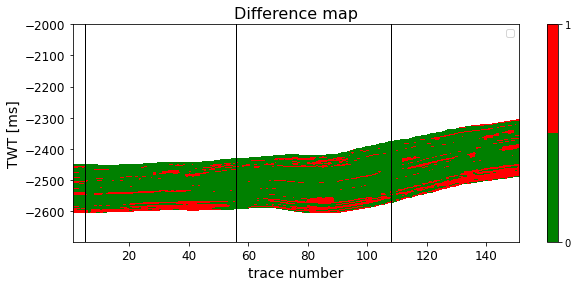

In [361]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

In [362]:
col_3

[5, 56, 108]

### Neural Network

In [363]:
facies_and_features_NN = facies_and_features[['facies', 'relai', 'seis', 'seis_inv']]
facies_and_features_NN

facies     relai      seis  seis_inv
448     2.0  0.067571  1.172467 -0.338762
449     2.0  0.214199  1.060955 -0.257138
450     2.0  0.342906  0.949443 -0.185448
451     2.0  0.451574  0.800760 -0.125082
452     2.0  0.538573  0.652078 -0.076728
..      ...       ...       ...       ...
571     2.0  1.006153 -1.764014  1.382892
572     2.0  0.721043 -2.061379  1.193970
573     3.0  0.404490 -2.321574  0.986958
574     2.0  0.068060 -2.470257  0.768348
575     1.0 -0.275212 -2.470257  0.544943

[537 rows x 4 columns]

In [364]:
tf.random.set_seed(123) 
tf.debugging.set_log_device_placement(False)

#### Split the data on train, test and validation

In [365]:
facies_and_features_mixed = facies_and_features_NN.sample(frac=1) # shuffle the rows
facies_and_features_mixed.head(5)

facies     relai      seis  seis_inv
469     3.0  0.290609 -0.091335  0.525760
512     3.0  0.896671  0.466224  0.765013
531     3.0  0.043785 -1.429479  0.018287
510     2.0 -0.445301  0.503395 -0.623637
535     3.0  1.071158 -0.388701  0.443237

In [366]:
train_set, test_set = train_test_split(facies_and_features_mixed, test_size=0.4)

print(train_set.shape)
print(test_set.shape)

(322, 4)
(215, 4)


In [367]:
train_set

facies     relai      seis  seis_inv
567     0.0 -1.232041 -0.128506 -1.471538
498     2.0 -0.588833  0.763590 -0.414548
391     3.0  0.621336  0.168859  0.285907
534     0.0 -0.574496 -1.429479 -0.485369
580     1.0  2.441641  1.544173  2.660944
..      ...       ...       ...       ...
497     3.0  0.105043 -1.429479 -0.128427
586     2.0  1.249882  2.324756  1.436206
457     2.0  0.013156  0.800760  0.111577
567     1.0 -0.439761  1.544173 -0.008942
475     1.0 -0.638035 -0.054165 -0.984110

[322 rows x 4 columns]

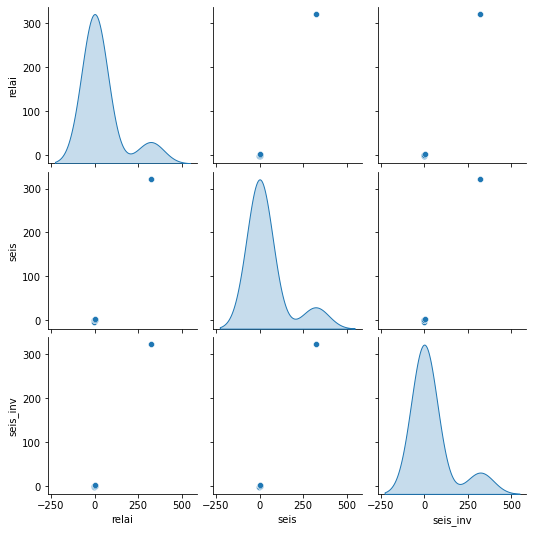

In [368]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = train_set.describe()
train_stats.pop('facies')
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

In [369]:
# Statistics on the train dataset to make sure it is in a good shape. (you may display the same stat for test and validate)
train_stats = train_set.describe()
train_stats.pop("facies")
train_stats = train_stats.transpose()
train_stats

count      mean       std       min       25%       50%       75%  \
relai     322.0  0.020130  0.958082 -1.979681 -0.574740 -0.095430  0.535152   
seis      322.0  0.067506  0.954273 -3.548205 -0.425871  0.094518  0.614907   
seis_inv  322.0 -0.065740  1.003202 -1.515371 -0.670928 -0.318743  0.525567   

               max  
relai     3.005018  
seis      2.399098  
seis_inv  3.098785

In [370]:
# Delete facies column
train_labels1 = train_set.pop('facies')
test_labels1 = test_set.pop('facies')
# valid_labels1 = val_set.pop('facies')

In [371]:
train_set

relai      seis  seis_inv
567 -1.232041 -0.128506 -1.471538
498 -0.588833  0.763590 -0.414548
391  0.621336  0.168859  0.285907
534 -0.574496 -1.429479 -0.485369
580  2.441641  1.544173  2.660944
..        ...       ...       ...
497  0.105043 -1.429479 -0.128427
586  1.249882  2.324756  1.436206
457  0.013156  0.800760  0.111577
567 -0.439761  1.544173 -0.008942
475 -0.638035 -0.054165 -0.984110

[322 rows x 3 columns]

In [372]:
train_labels2 = train_labels1.astype(np.uint8)
train_labels2

# valid_labels2 = valid_labels1.astype(np.uint8)
test_labels2 = test_labels1.astype(np.uint8)

In [373]:
# Encode the labeles
train_labels = pd.get_dummies(train_labels1, prefix='Label')
# val_labels = pd.get_dummies(valid_labels1, prefix='Label')
test_labels = pd.get_dummies(test_labels1, prefix='Label')



In [374]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 567 to 475
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Label_0.0  322 non-null    uint8
 1   Label_1.0  322 non-null    uint8
 2   Label_2.0  322 non-null    uint8
 3   Label_3.0  322 non-null    uint8
 4   Label_4.0  322 non-null    uint8
dtypes: uint8(5)
memory usage: 4.1 KB


The data is already standartized

Build NN

In [375]:
def NN_model():
    model=Sequential()
    # model.add(InputLayer(input_shape=(train_set.shape[1])))
    model.add(Dense(5, input_shape=(train_set.shape[1],)))   
    # model.add(Dropout(0.1))
    model.add(Dense(5, activation='sigmoid'))                  #input layer
    # model.add(Dropout(0.7))                                       # drop out layer for regularization
    # model.add(Dense(50, activation='softmax'))                      # hidden layer 1
    #model.add(Dense(36, activation='softmax')) 
    # model.add(Dense(5, activation='softmax'))                     # hidden layer 2
    model.add(Dense(5, activation='softmax'))                                              # output layer
    # model=Sequential()
    # model.add(Dense(36, input_shape=(train_set.shape[1],)))
    # model.add(Dense(5, activation='sigmoid'))

    learning_rate = 0.001
    optimizer = optimizers.Adam(learning_rate)

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model
    
Epochs = 400
Batch_size = 5

model = NN_model()
print('Here is a summary of this model: ')
model.summary()

with tf.device('/CPU:0'):
    history = model.fit(
        train_set,
        train_labels,
        batch_size=Batch_size,
        epochs=Epochs,
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(train_set.shape[0]/Batch_size),
        validation_data = (test_set, test_labels))



Here is a summary of this model: 
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 5)                 20        
                                                                 
 dense_34 (Dense)            (None, 5)                 30        
                                                                 
 dense_35 (Dense)            (None, 5)                 30        
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
64/64 [==============================] - 1s 7ms/step - loss: 1.5977 - accuracy: 0.3656 - val_loss: 1.5446 - val_accuracy: 0.4186
Epoch 2/400
64/64 [==============================] - 0s 3ms/step - loss: 1.5451 - accuracy: 0.3817 - val_loss: 1.4791 - val_accuracy: 0.4233
Epoch

In [376]:
print('summary of the results after each epoch: ')
hist_res = pd.DataFrame(history.history)
hist_res['epoch'] = history.epoch
hist_res.tail(10)

summary of the results after each epoch: 


loss  accuracy  val_loss  val_accuracy  epoch
390  0.553211  0.796875  0.603007      0.786047    390
391  0.549045  0.801262  0.603474      0.786047    391
392  0.556635  0.804416  0.602242      0.786047    392
393  0.547865  0.801262  0.602147      0.786047    393
394  0.548379  0.798107  0.606089      0.781395    394
395  0.561613  0.801262  0.601301      0.786047    395
396  0.532120  0.798107  0.603494      0.781395    396
397  0.556560  0.813880  0.602288      0.790698    397
398  0.551520  0.785489  0.603473      0.790698    398
399  0.524725  0.813880  0.604535      0.786047    399

#### Accuracy for the training and validation set

In [377]:
# from matplotlib import pyplot as plt

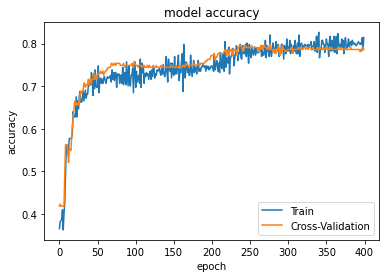

In [378]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()

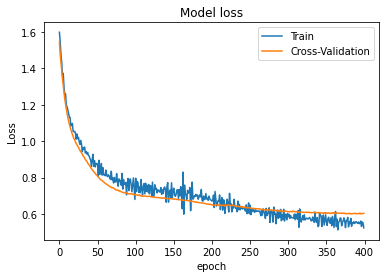

In [379]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

**Activation:**
Use Sigmoid: it didn't improve the results at all compared with Softmax. 

Relu and Tanh showed bad results

**Optimizer**
Using Adam optimizer is better that SGD

In [380]:
nn_test_prob = model.predict(test_set)
nn_test_prob.shape

7/7 [==============================] - 0s 1ms/step


(215, 5)

In [381]:
test_nn2 = np.array(pd.DataFrame(nn_test_prob).idxmax(axis=1))
test_nn2.shape

(215,)

In [382]:
print(confusion_matrix(test_labels1, test_nn2))
print(accuracy_score(test_labels1, test_nn2))
print(classification_report(test_labels1, test_nn2))

[[37  0  0  1  0]
 [ 0  6 17  7  0]
 [ 0  4 78  8  0]
 [ 0  0  7 48  0]
 [ 0  0  0  2  0]]
0.786046511627907
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        38
         1.0       0.60      0.20      0.30        30
         2.0       0.76      0.87      0.81        90
         3.0       0.73      0.87      0.79        55
         4.0       0.00      0.00      0.00         2

    accuracy                           0.79       215
   macro avg       0.62      0.58      0.58       215
weighted avg       0.77      0.79      0.76       215



#### Facies section prediction

In [383]:
r, c = np.shape(df_facies)
map_facies = np.zeros((r, c))
df_f_comparison = map_facies.copy()
df_f_comparison[:] = np.NaN
map_facies_1 = map_facies.copy()
map_facies_1[:] = np.NaN
empty_list = []

map_facies_2 = np.zeros((r, c))
map_facies_2[:] = np.NaN

map_facies_encoded = np.zeros((r, 5))
map_facies_encoded[:] = np.NaN


facies_encoded = map_facies_encoded.copy()

map_facies.shape

# for every trace (column)
for every_col in range(len(df_facies.columns)):
    new_df = pd.concat([df_relai_std.iloc[:,every_col], 
                        df_seis_std.iloc[:,every_col],
                        df_seis_inv_std.iloc[:,every_col]]
                        , axis=1)
    
    
    new_df_1 = new_df.dropna(axis=0)
    non_empty_facies = df_facies.iloc[:,every_col].dropna(axis=0)
    facies_encoded[new_df_1.index, :] = model.predict(new_df_1)
    
    facies_encoded_nn = np.array(pd.DataFrame(facies_encoded).idxmax(axis=1))
    # empty_list.append(facies_encoded_nn)
    facies_encoded_nn_1 = facies_encoded_nn.reshape(facies_encoded_nn.shape[0], -1)
    
    # Filter 
    map_facies_1[new_df_1.index, every_col] = facies_encoded_nn_1[new_df_1.index, 0]
    df_f_comparison[new_df_1.index, every_col] = df_facies.iloc[new_df_1.index, every_col]
    
    
        # Filter 
    map_facies_2[non_empty_facies.index, every_col] = map_facies_1[non_empty_facies.index, every_col]
    #df_f_comparison[new_df_1.index, every_col] = df_f_copy.iloc[new_df_1.index, every_col]
    

df_f_comparison


6/6 [==============================] - 0s 1ms/step


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

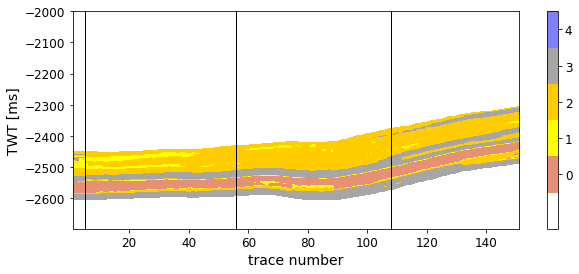

In [384]:
# Plot 2D facies section
plot_2D_section(data_file=map_facies_2.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      5171
         1.0       0.57      0.23      0.33      3429
         2.0       0.74      0.82      0.78     11240
         3.0       0.64      0.82      0.72      6390
         4.0       0.00      0.00      0.00       626

    accuracy                           0.74     26856
   macro avg       0.58      0.55      0.55     26856
weighted avg       0.72      0.74      0.72     26856



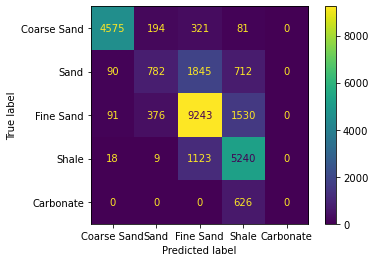

In [385]:
# Confusion matrix of 2D section (wells used for trainign are removed)
report_print_NN, f1_score_per_class_NN, count_facies, accuracy_test_NN  = confusion_matrix_prediction(df_f_comparison, 
                                                                                                         map_facies_2, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

report_print_NN_3, f1_score_per_class_NN_3, count_facies, accuracy_test_NN_3 = report_print_NN, f1_score_per_class_NN, count_facies, accuracy_test_NN

In [386]:
accuracy_test_NN

0.7387548406315162

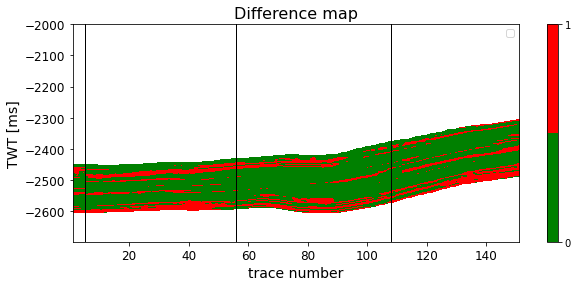

In [387]:
difference_map(df_facies_comparison=df_f_comparison, facies_predicted=map_facies_2, extent=extent_facies, list_of_wells=col_3)

## Compare accuracies (F1-score)

In [388]:
# Compare accuracies
list_of_accuracies_3wells = [accuracy_test_LR_3, accuracy_test_KNN_3, accuracy_test_SVM_3, accuracy_test_RF_3, accuracy_test_NN_3]
list_of_accuracies_3wells_100 = [i*100 for i in list_of_accuracies_3wells]

In [389]:
list_of_accuracies_3wells_100

[66.28686327077749,
 77.208072683944,
 76.81337503723563,
 78.58579088471849,
 73.87548406315162]

In [390]:
np.max(list_of_accuracies)

0.8143595634692705

In [391]:
accuracy_test_RF_3

0.785857908847185

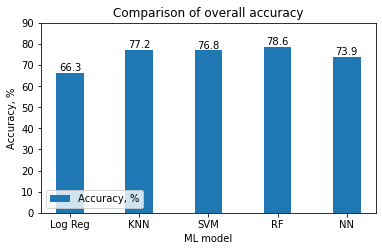

In [392]:
models_used = ['Log Reg','KNN','SVM','RF', 'NN']
fog, ax = plt.subplots(figsize=(6, 3.5))

  
X_axis = np.arange(len(models_used))
  
bar1 = plt.bar(X_axis, list_of_accuracies_3wells_100, 0.4, label = 'Accuracy, %')
ax.bar_label(bar1, fmt='%.1f')
  
plt.xticks(X_axis, models_used)
plt.xlabel("ML model")
plt.ylabel("Accuracy, %")
plt.title("Comparison of overall accuracy")
plt.legend(loc='lower left')
plt.ylim(0, 90)
plt.show()

The best overall accuracy is again achieved for Random Forest Classifier model when using 3 wells

So, this model is used later for testing Frequencies, evaluating the role of noise, additional features

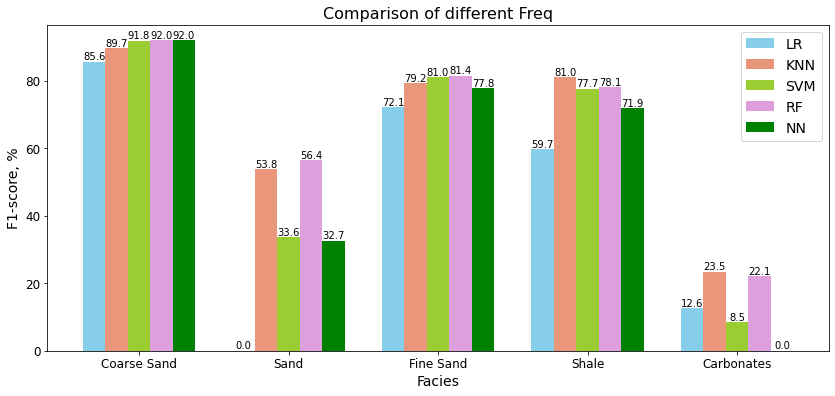

In [393]:
# freq_class = ['Ricker','Ormsby_10_60','Ormsby_10_80','Ormsby_10_100']
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale', 'Carbonates']
X_axis = np.arange(len(facies_class))
fig, ax = plt.subplots(figsize=(14,6))
  
bar1 = plt.bar(X_axis-0.3, f1_score_per_class_LR_3*100, 0.15, label = 'LR', color='skyblue')
bar2 = plt.bar(X_axis-0.15, f1_score_per_class_KNN_3*100, 0.15, label = 'KNN', color='darksalmon')
bar3 = plt.bar(X_axis, f1_score_per_class_SVM_3*100, 0.15, label = 'SVM', color='yellowgreen')
bar4 = plt.bar(X_axis+0.15, f1_score_per_class_RF_3*100, 0.15, label = 'RF', color='plum')
bar5 = plt.bar(X_axis+0.3, f1_score_per_class_NN_3*100, 0.15, label = 'NN', color='green')
#plt.bar(X_axis + 0.2, facies_actual, 0.4, label = 'facies_actual')

ax.bar_label(bar1, fmt='%.1f', fontsize=10)  
ax.bar_label(bar2, fmt='%.1f', fontsize=10)  
ax.bar_label(bar3, fmt='%.1f', fontsize=10)  
ax.bar_label(bar4, fmt='%.1f', fontsize=10)  
ax.bar_label(bar5, fmt='%.1f', fontsize=10)  
  
plt.xticks(X_axis, facies_class, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Facies", fontsize=14)
plt.ylabel("F1-score, %", fontsize=14)
plt.title("Comparison of different Freq", fontsize=16)
plt.legend(fontsize=14)
plt.show()

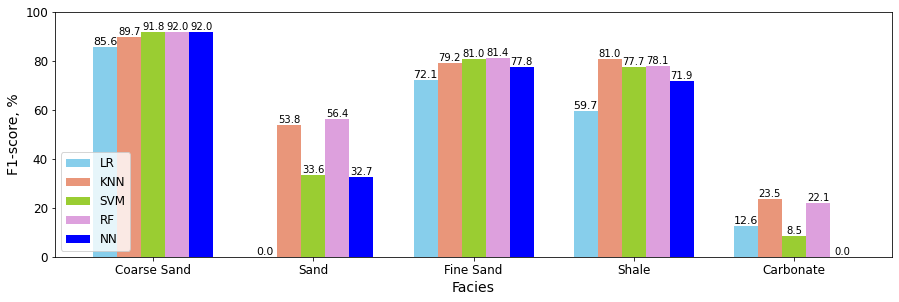

In [394]:
# freq_class = ['Ricker','Ormsby_10_60','Ormsby_10_80','Ormsby_10_100']
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale', 'Carbonate']
X_axis = np.arange(len(facies_class))
#plt.figure(figsize=(11,6))

fig, ax = plt.subplots(figsize=(15, 4.5))
  
bar1 = plt.bar(X_axis-0.3, f1_score_per_class_LR_3*100, 0.15, label = 'LR', color='skyblue')
bar2 = plt.bar(X_axis-0.15, f1_score_per_class_KNN_3*100, 0.15, label = 'KNN', color='darksalmon')
bar3 = plt.bar(X_axis, f1_score_per_class_SVM_3*100, 0.15, label = 'SVM', color='yellowgreen')
bar4 = plt.bar(X_axis+0.15, f1_score_per_class_RF_3*100, 0.15, label = 'RF', color='plum')
bar5 = plt.bar(X_axis+0.3, f1_score_per_class_NN_3*100, 0.15, label = 'NN', color='blue')


ax.bar_label(bar1, fmt='%.1f', fontsize=11)
ax.bar_label(bar2, fmt='%.1f')
ax.bar_label(bar3, fmt='%.1f')
ax.bar_label(bar4, fmt='%.1f')
ax.bar_label(bar5, fmt='%.1f')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)  
plt.xticks(X_axis, facies_class)
plt.xlabel("Facies", fontsize=14)
plt.ylabel("F1-score, %", fontsize=14)
#plt.title("Comparison of different Freq")
plt.legend(loc='lower left',fontsize=12)
plt.ylim(0, 100)
plt.show()

# Test Frequences: 
    a) Ricker 25 Hz
    b) Ormsby 10-60 Hz
    c) Ormsby 10-80 Hz
    d) Ormsby 10-100 Hz

In [365]:
col_3 = [5, 56, 108]

In [397]:
df_facies_wells = df_wells_from_section(df_facies, col_3)

# features Ricker
relai_std_wells = df_wells_from_section(df_relai_std, col_3)
seismic_std_wells = df_wells_from_section(df_seis_std, col_3)
df_seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_3)

In [398]:
# Ormsby 10-60 Hz
relai_10_60_wells =  df_wells_from_section(df_relai_10_60_std, col_3)
seis_10_60_wells =  df_wells_from_section(df_seis_10_60_std, col_3)
seis_inv_10_60_wells = df_wells_from_section(df_seis_inv_10_60_std, col_3)

# Ormsby 10-80 Hz
relai_10_80_wells = df_wells_from_section(df_relai_10_80_std, col_3)
seis_10_80_wells = df_wells_from_section(df_seis_10_80_std, col_3)
seis_inv_10_80_wells = df_wells_from_section(df_seis_inv_10_80_std, col_3)


# Ormsby 10-100 Hz
relai_10_100_wells = df_wells_from_section(df_relai_10_100_std, col_3)
seis_10_100_wells = df_wells_from_section(df_seis_10_100_std, col_3)
seis_inv_10_100_wells = df_wells_from_section(df_seis_inv_10_100_std, col_3)

## Ormsby 10-60

In [399]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_10_60_wells, seis_10_60_wells, seis_inv_10_60_wells]

In [400]:
facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
448     2.0  0.127884  0.374816  0.308088
449     2.0  0.205614  0.374816  0.422863
450     2.0  0.283390  0.374816  0.515595
451     2.0  0.290445  0.012660  0.577728
452     2.0  0.297510  0.012660  0.604366
..      ...       ...       ...       ...
549     3.0  0.149423 -2.884587  1.075252
550     3.0 -0.361277 -2.522431  0.845020
551     1.0 -0.729412 -1.798120  0.704579
552     1.0 -0.884190 -0.711652  0.707830
553     1.0 -0.896323  0.012660  0.850426

[471 rows x 4 columns]

In [401]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [402]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [403]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [404]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[24  0  0  0]
 [ 2  8  4  0]
 [ 0  6 34  1]
 [ 0  0  0 16]]
0.8631578947368421
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        24
         1.0       0.57      0.57      0.57        14
         2.0       0.89      0.83      0.86        41
         3.0       0.94      1.00      0.97        16

    accuracy                           0.86        95
   macro avg       0.83      0.85      0.84        95
weighted avg       0.86      0.86      0.86        95



In [405]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.8432432432432432


0.8432432432432432

In [406]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies = df_facies, 
                                                                  
                                                                  relai = df_relai_10_60_std, 
                                                                  seis = df_seis_10_60_std, 
                                                                  seis_inv = df_seis_inv_10_60_std,
                                                                   
                                                                  model = RF_Classifier_model)

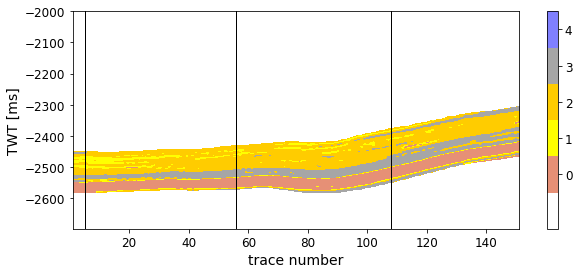

In [407]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      5106
         1.0       0.61      0.40      0.49      2853
         2.0       0.80      0.87      0.83     10233
         3.0       0.85      0.87      0.86      5338
         4.0       0.57      0.06      0.10        70

    accuracy                           0.83     23600
   macro avg       0.76      0.63      0.65     23600
weighted avg       0.82      0.83      0.82     23600



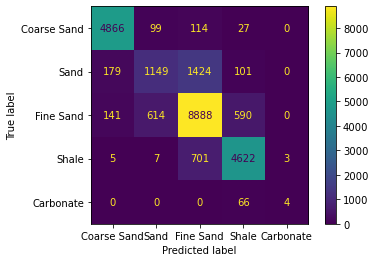

In [408]:
report_print_RF_10_60, f1_score_per_class_RF_10_60, count_facies, accuracy_test_RF_10_60  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

In [409]:
accuracy_test_RF_10_60

0.8275

#### Difference map

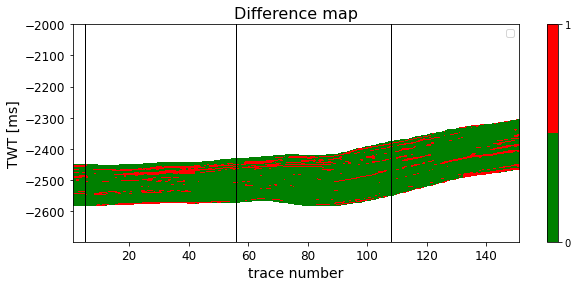

In [410]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

## Ormsby 10-80

In [411]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_10_80_wells, seis_10_80_wells, seis_inv_10_80_wells]

In [412]:
facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
448     2.0  0.224404  0.759252  0.442044
449     2.0  0.319603  0.383528  0.599758
450     2.0  0.414805  0.383528  0.683796
451     2.0  0.420780  0.007804  0.695436
452     2.0  0.426722  0.007804  0.648253
..      ...       ...       ...       ...
549     3.0  0.009457 -3.373710  2.098296
550     3.0 -0.716238 -2.997986  0.897950
551     1.0 -1.262693 -2.246538 -0.188485
552     1.0 -1.540654 -1.119367 -0.370793
553     1.0 -1.460873  0.383528 -0.442639

[471 rows x 4 columns]

In [413]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [414]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [415]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [416]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[24  0  0  0]
 [ 1  6  7  0]
 [ 0  4 34  3]
 [ 0  0  2 14]]
0.8210526315789474
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        24
         1.0       0.60      0.43      0.50        14
         2.0       0.79      0.83      0.81        41
         3.0       0.82      0.88      0.85        16

    accuracy                           0.82        95
   macro avg       0.79      0.78      0.78        95
weighted avg       0.81      0.82      0.81        95



In [417]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.8324324324324325


0.8324324324324325

In [418]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  
                                                                  relai=df_relai_10_80_std, 
                                                                  seis=df_seis_10_80_std, 
                                                                  seis_inv=df_seis_inv_10_80_std,
                                                                   
                                                                  model=RF_Classifier_model)

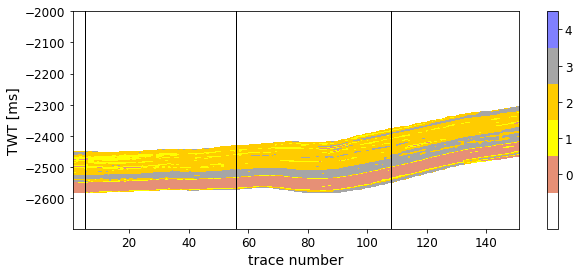

In [419]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      5106
         1.0       0.52      0.40      0.45      2853
         2.0       0.80      0.82      0.81     10233
         3.0       0.83      0.86      0.84      5338
         4.0       0.33      0.01      0.03        70

    accuracy                           0.81     23600
   macro avg       0.68      0.61      0.61     23600
weighted avg       0.79      0.81      0.80     23600



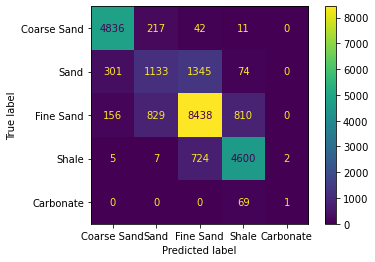

In [420]:
report_print_RF_10_80, f1_score_per_class_RF_10_80, count_facies, accuracy_test_RF_10_80  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

In [421]:
accuracy_test_RF_10_80

0.8054237288135593

In [422]:
accuracy_test_RF_10_60

0.8275

In [423]:
accuracy_test_RF

0.785857908847185

#### Difference map

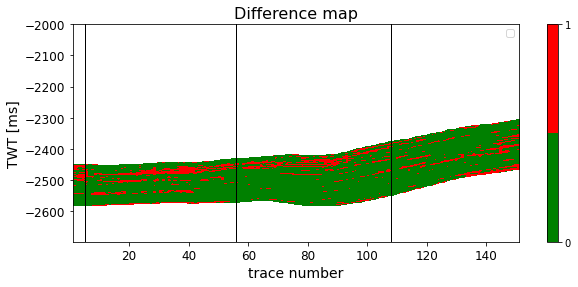

In [424]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

## Ormsby 10-100

In [425]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_10_100_wells, seis_10_100_wells, seis_inv_10_100_wells]

In [426]:
facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3

facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
448     2.0  0.209961  0.007908  0.683202
449     2.0  0.222830  0.007908  0.629535
450     2.0  0.129396 -0.383706  0.489544
451     2.0  0.142418  0.007908  0.360548
452     2.0  0.155480  0.007908  0.313866
..      ...       ...       ...       ...
549     3.0 -0.220968 -3.125003 -0.144093
550     3.0 -0.871134 -2.341776 -0.680089
551     1.0 -1.201164 -1.166934 -0.757185
552     1.0 -1.211019  0.007908 -0.602331
553     1.0 -1.007052  0.791135 -0.241168

[471 rows x 4 columns]

In [427]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [428]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [429]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [430]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[23  0  0  1]
 [ 3  4  7  0]
 [ 0  4 33  4]
 [ 0  0  2 14]]
0.7789473684210526
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92        24
         1.0       0.50      0.29      0.36        14
         2.0       0.79      0.80      0.80        41
         3.0       0.74      0.88      0.80        16

    accuracy                           0.78        95
   macro avg       0.73      0.73      0.72        95
weighted avg       0.76      0.78      0.76        95



In [431]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.800711237553343


0.800711237553343

In [432]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  
                                                                  relai=df_relai_10_100_std, 
                                                                  seis=df_seis_10_100_std, 
                                                                  seis_inv=df_seis_inv_10_100_std,
                                                                   
                                                                  model=RF_Classifier_model)

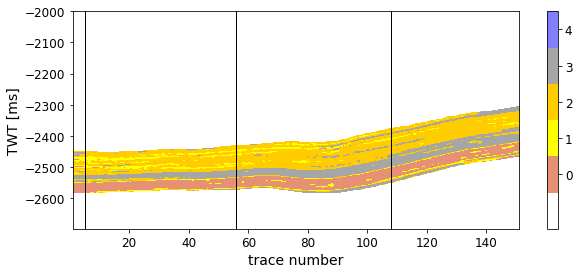

In [433]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91      5106
         1.0       0.45      0.37      0.41      2853
         2.0       0.81      0.82      0.81     10233
         3.0       0.81      0.89      0.85      5338
         4.0       0.50      0.09      0.15        70

    accuracy                           0.80     23600
   macro avg       0.70      0.61      0.63     23600
weighted avg       0.79      0.80      0.79     23600



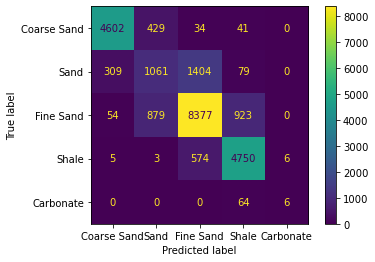

In [434]:
report_print_RF_10_100, f1_score_per_class_RF_10_100, count_facies, accuracy_test_RF_10_100  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

In [435]:
accuracy_test_RF_10_100

0.7964406779661017

In [436]:
accuracy_test_RF_10_80

0.8054237288135593

In [437]:
accuracy_test_RF_10_60

0.8275

In [438]:
accuracy_test_RF

0.785857908847185

#### Difference map

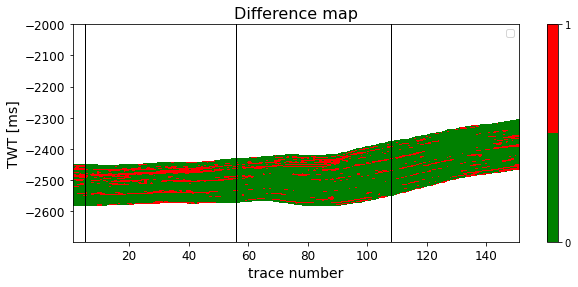

In [439]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

## Ricker 25 Hz

In [440]:
# relai_std_wells = df_wells_from_section(df_relai_std, col_3)
# seismic_std_wells = df_wells_from_section(df_seis_std, col_3)
# df_seis_inv_std_wells = df_wells_from_section(df_seis_inv_std, col_3)

In [441]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_std_wells, seismic_std_wells, df_seis_inv_std_wells]

In [442]:
facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3.head(2)

facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
448     2.0  0.067571  1.172467 -0.338762
449     2.0  0.214199  1.060955 -0.257138
450     2.0  0.342906  0.949443 -0.185448
451     2.0  0.451574  0.800760 -0.125082
452     2.0  0.538573  0.652078 -0.076728
..      ...       ...       ...       ...
571     2.0  1.006153 -1.764014  1.382892
572     2.0  0.721043 -2.061379  1.193970
573     3.0  0.404490 -2.321574  0.986958
574     2.0  0.068060 -2.470257  0.768348
575     1.0 -0.275212 -2.470257  0.544943

[537 rows x 4 columns]

In [443]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [444]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [445]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [446]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[23  0  0  0]
 [ 0  8  2  2]
 [ 0  3 43  3]
 [ 0  0  3 21]]
0.8796296296296297
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       0.73      0.67      0.70        12
         2.0       0.90      0.88      0.89        49
         3.0       0.81      0.88      0.84        24

    accuracy                           0.88       108
   macro avg       0.86      0.85      0.86       108
weighted avg       0.88      0.88      0.88       108



In [447]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.8366002214839423


0.8366002214839423

In [448]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  
                                                                  relai=df_relai_std, 
                                                                  seis=df_seis_std, 
                                                                  seis_inv=df_seis_inv_std,
                                                                   
                                                                  model=RF_Classifier_model)

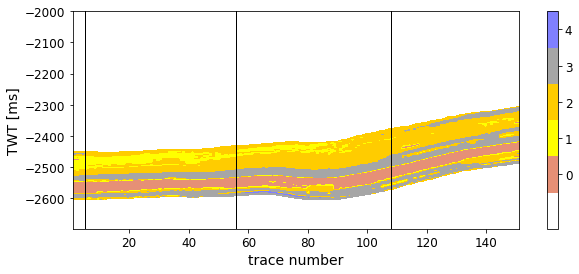

In [449]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.96      0.89      0.92      5171
         1.0       0.59      0.54      0.56      3429
         2.0       0.81      0.81      0.81     11240
         3.0       0.72      0.84      0.77      6390
         4.0       0.63      0.17      0.27       626

    accuracy                           0.78     26856
   macro avg       0.74      0.65      0.67     26856
weighted avg       0.78      0.78      0.78     26856



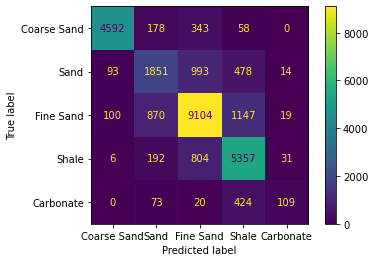

In [450]:
report_print_RF_ricker, f1_score_per_class_RF_ricker, count_facies, accuracy_test_RF_ricker  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

#### Difference map

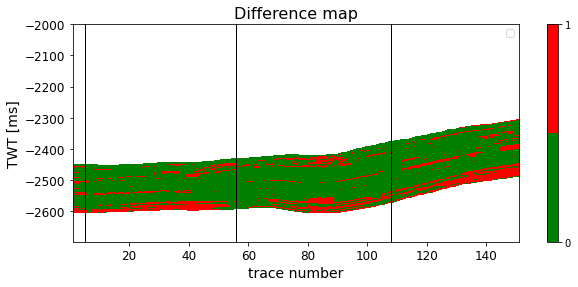

In [451]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

## Compare results

In [452]:
freq_range = ['Ricker 25Hz', 'Ormsby 10-60 Hz', 'Ormsby 10-80 Hz', 'Ormsby 10-100 Hz']
accuracy_freq = [accuracy_test_RF_ricker, accuracy_test_RF_10_60, accuracy_test_RF_10_80, accuracy_test_RF_10_100]
accuracy_freq_100 = [i*100 for i in accuracy_freq]

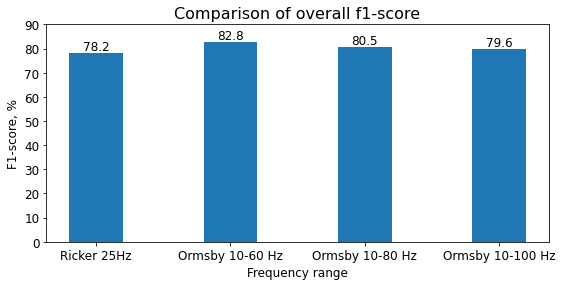

In [453]:
fig, ax = plt.subplots(figsize=(9, 4))
X_axis = np.arange(len(freq_range))
  
bar1 = plt.bar(X_axis, accuracy_freq_100, 0.4, label = 'Global average F1-score %')
ax.bar_label(bar1, fmt='%.1f', fontsize=12)  
plt.xticks(X_axis, freq_range)
plt.xlabel("Frequency range", fontsize=12)
plt.ylabel("F1-score, %", fontsize=12)
plt.title("Comparison of overall f1-score", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 90)
#plt.legend(location='lower left')
plt.show()

The best accuracy is achieved for featured defined with Ormsby frequency 10-60 Hz. 

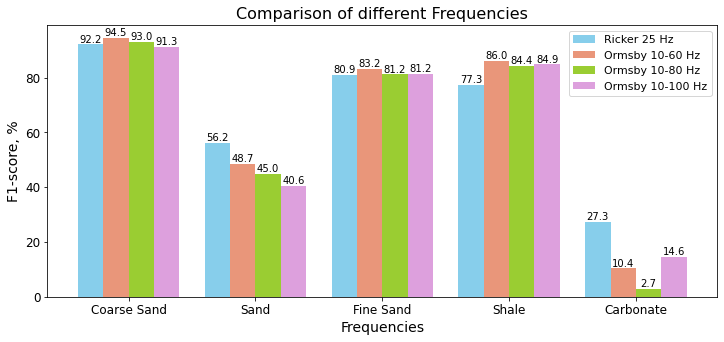

In [454]:
# freq_class = ['Ricker','Ormsby_10_60','Ormsby_10_80','Ormsby_10_100']
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale', 'Carbonate']
X_axis = np.arange(len(facies_class))
fig, ax = plt.subplots(figsize=(12,5))
  
bar1 = plt.bar(X_axis-0.3, f1_score_per_class_RF_ricker*100, 0.2, label = 'Ricker 25 Hz', color='skyblue')
bar2 = plt.bar(X_axis-0.1, f1_score_per_class_RF_10_60*100, 0.2, label = 'Ormsby 10-60 Hz', color='darksalmon')
bar3 = plt.bar(X_axis+0.1, f1_score_per_class_RF_10_80*100, 0.2, label = 'Ormsby 10-80 Hz', color='yellowgreen')
bar4 = plt.bar(X_axis+0.3, f1_score_per_class_RF_10_100*100, 0.2, label = 'Ormsby 10-100 Hz', color='plum')

ax.bar_label(bar1, fmt='%.1f')
ax.bar_label(bar2, fmt='%.1f')
ax.bar_label(bar3, fmt='%.1f')
ax.bar_label(bar4, fmt='%.1f')

  
plt.xticks(X_axis, facies_class)
plt.xlabel("Frequencies", fontsize=14)
plt.ylabel("F1-score, %", fontsize=14)
plt.title("Comparison of different Frequencies", fontsize=16)
plt.legend(fontsize=11)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Explore the role of additional features

## Ricker + Spectral Decomposition 30

In [455]:
spec_dec_30_wells = df_wells_from_section(df_spec_dec_30_std, col_3)
spec_dec_60_wells = df_wells_from_section(df_spec_dec_60_std, col_3)
spec_dec_90_wells = df_wells_from_section(df_spec_dec_90_std, col_3)

In [456]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv, concat_features_RelAI_Seis_SeisInv_SpecDec
from machine_learning import predict_2d_RelAI_Seis_SeisInv_Spec

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv_SpecDec = [relai_std_wells, seismic_std_wells, df_seis_inv_std_wells, spec_dec_30_wells]

In [457]:
facies_features_3 = concat_features_RelAI_Seis_SeisInv_SpecDec(df_facies_wells, feature_list_RelAI_Seis_SeisInv_SpecDec)
facies_features_3.head(2)

facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv      spec
448     2.0  0.067571  1.172467 -0.338762 -0.135850
449     2.0  0.214199  1.060955 -0.257138 -0.135850
450     2.0  0.342906  0.949443 -0.185448  0.767578
451     2.0  0.451574  0.800760 -0.125082 -0.135850
452     2.0  0.538573  0.652078 -0.076728 -0.135850
..      ...       ...       ...       ...       ...
571     2.0  1.006153 -1.764014  1.382892  2.858444
572     2.0  0.721043 -2.061379  1.193970  2.267061
573     3.0  0.404490 -2.321574  0.986958  1.543014
574     2.0  0.068060 -2.470257  0.768348  0.743864
575     1.0 -0.275212 -2.470257  0.544943 -0.069323

[537 rows x 5 columns]

In [458]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv', 'spec']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [459]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [460]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [461]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[20  1  1  1]
 [ 0  8  2  2]
 [ 0  2 44  3]
 [ 0  1  0 23]]
0.8796296296296297
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        23
         1.0       0.67      0.67      0.67        12
         2.0       0.94      0.90      0.92        49
         3.0       0.79      0.96      0.87        24

    accuracy                           0.88       108
   macro avg       0.85      0.85      0.85       108
weighted avg       0.89      0.88      0.88       108



In [462]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.8459579180509411


0.8459579180509411

In [463]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv_Spec(df_facies=df_facies, 
                                                                  
                                                                  relai = df_relai_std, 
                                                                  seis = df_seis_std,
                                                                  seis_inv = df_seis_inv_std,
                                                                  spec = df_spec_dec_30_std,
                                                                   
                                                                  model=RF_Classifier_model)

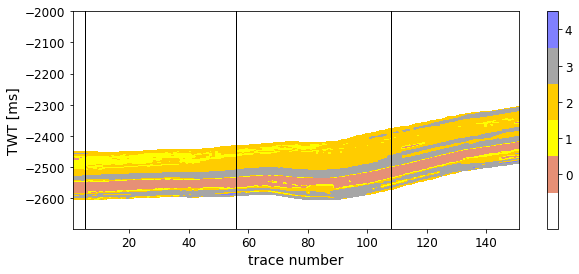

In [464]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90      5171
         1.0       0.56      0.51      0.54      3429
         2.0       0.79      0.81      0.80     11240
         3.0       0.71      0.82      0.76      6390
         4.0       0.48      0.11      0.18       626

    accuracy                           0.77     26856
   macro avg       0.70      0.62      0.64     26856
weighted avg       0.77      0.77      0.76     26856



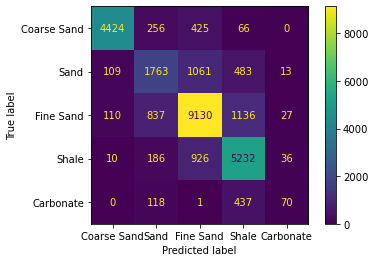

In [465]:
report_print_RF_spec_30, f1_score_per_class_RF_spec_30, count_facies, accuracy_test_RF_spec_30  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

#### Difference map

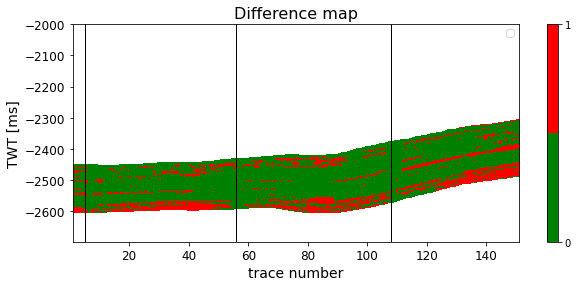

In [466]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

## Ricker + Spectral Decomposition 60

In [469]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv, concat_features_RelAI_Seis_SeisInv_SpecDec
from machine_learning import predict_2d_RelAI_Seis_SeisInv_Spec

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv_SpecDec = [relai_std_wells, seismic_std_wells, df_seis_inv_std_wells, spec_dec_60_wells]

In [470]:
facies_features_3 = concat_features_RelAI_Seis_SeisInv_SpecDec(df_facies_wells, feature_list_RelAI_Seis_SeisInv_SpecDec)
facies_features_3.head(2)

facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv      spec
448     2.0  0.067571  1.172467 -0.338762 -0.031295
449     2.0  0.214199  1.060955 -0.257138 -0.031295
450     2.0  0.342906  0.949443 -0.185448  0.694251
451     2.0  0.451574  0.800760 -0.125082 -0.031295
452     2.0  0.538573  0.652078 -0.076728 -0.031295
..      ...       ...       ...       ...       ...
571     2.0  1.006153 -1.764014  1.382892  1.559712
572     2.0  0.721043 -2.061379  1.193970  1.982016
573     3.0  0.404490 -2.321574  0.986958  2.033019
574     2.0  0.068060 -2.470257  0.768348  1.701756
575     1.0 -0.275212 -2.470257  0.544943  1.042455

[537 rows x 5 columns]

In [471]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv', 'spec']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [472]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [473]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [474]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[22  1  0  0]
 [ 0  7  3  2]
 [ 0  2 45  2]
 [ 0  0  0 24]]
0.9074074074074074
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        23
         1.0       0.70      0.58      0.64        12
         2.0       0.94      0.92      0.93        49
         3.0       0.86      1.00      0.92        24

    accuracy                           0.91       108
   macro avg       0.87      0.86      0.87       108
weighted avg       0.91      0.91      0.91       108



In [475]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.8389811738648948


0.8389811738648948

In [476]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv_Spec(df_facies=df_facies, 
                                                                  
                                                                  relai = df_relai_std, 
                                                                  seis = df_seis_std,
                                                                  seis_inv = df_seis_inv_std,
                                                                  spec = df_spec_dec_60_std,
                                                                   
                                                                  model=RF_Classifier_model)

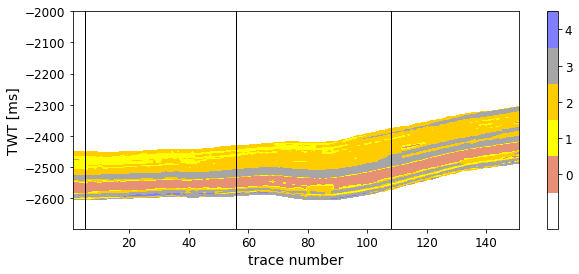

In [477]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91      5171
         1.0       0.61      0.61      0.61      3429
         2.0       0.81      0.82      0.81     11240
         3.0       0.75      0.82      0.79      6390
         4.0       0.26      0.12      0.16       626

    accuracy                           0.79     26856
   macro avg       0.68      0.65      0.66     26856
weighted avg       0.79      0.79      0.78     26856



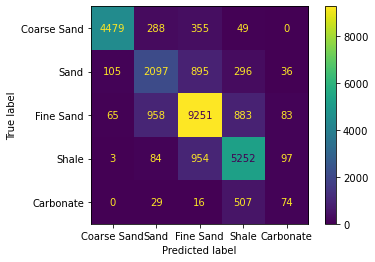

In [478]:
report_print_RF_spec_60, f1_score_per_class_RF_spec_60, count_facies, accuracy_test_RF_spec_60  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

#### Difference map

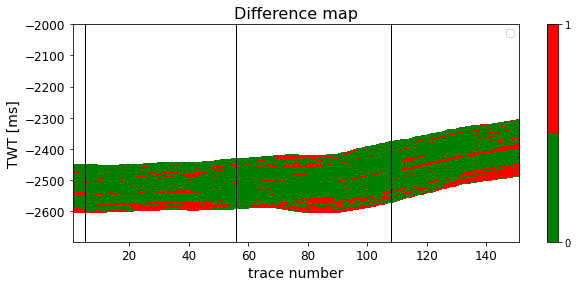

In [479]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

## Ricker + Spectral Decomposition 90

In [480]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv, concat_features_RelAI_Seis_SeisInv_SpecDec
from machine_learning import predict_2d_RelAI_Seis_SeisInv_Spec

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv_SpecDec = [relai_std_wells, seismic_std_wells, df_seis_inv_std_wells, spec_dec_90_wells]

In [481]:
facies_features_3 = concat_features_RelAI_Seis_SeisInv_SpecDec(df_facies_wells, feature_list_RelAI_Seis_SeisInv_SpecDec)
facies_features_3.head(2)

facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv      spec
448     2.0  0.067571  1.172467 -0.338762 -0.021520
449     2.0  0.214199  1.060955 -0.257138 -0.021520
450     2.0  0.342906  0.949443 -0.185448  0.018544
451     2.0  0.451574  0.800760 -0.125082 -0.021520
452     2.0  0.538573  0.652078 -0.076728 -0.021520
..      ...       ...       ...       ...       ...
571     2.0  1.006153 -1.764014  1.382892  1.803049
572     2.0  0.721043 -2.061379  1.193970  3.293036
573     3.0  0.404490 -2.321574  0.986958  3.770451
574     2.0  0.068060 -2.470257  0.768348  3.055467
575     1.0 -0.275212 -2.470257  0.544943  1.394002

[537 rows x 5 columns]

In [482]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv', 'spec']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [483]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [484]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [485]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[22  0  0  1]
 [ 0  7  3  2]
 [ 0  0 46  3]
 [ 0  0  2 22]]
0.8981481481481481
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        23
         1.0       1.00      0.58      0.74        12
         2.0       0.90      0.94      0.92        49
         3.0       0.79      0.92      0.85        24

    accuracy                           0.90       108
   macro avg       0.92      0.85      0.87       108
weighted avg       0.91      0.90      0.90       108



In [486]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.8204318936877076


0.8204318936877076

In [487]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv_Spec(df_facies=df_facies, 
                                                                  
                                                                  relai = df_relai_std, 
                                                                  seis = df_seis_std,
                                                                  seis_inv = df_seis_inv_std,
                                                                  spec = df_spec_dec_90_std,
                                                                   
                                                                  model=RF_Classifier_model)

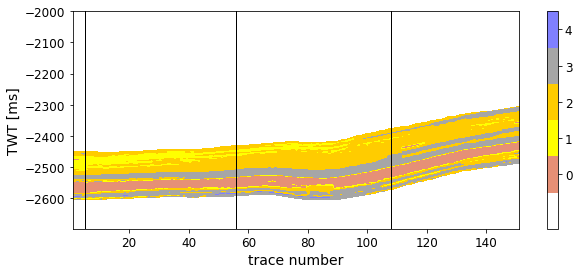

In [488]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.97      0.87      0.91      5171
         1.0       0.65      0.54      0.59      3429
         2.0       0.79      0.84      0.81     11240
         3.0       0.75      0.84      0.79      6390
         4.0       0.82      0.21      0.34       626

    accuracy                           0.79     26856
   macro avg       0.79      0.66      0.69     26856
weighted avg       0.80      0.79      0.79     26856



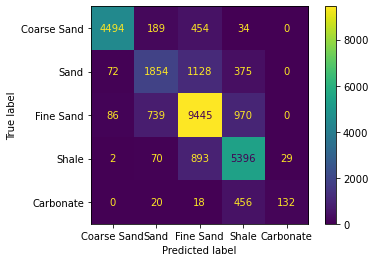

In [489]:
report_print_RF_spec_90, f1_score_per_class_RF_spec_90, count_facies, accuracy_test_RF_spec_90  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

#### Difference map

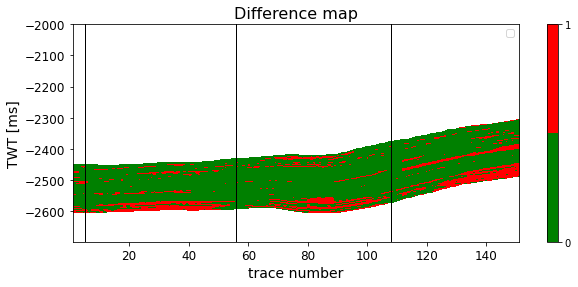

In [490]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

## Compare results

In [491]:
accuracy_spec = [accuracy_test_RF_ricker, accuracy_test_RF_spec_30, accuracy_test_RF_spec_60, accuracy_test_RF_spec_90]
accuracy_spec_100 = [i*100 for i in accuracy_spec]


freq_spec = ['Ricker', 'Add. Spec_Dec 30', 'Add. Spec_Dec 60', 'Add. Spec_Dec 90']

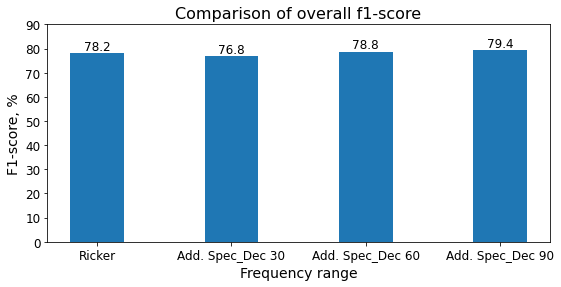

In [492]:
fig, ax = plt.subplots(figsize=(9, 4))
X_axis = np.arange(len(freq_spec))
  
bar1 = plt.bar(X_axis, accuracy_spec_100, 0.4, label = 'F1-score %')
ax.bar_label(bar1, fmt='%.1f', fontsize=12)  
plt.xticks(X_axis, freq_spec, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Frequency range", fontsize=14)
plt.ylabel("F1-score, %", fontsize=14)
plt.ylim(0, 90)
plt.title("Comparison of overall f1-score", fontsize=16)
#plt.legend(location='lower left')
plt.show()

Adding Spectral Decomposition 10-100 slightly increased the overall accuracy

We will check if adding Spec.Decomposition increased the predictio in thin layers of the facies

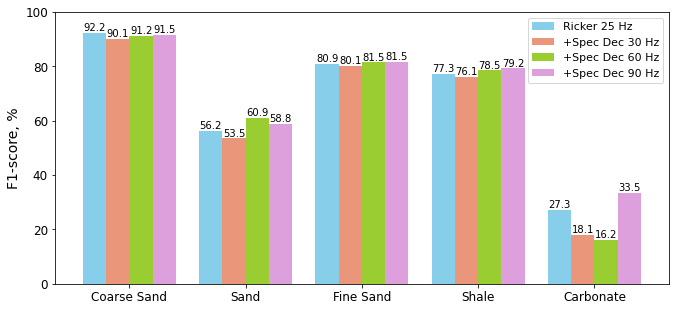

In [493]:
# freq_class = ['Ricker','Ormsby_10_60','Ormsby_10_80','Ormsby_10_100']
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale', 'Carbonate']
X_axis = np.arange(len(facies_class))
fig, ax = plt.subplots(figsize=(11,5))
  
bar1 = plt.bar(X_axis-0.3, f1_score_per_class_RF_ricker*100, 0.2, label = 'Ricker 25 Hz', color='skyblue')
bar2 = plt.bar(X_axis-0.1, f1_score_per_class_RF_spec_30*100, 0.2, label = '+Spec Dec 30 Hz', color='darksalmon')
bar3 = plt.bar(X_axis+0.1, f1_score_per_class_RF_spec_60*100, 0.2, label = '+Spec Dec 60 Hz', color='yellowgreen')
bar4 = plt.bar(X_axis+0.3, f1_score_per_class_RF_spec_90*100, 0.2, label = '+Spec Dec 90 Hz', color='plum')
#plt.bar(X_axis + 0.2, facies_actual, 0.4, label = 'facies_actual')


ax.bar_label(bar1, fmt='%.1f')
ax.bar_label(bar2, fmt='%.1f')
ax.bar_label(bar3, fmt='%.1f')
ax.bar_label(bar4, fmt='%.1f')
  
plt.xticks(X_axis, facies_class)
# plt.xlabel("", fontsize=14)
plt.ylabel("F1-score, %", fontsize=14)
# plt.title("Comparison of different Frequencies", fontsize=16)
plt.legend(fontsize=11)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 100)
plt.show()

Adding Spec Decomposition increased the performance in thin layers (Carbonate and Sand)

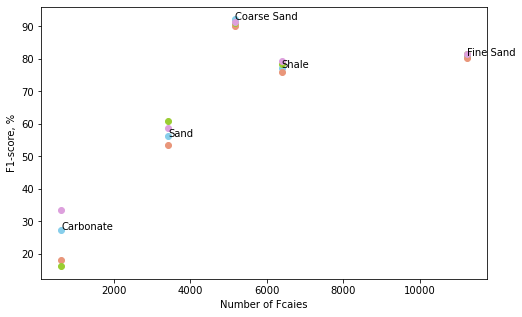

In [494]:
# Plot number of facies VS F1_score
facies_class = ['Coarse Sand', 'Sand', 'Fine Sand', 'Shale', 'Carbonate']
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.scatter(count_facies, f1_score_per_class_RF_ricker*100, color='skyblue')
ax.scatter(count_facies, f1_score_per_class_RF_spec_30*100, color='darksalmon')
ax.scatter(count_facies, f1_score_per_class_RF_spec_60*100, color='yellowgreen')
ax.scatter(count_facies, f1_score_per_class_RF_spec_90*100, color='plum')

for i, txt in enumerate(facies_class):
    ax.annotate(txt, (count_facies[i], f1_score_per_class_RF_ricker[i]*100))
    
plt.ylabel('F1-score, %')
plt.xlabel('Number of Fcaies')
plt.show()

# Explore the role of Noisy data

The Noisy data has defined with Ormsby frequency 10-60

So, we compare prediction from noisy and not noisy data that have Ormsby frequency 10-60

In [495]:
# Apply standardization
df_seis_noise_std = standartization(df_seis_noise, value_to_drop=False)
df_relai_noise_std = standartization(df_relai_noise, value_to_drop=False)
df_seis_inv_noise_std = standartization(df_seis_inv_noise, value_to_drop=False)

In [496]:
# Select wells from section to train ML model
seis_noise_wells = df_wells_from_section(df_seis_noise_std, col_3)
relai_noise_wells = df_wells_from_section(df_relai_noise_std, col_3)
seis_inv_noise_wells = df_wells_from_section(df_seis_inv_noise_std, col_3)

In [497]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv

# create a list of features (RelAI, Seis, Seis_inv)
feature_list_RelAI_Seis_SeisInv = [relai_noise_wells, seis_noise_wells, seis_inv_noise_wells]

In [498]:
facies_features_3 = concat_features_RelAI_Seis_SeisInv(df_facies_wells, feature_list_RelAI_Seis_SeisInv)
facies_features_3.head(2)

facies_and_features = facies_features_3.copy()
facies_and_features

facies     relai      seis  seis_inv
448     2.0  0.500994  0.456696 -0.137647
449     2.0  0.585500  0.387368 -0.041928
450     2.0  0.655947  0.314294  0.030223
451     2.0  0.642442 -0.116442  0.073145
452     2.0  0.615864 -0.184275  0.084116
..      ...       ...       ...       ...
571     2.0  0.655599 -0.651135  1.035295
572     2.0  0.461504 -0.987905  1.101078
573     3.0  0.131561 -1.686039  1.096654
574     2.0 -0.265416 -2.031726  1.000959
575     1.0 -0.800122 -2.739053  0.813618

[537 rows x 4 columns]

In [499]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

In [500]:
# RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [501]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [502]:
# Validation set
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[22  0  0  1]
 [ 0  7  5  0]
 [ 0  3 43  3]
 [ 1  0  1 22]]
0.8703703703703703
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        23
         1.0       0.70      0.58      0.64        12
         2.0       0.88      0.88      0.88        49
         3.0       0.85      0.92      0.88        24

    accuracy                           0.87       108
   macro avg       0.85      0.83      0.84       108
weighted avg       0.87      0.87      0.87       108



In [503]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.8040974529346622


0.8040974529346622

In [504]:
# Prediction of facies on 2D
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_SeisInv(df_facies=df_facies, 
                                                                  
                                                                  relai=df_relai_noise_std, 
                                                                  seis=df_seis_noise_std, 
                                                                  seis_inv=df_seis_inv_noise_std,
                                                                   
                                                                  model=RF_Classifier_model)

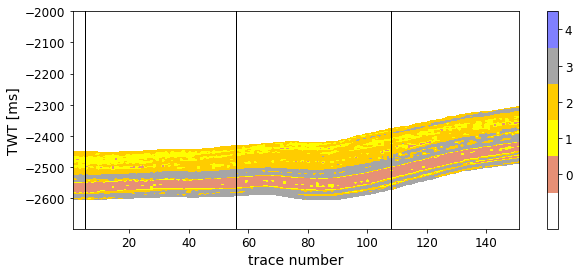

In [505]:
# Plot 2D facies prediction
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      5171
         1.0       0.41      0.49      0.45      3429
         2.0       0.79      0.70      0.74     11240
         3.0       0.70      0.85      0.77      6390
         4.0       0.39      0.02      0.04       626

    accuracy                           0.73     26856
   macro avg       0.64      0.59      0.58     26856
weighted avg       0.73      0.73      0.72     26856



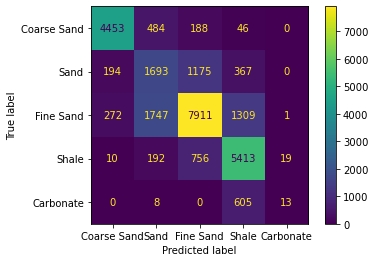

In [506]:
# Confusion matrix of 2D facies prediction (wells that were used for training ML model, are removed)
report_print_RF_10_60_noise, f1_score_per_class_RF_10_60_noise, count_facies, accuracy_test_RF_10_60_noise  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

#### Difference map

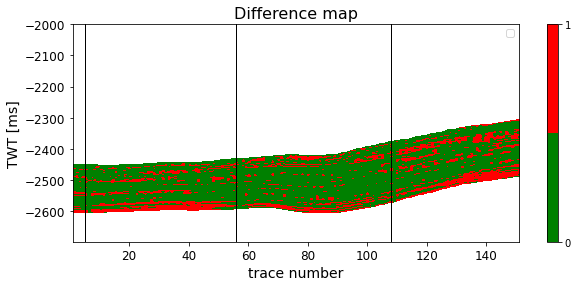

In [507]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

### Compare results with not noisy data (Ormsby 10-60)

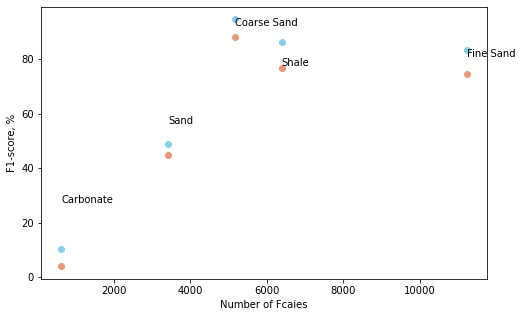

In [508]:
# Plot number of facies VS F1_score
facies_class = ['Coarse Sand', 'Sand', 'Fine Sand', 'Shale', 'Carbonate']
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.scatter(count_facies, f1_score_per_class_RF_10_60*100, color='skyblue')
ax.scatter(count_facies, f1_score_per_class_RF_10_60_noise*100, color='darksalmon')


for i, txt in enumerate(facies_class):
    ax.annotate(txt, (count_facies[i], f1_score_per_class_RF_ricker[i]*100))
    
plt.ylabel('F1-score, %')
plt.xlabel('Number of Fcaies')
plt.show()

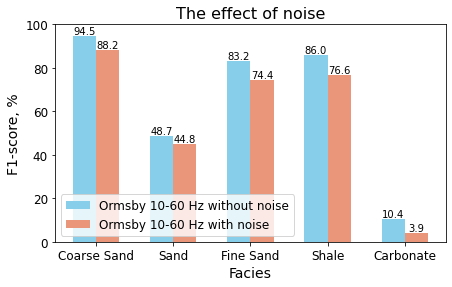

In [509]:
# freq_class = ['Ricker','Ormsby_10_60','Ormsby_10_80','Ormsby_10_100']
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale', 'Carbonate']
X_axis = np.arange(len(facies_class))
fig, ax = plt.subplots(figsize=(7,4))
  
bar1 = plt.bar(X_axis-0.15, f1_score_per_class_RF_10_60*100, 0.3, label = 'Ormsby 10-60 Hz without noise', color='skyblue')
bar2 = plt.bar(X_axis+0.15, f1_score_per_class_RF_10_60_noise*100, 0.3, label = 'Ormsby 10-60 Hz with noise', color='darksalmon')

ax.bar_label(bar1, fmt='%.1f')
ax.bar_label(bar2, fmt='%.1f')
  
plt.xticks(X_axis, facies_class, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Facies", fontsize=14)
plt.ylabel("F1-score, %", fontsize=14)
plt.title("The effect of noise", fontsize=16)
plt.legend(loc='lower left', fontsize=12)
plt.ylim(0, 100)
plt.show()

In [510]:
noise_data = accuracy_test_RF_10_60, accuracy_test_RF_10_60_noise
noise_data_100 = [i*100 for i in noise_data]
noise_data_100

[82.75, 72.54617217753948]

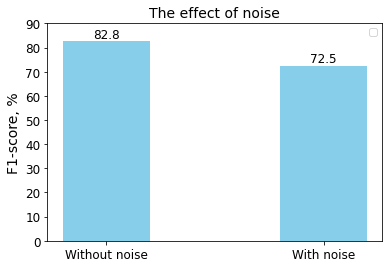

In [511]:
# freq_class = ['Ricker','Ormsby_10_60','Ormsby_10_80','Ormsby_10_100']
# facies_class = ['Coarse Sand','Sand','Fine Sand','Shale', 'Carbonate']
fig, ax = plt.subplots(figsize=(6, 4))
noise = ['Without noise', 'With noise']

X_axis = np.arange(len(noise_data_100))
  
bar1 = ax.bar(X_axis, noise_data_100, 0.4, color='skyblue')
# plt.bar(X_axis+0.1, accuracy_test_RF_ricker_noise*100, 0.2, label = 'with noise Ricker 25 Hz', color='darksalmon')

#plt.bar(X_axis + 0.2, facies_actual, 0.4, label = 'facies_actual')
ax.bar_label(bar1, fmt='%.1f', fontsize=12)  
plt.xticks(X_axis, noise, fontsize=12)
plt.yticks(fontsize=12)
# plt.xlabel("Frequencies")
plt.ylabel("F1-score, %", fontsize=14)
plt.title("The effect of noise", fontsize=14)
plt.ylim(0, 90)
plt.legend()
plt.show()

The noisy data negatively affect the facies prediction accuracy

# Evaluate the role of additional features

### Add Envelope, Inst.Frequency (10-60 Hz) to Rel.AI, Seismic (10-60 Hz), and compare with Seismic Inversion, Seismic (10-60 Hz)

For comparison I will also use Random Forest Classifier (baseline model)

In [512]:
from facies_features_concat import concat_features_RelAI_Seis_SeisInv, concat_features_RelAI_Seis_Envel_InstFreq
from machine_learning import predict_2d_RelAI_Seis_Envel_InstFreq

In [513]:
# apply Standardization
df_inst_freq_std = standartization(df_inst_freq, value_to_drop=False)
df_envel_std = standartization(df_envel, value_to_drop=False)

In [514]:
col_3 = col_30[1::10]
len(col_3)
col_3


[5, 56, 108]

In [515]:
# Select well-log from traces for training ML models
df_facies_wells = df_wells_from_section(df_facies, col_3)


# features
relai_10_60_wells =  df_wells_from_section(df_relai_10_60_std, col_3)
seis_10_60_wells =  df_wells_from_section(df_seis_10_60_std, col_3)


envel_10_60_wells = df_wells_from_section(df_envel_std, col_3)
inst_freq_10_60_wells = df_wells_from_section(df_inst_freq_std, col_3)


In [516]:
# Create feature list
feature_list_RelAI_Seis_Envel_InstFreq = [relai_10_60_wells, 
                                          seis_10_60_wells, 
                                          envel_10_60_wells, 
                                          inst_freq_10_60_wells]

In [517]:
# Concatenate facies and features
facies_features_4 = concat_features_RelAI_Seis_Envel_InstFreq(df_facies_wells, feature_list_RelAI_Seis_Envel_InstFreq)
facies_features_4

# facies_and_features
facies_and_features = facies_features_4.copy()
facies_and_features.head()

facies     relai      seis     envel  inst_freq
448     2.0  0.127884  0.374816 -0.366838  -0.677850
449     2.0  0.205614  0.374816 -0.337805  -0.556931
450     2.0  0.283390  0.374816 -0.398017  -0.309642
451     2.0  0.290445  0.012660 -0.478435  -0.238424
452     2.0  0.297510  0.012660 -0.566504  -0.401537

In [518]:
# Check how many facies are represented
facies_and_features['facies'].value_counts()

2.0    215
3.0    129
0.0    105
1.0     82
4.0      6
Name: facies, dtype: int64

In [519]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'envel', 'inst_freq']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

### Random Forest classification

In [520]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [521]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [522]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [523]:
# Validation set (conf matrix)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[21  2  0  0]
 [ 0  5  6  1]
 [ 0  6 42  1]
 [ 0  0  1 23]]
0.8425925925925926
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        23
         1.0       0.38      0.42      0.40        12
         2.0       0.86      0.86      0.86        49
         3.0       0.92      0.96      0.94        24

    accuracy                           0.84       108
   macro avg       0.79      0.79      0.79       108
weighted avg       0.85      0.84      0.85       108



In [524]:
# Cross-validation
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.8574750830564783


0.8574750830564783

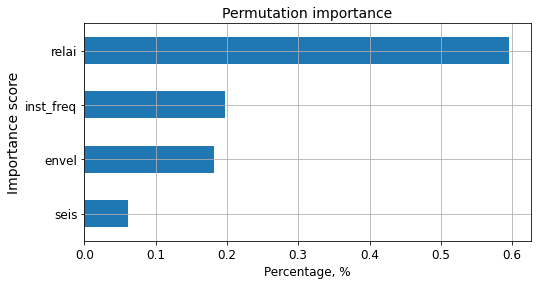

In [525]:
feature_importance_plot(RF_Classifier_model, x_train, y_train, random_state=50)

In [526]:
# Predict 2D facies from features
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_Envel_InstFreq(df_facies=df_facies,
                                                                   
                                                                        relai=df_relai_10_60_std, 
                                                                        seis=df_seis_10_60_std, 
                                                                        envel=df_envel_std, 
                                                                        inst_freq = df_inst_freq_std,
                                                                  
                                                                        model=RF_Classifier_model)
facies_pred

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

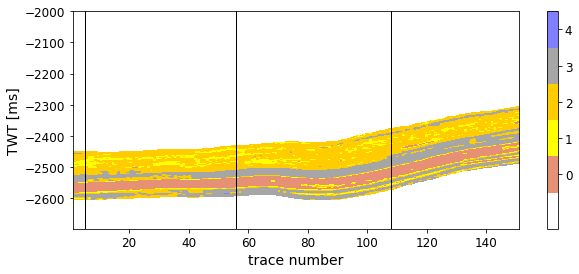

In [527]:
# Plor predicted facies
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90      5171
         1.0       0.35      0.29      0.31      3429
         2.0       0.72      0.75      0.74     11240
         3.0       0.74      0.83      0.78      6390
         4.0       0.28      0.02      0.03       626

    accuracy                           0.72     26856
   macro avg       0.60      0.56      0.55     26856
weighted avg       0.70      0.72      0.71     26856



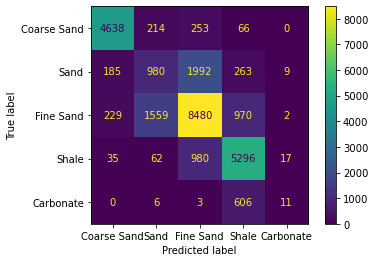

In [528]:
# Confusion matris of 2D facies prediction (wells that were used for training are removed)
report_print_RF_4, f1_score_per_class_RF_4, count_facies, accuracy_test_RF_4  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

#### Difference map

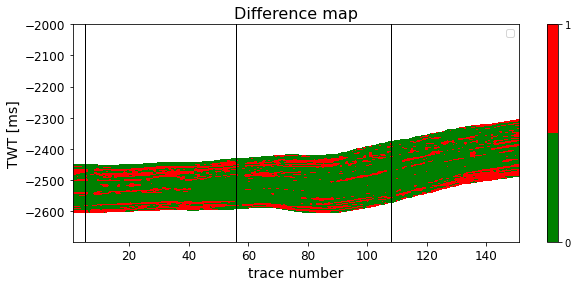

In [529]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

In [530]:
col_3

[5, 56, 108]

# Use Seismiv Inversion, Seismic

In [531]:
from facies_features_concat import concat_features_Seis_SeisInv
from machine_learning import predict_2d_Seis_SeisInv

In [532]:
col_3 = col_30[1::10]
len(col_3)
col_3


[5, 56, 108]

In [533]:
df_facies_wells = df_wells_from_section(df_facies, col_3)

# features
seismic_10_60_wells = df_wells_from_section(df_seis_10_60_std, col_3)
seis_inv_10_60_wells = df_wells_from_section(df_seis_inv_10_60_std, col_3)



In [534]:
feature_list_Seis_Seis_Inv = [seismic_10_60_wells, 
                            seis_inv_10_60_wells]

In [535]:
facies_features_2 = concat_features_Seis_SeisInv(df_facies_wells, feature_list_Seis_Seis_Inv)
facies_features_2

# facies_and_features
facies_and_features = facies_features_2.copy()
facies_and_features

facies      seis  seis_inv
448     2.0  0.374816  0.308088
449     2.0  0.374816  0.422863
450     2.0  0.374816  0.515595
451     2.0  0.012660  0.577728
452     2.0  0.012660  0.604366
..      ...       ...       ...
549     3.0 -2.884587  1.075252
550     3.0 -2.522431  0.845020
551     1.0 -1.798120  0.704579
552     1.0 -0.711652  0.707830
553     1.0  0.012660  0.850426

[471 rows x 3 columns]

In [536]:
facies_and_features['facies'].value_counts()

2.0    200
0.0    102
3.0     98
1.0     70
4.0      1
Name: facies, dtype: int64

In [537]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['seis', 'seis_inv']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

### Random Forest classification

In [538]:
from sklearn.ensemble import RandomForestClassifier


In [539]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [540]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [541]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[24  0  0  0]
 [ 2  5  7  0]
 [ 0  7 31  3]
 [ 0  1  1 14]]
0.7789473684210526
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        24
         1.0       0.38      0.36      0.37        14
         2.0       0.79      0.76      0.77        41
         3.0       0.82      0.88      0.85        16

    accuracy                           0.78        95
   macro avg       0.73      0.75      0.74        95
weighted avg       0.77      0.78      0.77        95



In [542]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.7208392603129445


0.7208392603129445

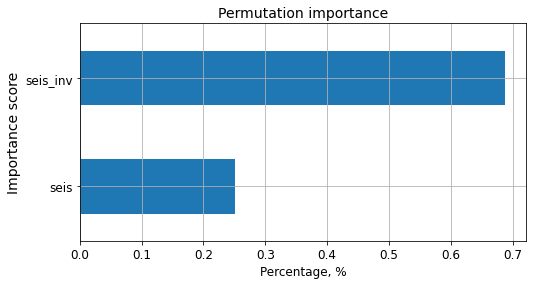

In [543]:
feature_importance_plot(RF_Classifier_model, x_train, y_train, random_state=50)

In [544]:
facies_pred, df_facies_comparison = predict_2d_Seis_SeisInv(df_facies=df_facies,
                                                            
                                                            seis=df_seis_10_60_std, 
                                                            seis_inv=df_seis_inv_10_60_std,
                                                                  
                                                            model=RF_Classifier_model)
facies_pred

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

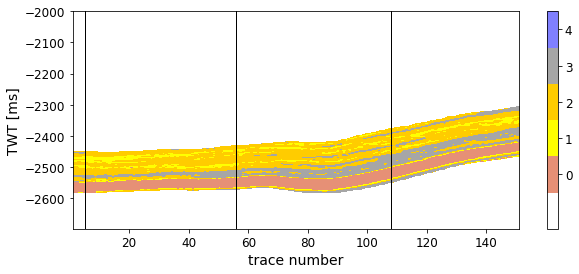

In [545]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      5106
         1.0       0.38      0.41      0.39      2853
         2.0       0.75      0.72      0.73     10233
         3.0       0.74      0.78      0.76      5338
         4.0       0.36      0.14      0.20        70

    accuracy                           0.74     23600
   macro avg       0.64      0.60      0.61     23600
weighted avg       0.75      0.74      0.74     23600



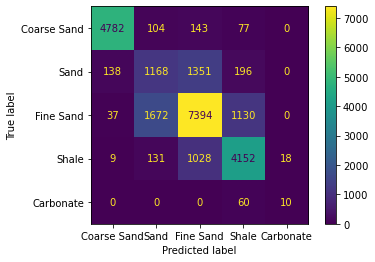

In [546]:
report_print_RF_2, f1_score_per_class_RF_2, count_facies, accuracy_test_RF_2  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

#### Difference map

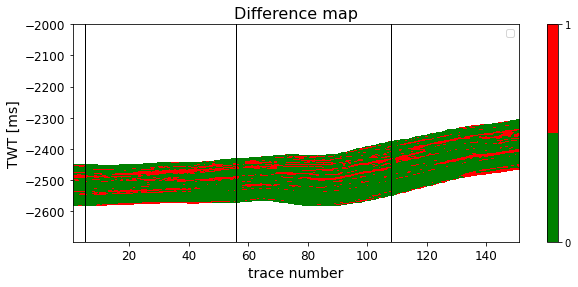

In [547]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

### Compare results

In [548]:
accuracy_comp = [accuracy_test_RF_4, accuracy_test_RF_2]
accuracy_comp_2_4_100 = [i*100 for i in accuracy_comp]

f1_comp = [f1_score_per_class_RF_4, f1_score_per_class_RF_2]
f1_comp_2_4_100 = [i*100 for i in f1_comp]

In [549]:
f1_comp_2_4_100

[array([90.42698382, 31.36      , 73.90622276, 77.93392686,  3.30827068]),
 array([94.95631454, 39.40620783, 73.39322051, 75.81484525, 20.40816327])]

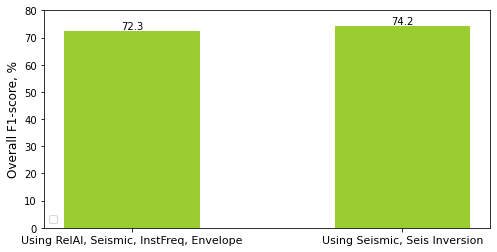

In [550]:
# freq_class = ['Ricker','Ormsby_10_60','Ormsby_10_80','Ormsby_10_100']
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale', 'Carbonate']
models_used = ['Log Reg','KNN','SVM','RF', 'NN']
comp_r_s = ['Using RelAI, Seismic, InstFreq, Envelope', 'Using Seismic, Seis Inversion']
X_axis = np.arange(len(comp_r_s))
fig, ax = plt.subplots(figsize=(8, 4))
  


bar1 = plt.bar(X_axis, accuracy_comp_2_4_100, 0.5, color='yellowgreen')
# bar2 = plt.bar(X_axis-0.1, list_of_accuracies_2_100, 0.2, label = 'Seis, Seis_Inv', color='skyblue')
ax.bar_label(bar1, fmt='%.1f')

  
plt.xticks(X_axis, comp_r_s, fontsize=11)
# plt.xlabel("ML models")
plt.ylabel("Overall F1-score, %", fontsize=12)
plt.title("")
plt.ylim(0, 80)
plt.legend(loc='lower left')
plt.show()

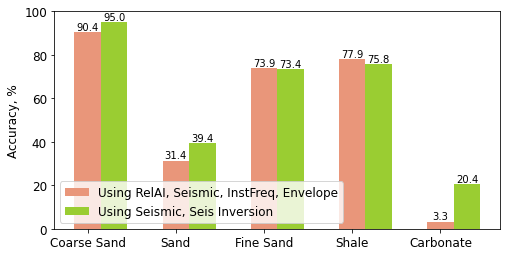

In [551]:
# freq_class = ['Ricker','Ormsby_10_60','Ormsby_10_80','Ormsby_10_100']
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale', 'Carbonate']
comp_r_s = ['Using RelAI, Seismic, InstFreq, Envelope', 'Using Seismic, SeisInversion']
X_axis = np.arange(len(facies_class))
fig, ax = plt.subplots(figsize=(8, 4))
  


bar1 = plt.bar(X_axis, f1_score_per_class_RF_4*100, 0.3, label = 'Using RelAI, Seismic, InstFreq, Envelope', color='darksalmon')
bar2 = plt.bar(X_axis+0.3, f1_score_per_class_RF_2*100, 0.3, label = 'Using Seismic, Seis Inversion', color='yellowgreen')
ax.bar_label(bar1, fmt='%.1f')
ax.bar_label(bar2, fmt='%.1f')

  
plt.xticks(X_axis, facies_class, fontsize=12)
plt.yticks(fontsize=12)
# plt.xlabel("ML models")
plt.ylabel("Accuracy, %", fontsize=12)
plt.title("")
plt.legend(loc='lower left', fontsize=12)
plt.ylim(0, 100)
plt.show()

# Add Geological Time

In [552]:
depth_std_wells = df_wells_from_section(df_depth_std, col_3)

In [553]:
from machine_learning import predict_2d_RelAI_Seis_SeisInv_Depth, predict_2d_RelAI_Seis_Envel_InstFreq_Depth, predict_2d_Seis_SeisInv
from facies_features_concat import concat_features_RelAI_Seis_Envel_InstFreq_Depth, concat_features_RelAI_Seis_SeisInv_Depth

## Uisng Relative AI, Seismic, Envelope, Inst.Frequency, Geol.Time

In [554]:
feature_list_RelAI_Seis_Envel_InstFreq_Depth = [relai_10_60_wells, 
                                                seis_10_60_wells, 
                                                envel_10_60_wells, 
                                                inst_freq_10_60_wells,
                                                depth_std_wells]

In [555]:
facies_features_5 = concat_features_RelAI_Seis_Envel_InstFreq_Depth(df_facies_wells, feature_list_RelAI_Seis_Envel_InstFreq_Depth)
facies_features_5

# facies_and_features
facies_and_features = facies_features_5.copy()
facies_and_features


facies     relai      seis     envel  inst_freq     depth
448     2.0  0.127884  0.374816 -0.366838  -0.677850 -1.686542
449     2.0  0.205614  0.374816 -0.337805  -0.556931 -1.686542
450     2.0  0.283390  0.374816 -0.398017  -0.309642 -1.686542
451     2.0  0.290445  0.012660 -0.478435  -0.238424 -1.632551
452     2.0  0.297510  0.012660 -0.566504  -0.401537 -1.632551
..      ...       ...       ...       ...        ...       ...
571     2.0  0.723589 -0.711652  1.010877  -0.929960  1.552925
572     2.0  0.521947 -1.073808  1.215790  -0.615817  1.552925
573     3.0  0.179740 -1.798120  1.470502  -0.425607  1.606916
574     2.0 -0.232334 -2.160275  1.761250  -0.323972  1.606916
575     1.0 -0.785076 -2.884587  1.967205  -0.325108 -0.606720

[537 rows x 6 columns]

In [556]:
facies_and_features['facies'].value_counts()

2.0    215
3.0    129
0.0    105
1.0     82
4.0      6
Name: facies, dtype: int64

In [557]:
x_train, x_test, y_train, y_test = train_test_split(facies_and_features[['relai', 'seis', 'envel', 'inst_freq', 'depth']], 
                                                    facies_and_features[['facies']], 
                                                    train_size=0.8,
                                                    random_state=123)

### Random Forest classification

In [558]:
RF_Classifier_model = RandomForestClassifier(class_weight='balanced').fit(x_train, y_train)

In [559]:
facies_predict_RF = RF_Classifier_model.predict(x_test)

In [560]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, facies_predict_RF))
print(accuracy_score(y_test, facies_predict_RF))
print(classification_report(y_test, facies_predict_RF))

[[21  1  0  1]
 [ 0 10  2  0]
 [ 0  5 43  1]
 [ 0  0  0 24]]
0.9074074074074074
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        23
         1.0       0.62      0.83      0.71        12
         2.0       0.96      0.88      0.91        49
         3.0       0.92      1.00      0.96        24

    accuracy                           0.91       108
   macro avg       0.88      0.91      0.89       108
weighted avg       0.92      0.91      0.91       108



In [561]:
accuracy_score_RF = accuracy_score_cv(estimator=RF_Classifier_model, X=x_train, y=y_train, cv=10)
accuracy_score_RF

accuracy:  0.8832225913621263


0.8832225913621263

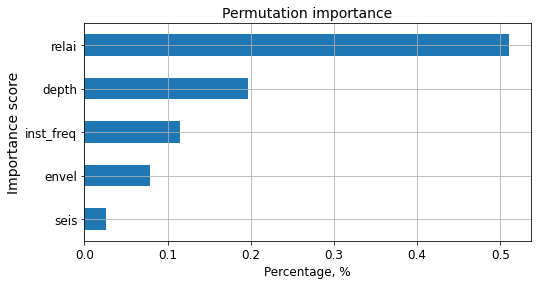

In [562]:
feature_importance_plot(RF_Classifier_model, x_train, y_train, random_state=50)

In [563]:
facies_pred, df_facies_comparison = predict_2d_RelAI_Seis_Envel_InstFreq_Depth(df_facies=df_facies,
                                                                   
                                                                        relai=df_relai_10_60_std, 
                                                                        seis=df_seis_10_60_std, 
                                                                        envel=df_envel_std, 
                                                                        inst_freq = df_inst_freq_std,
                                                                        depth=df_depth_std,
                                                                  
                                                                        model=RF_Classifier_model)
facies_pred

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

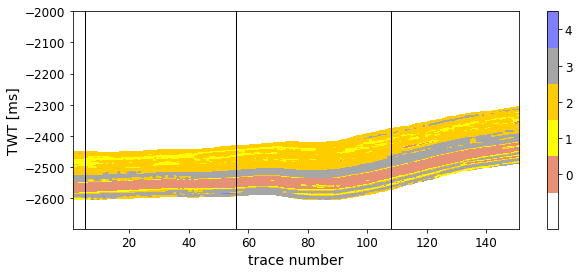

In [564]:
plot_2D_section(data_file=facies_pred.T, extent_plot=extent_facies, color_map='facies', number_of_facies=5, list_of_wells=col_3)

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91      5171
         1.0       0.51      0.42      0.46      3429
         2.0       0.77      0.81      0.79     11240
         3.0       0.76      0.84      0.79      6390
         4.0       0.63      0.06      0.11       626

    accuracy                           0.77     26856
   macro avg       0.72      0.61      0.61     26856
weighted avg       0.76      0.77      0.76     26856



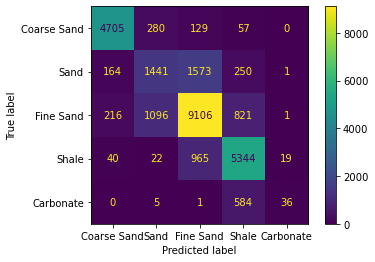

In [565]:
report_print_RF_5, f1_score_per_class_RF_5, count_facies, accuracy_test_RF_5  = confusion_matrix_prediction(df_facies_comparison, 
                                                                                                         facies_pred, 
                                                                                                         col_number=col_3, 
                                                                                                         facies_class=facies_class)

#### Difference map

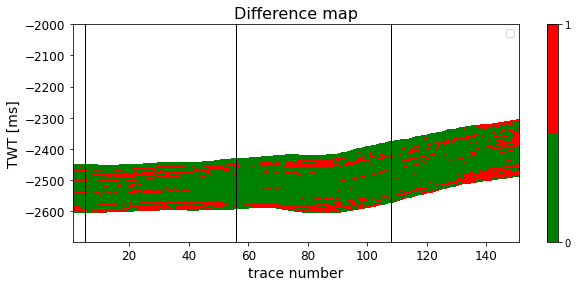

In [566]:
difference_map(df_facies_comparison=df_facies_comparison, facies_predicted=facies_pred, extent=extent_facies, list_of_wells=col_3)

In [567]:
col_3

[5, 56, 108]

### Compare results

In [568]:
accur_2_4_5 = [accuracy_test_RF_4, accuracy_test_RF_2, accuracy_test_RF_5]
accur_2_4_5_100 = [i*100 for i in accur_2_4_5]

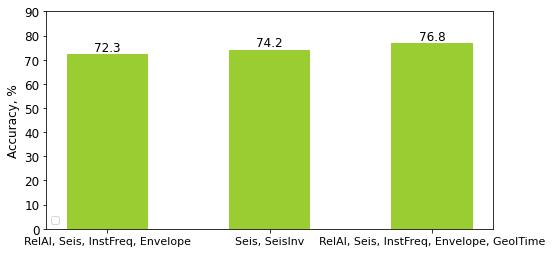

In [569]:
# freq_class = ['Ricker','Ormsby_10_60','Ormsby_10_80','Ormsby_10_100']
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale', 'Carbonate']
models_used = ['Log Reg','KNN','SVM','RF', 'NN']
comp_r_s = ['RelAI, Seis, InstFreq, Envelope', 'Seis, SeisInv', 'RelAI, Seis, InstFreq, Envelope, GeolTime']
X_axis = np.arange(len(comp_r_s))
fig, ax = plt.subplots(figsize=(8, 4))
  


bar1 = plt.bar(X_axis, accur_2_4_5_100, 0.5, color='yellowgreen')
# bar2 = plt.bar(X_axis-0.1, list_of_accuracies_2_100, 0.2, label = 'Seis, Seis_Inv', color='skyblue')
ax.bar_label(bar1, fmt='%.1f', fontsize=12)

  
plt.xticks(X_axis, comp_r_s, fontsize=11)
plt.yticks(fontsize=12)
# plt.xlabel("ML models")
plt.ylabel("Accuracy, %", fontsize=12)
plt.ylim(0, 90)
plt.title("")
plt.legend(loc='lower left')
plt.show()

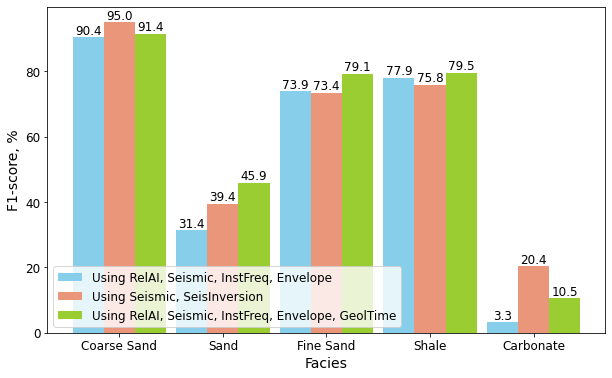

In [570]:
# freq_class = ['Ricker','Ormsby_10_60','Ormsby_10_80','Ormsby_10_100']
facies_class = ['Coarse Sand','Sand','Fine Sand','Shale', 'Carbonate']
comp_r_s = ['Using RelAI, Seismic, InstFreq, Envelope', 'Using Seismic, SeisInversion']
X_axis = np.arange(len(facies_class))
fig, ax = plt.subplots(figsize=(10, 6))
  

bar1 = plt.bar(X_axis-0.3, f1_score_per_class_RF_4*100, 0.3, label = 'Using RelAI, Seismic, InstFreq, Envelope', color='skyblue')
bar2 = plt.bar(X_axis, f1_score_per_class_RF_2*100, 0.3, label = 'Using Seismic, SeisInversion', color='darksalmon')
bar3 = plt.bar(X_axis+0.3, f1_score_per_class_RF_5*100, 0.3, label = 'Using RelAI, Seismic, InstFreq, Envelope, GeolTime', color='yellowgreen')

ax.bar_label(bar1, fmt='%.1f', fontsize=12)
ax.bar_label(bar2, fmt='%.1f', fontsize=12)
ax.bar_label(bar3, fmt='%.1f', fontsize=12)

  
plt.xticks(X_axis, facies_class, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Facies", fontsize=14)
plt.ylabel("F1-score, %", fontsize=14)
plt.title("")
plt.legend(loc='lower left', fontsize=12)
plt.show()